# Analyzing U.S. Wildfires
---

## Data Exploration

### Questions to Answer:
#### 1. What locations are the most and least fire-prone? 
- Look at number of occurrences of fire by location
 - Also view this in relation to size of state -- of course bigger states would have more fires than smaller ones
- Make geographic plots
- Since there is so much data, it may be a good idea to focus on a single location at a time
 - Texas could be a good focus since that's where Codeup is located

#### 2. How does fire size vary by location?
- Look at fire_size by location

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import wrangle_fires

In [2]:
# wrangle data
fires = wrangle_fires()
fires.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,25,26,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


fire_year discovery_date                               general_cause  \
0       2005     2005-02-02  Power generation/transmission/distribution   
1       2004     2004-05-12                                     Natural   
2       2004     2004-05-31                     Debris and open burning   
3       2004     2004-06-28                                     Natural   
4       2004     2004-06-28                                     Natural   

  containment_date  fire_size   latitude   longitude state  
0       2005-02-02       0.10  40.036944 -121.005833    CA  
1       2004-05-12       0.25  38.933056 -120.404444    CA  
2       2004-05-31       0.10  38.984167 -120.735556    CA  
3       2004-07-03       0.10  38.559167 -119.913333    CA  
4       2004-07-03       0.10  38.559167 -119.933056    CA

In [3]:
# view shape of dataframe
fires.shape

(2166753, 8)

In [4]:
# ignore pink warnings
import warnings
warnings.filterwarnings('ignore')

#### What is the size range for fires in this dataset?

In [5]:
# view range of fire size
fires.fire_size.min(), fires.fire_size.max()

(1e-05, 662700.0)

In [6]:
# view states included in dataset
fires.state.value_counts()

CA    235229
GA    180175
TX    167061
NC    123793
FL     99356
AZ     93417
NY     93171
SC     86021
MS     83106
AL     72482
OR     67157
CO     61226
MN     48679
OK     48140
MT     47262
NM     41193
ID     40154
WA     37789
AR     36678
WI     35316
SD     34781
UT     34328
TN     33611
LA     32243
NJ     30553
KY     29610
VA     23747
WV     23731
PR     22159
MO     21998
NV     18874
ND     18308
WY     17535
KS     17473
ME     14924
MI     14166
AK     14125
PA     10803
NE     10354
HI      9949
MA      6778
CT      6006
IA      5094
OH      4727
MD      3947
NH      2935
IL      2814
IN      2206
VT       671
RI       631
DE       187
DC        80
Name: state, dtype: int64

There is wildfire data for all 50 US states as well as Puerto Rico and Washington, DC.

CA, GA, TX, NC, FL have the highest occurrences of wildfires from 1992-2018.

Since there is so much data to go through, I'll start by investigating the fires located in Texas.

In the graph below, I want to show differences in fires based on both time and size. I was able to show the year differences fairly well but I'll need to use a different method for showing size. One way to accomplish this may be to bin the size values into categories so it'll be easier for seaborn to represent those differences visually considering how many data points it needs to plot. I'll do this on my next run-through to give myself a break from staring at this plot. For now, I'll move onto some other exploration.

In [7]:
# borrowing Lori's code for categorizing by size
# create another column categorizing fire size
conditions = [fires.fire_size <=.13, fires.fire_size <=1.3, fires.fire_size <=5.2, fires.fire_size >5.2]
choices = ['small', 'medium', 'large', 'extra_lg']
fires['size_category'] = np.select(conditions, choices)

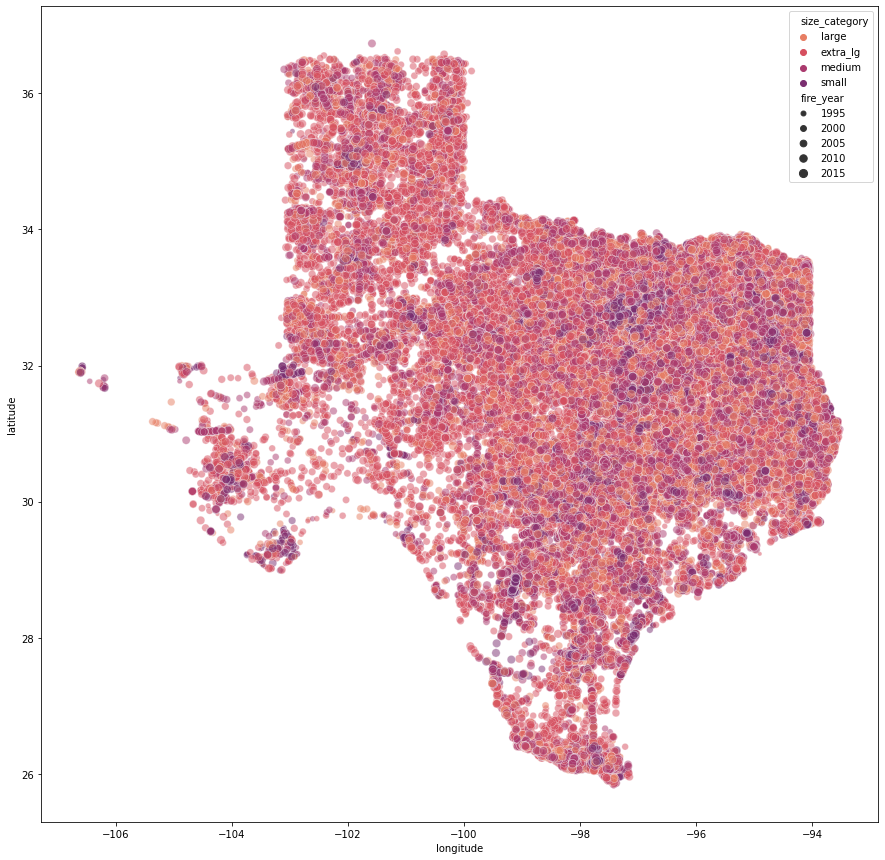

In [8]:
# plot fires in Texas
plt.figure(figsize=(15,15))
sns.scatterplot(x='longitude', y='latitude', data=fires[fires.state=='TX'], hue='size_category', size='fire_year', palette='flare', alpha=0.5);
# light to dark, oldest to newest

In [9]:
# isolate texas fires into separate dataframe
tx_fires = fires[fires.state=='TX']
tx_fires.head()

fire_year discovery_date            general_cause containment_date  \
283       2005     2005-01-24       Arson/incendiarism       2005-01-24   
284       2005     2005-01-25  Debris and open burning       2005-01-25   
285       2005     2005-03-12  Recreation and ceremony       2005-03-13   
286       2005     2005-04-03                  Smoking       2005-04-03   
287       2005     2005-04-07                  Natural       2005-04-08   

     fire_size   latitude  longitude state size_category  
283        3.0  33.786111 -96.150000    TX         large  
284       55.0  31.312500 -94.270833    TX      extra_lg  
285        2.0  33.345833 -97.595833    TX         large  
286        0.3  31.386667 -95.150556    TX        medium  
287       55.0  31.354167 -95.085278    TX      extra_lg

In [10]:
# view shape of subset df
tx_fires.shape

(167061, 9)

In [11]:
# view timeframe of texas fires
tx_fires.fire_year.min(), tx_fires.fire_year.max()

(1992, 2018)

In [12]:
# check for nulls in tx data
tx_fires.isna().sum()

fire_year                0
discovery_date           0
general_cause            0
containment_date    139043
fire_size                0
latitude                 0
longitude                0
state                    0
size_category            0
dtype: int64

In [13]:
# remove rows with null cont_date
tx_fires = tx_fires[tx_fires.containment_date.notnull()]
tx_fires

fire_year discovery_date                            general_cause  \
283           2005     2005-01-24                       Arson/incendiarism   
284           2005     2005-01-25                  Debris and open burning   
285           2005     2005-03-12                  Recreation and ceremony   
286           2005     2005-04-03                                  Smoking   
287           2005     2005-04-07                                  Natural   
...            ...            ...                                      ...   
2108929       2018     2018-11-29  Missing data/not specified/undetermined   
2108979       2018     2018-12-05  Missing data/not specified/undetermined   
2109052       2018     2018-12-14  Missing data/not specified/undetermined   
2109106       2018     2018-12-21  Missing data/not specified/undetermined   
2109122       2018     2018-12-24  Missing data/not specified/undetermined   

        containment_date  fire_size   latitude   longitude state size_category  
283           2005-01-24       3.00  33.786111  -96.150000    TX         large  
284           2005-01-25      55.00  31.312500  -94.270833    TX      extra_lg  
285           2005-03-13       2.00  33.345833  -97.595833    TX         large  
286           2005-04-03       0.30  31.386667  -95.150556    TX        medium  
287           2005-04-08      55.00  31.354167  -95.085278    TX      extra_lg  
...                  ...        ...        ...         ...   ...           ...  
2108929       2018-11-29      31.21  33.422500 -101.959667    TX      extra_lg  
2108979       2018-12-05      50.00  30.014200  -94.805183    TX      extra_lg  
2109052       2018-12-16    1400.00  27.837783  -99.872783    TX      extra_lg  
2109106       2018-12-21       8.00  33.085200  -96.155500    TX      extra_lg  
2109122       2018-12-24      15.00  31.216317  -95.482150    TX      extra_lg  

[28018 rows x 9 columns]

I'm interested in seeing how long these fires burned/were considered to be uncontained, so to look into this I'll create a new column using discovery_date and cont_date.

In [14]:
# create new column
tx_fires['days_uncontrolled'] = tx_fires.containment_date-tx_fires.discovery_date
tx_fires

fire_year discovery_date                            general_cause  \
283           2005     2005-01-24                       Arson/incendiarism   
284           2005     2005-01-25                  Debris and open burning   
285           2005     2005-03-12                  Recreation and ceremony   
286           2005     2005-04-03                                  Smoking   
287           2005     2005-04-07                                  Natural   
...            ...            ...                                      ...   
2108929       2018     2018-11-29  Missing data/not specified/undetermined   
2108979       2018     2018-12-05  Missing data/not specified/undetermined   
2109052       2018     2018-12-14  Missing data/not specified/undetermined   
2109106       2018     2018-12-21  Missing data/not specified/undetermined   
2109122       2018     2018-12-24  Missing data/not specified/undetermined   

        containment_date  fire_size   latitude   longitude state  \
283           2005-01-24       3.00  33.786111  -96.150000    TX   
284           2005-01-25      55.00  31.312500  -94.270833    TX   
285           2005-03-13       2.00  33.345833  -97.595833    TX   
286           2005-04-03       0.30  31.386667  -95.150556    TX   
287           2005-04-08      55.00  31.354167  -95.085278    TX   
...                  ...        ...        ...         ...   ...   
2108929       2018-11-29      31.21  33.422500 -101.959667    TX   
2108979       2018-12-05      50.00  30.014200  -94.805183    TX   
2109052       2018-12-16    1400.00  27.837783  -99.872783    TX   
2109106       2018-12-21       8.00  33.085200  -96.155500    TX   
2109122       2018-12-24      15.00  31.216317  -95.482150    TX   

        size_category days_uncontrolled  
283             large            0 days  
284          extra_lg            0 days  
285             large            1 days  
286            medium            0 days  
287          extra_lg            1 days  
...               ...               ...  
2108929      extra_lg            0 days  
2108979      extra_lg            0 days  
2109052      extra_lg            2 days  
2109106      extra_lg            0 days  
2109122      extra_lg            0 days  

[28018 rows x 10 columns]

In [15]:
# look at value counts for uncontrolled windows
tx_fires.days_uncontrolled.value_counts().sort_index()

0 days      23623
1 days       2905
2 days        657
3 days        289
4 days        131
5 days         96
6 days         56
7 days         47
8 days         25
9 days         23
10 days        26
11 days        12
12 days        12
13 days        15
14 days        12
15 days         5
16 days         5
17 days         3
18 days         1
19 days         5
20 days         5
21 days         1
22 days         1
23 days         1
24 days         1
25 days         2
26 days         5
27 days         1
28 days         2
29 days         3
30 days         6
31 days         9
32 days         3
33 days         2
34 days         1
35 days         1
36 days         1
37 days         1
39 days         1
45 days         1
48 days         2
59 days         1
120 days        1
133 days        1
178 days        1
244 days        1
365 days       13
366 days        1
371 days        1
Name: days_uncontrolled, dtype: int64

In [16]:
# longest uncontrolled fire in Texas
tx_fires[tx_fires.days_uncontrolled == '371 days']

fire_year discovery_date                            general_cause  \
598747       2000     2000-09-12  Missing data/not specified/undetermined   

       containment_date  fire_size  latitude  longitude state size_category  \
598747       2001-09-18       80.0  31.49792  -94.98125    TX      extra_lg   

       days_uncontrolled  
598747          371 days

Lori's fantastic suggestion: In the slides be sure to have a reference for how big something is (football field, two schoolbuses, etc.)

In [17]:
# recreate df for all tx fires
all_tx_fires = fires[fires.state=='TX']
all_tx_fires

fire_year discovery_date                            general_cause  \
283           2005     2005-01-24                       Arson/incendiarism   
284           2005     2005-01-25                  Debris and open burning   
285           2005     2005-03-12                  Recreation and ceremony   
286           2005     2005-04-03                                  Smoking   
287           2005     2005-04-07                                  Natural   
...            ...            ...                                      ...   
2118712       2018     2018-01-22  Missing data/not specified/undetermined   
2118713       2018     2018-01-22  Missing data/not specified/undetermined   
2118743       2018     2018-03-18  Missing data/not specified/undetermined   
2118744       2018     2018-05-09  Missing data/not specified/undetermined   
2118746       2018     2018-03-05  Missing data/not specified/undetermined   

        containment_date  fire_size   latitude   longitude state size_category  
283           2005-01-24        3.0  33.786111  -96.150000    TX         large  
284           2005-01-25       55.0  31.312500  -94.270833    TX      extra_lg  
285           2005-03-13        2.0  33.345833  -97.595833    TX         large  
286           2005-04-03        0.3  31.386667  -95.150556    TX        medium  
287           2005-04-08       55.0  31.354167  -95.085278    TX      extra_lg  
...                  ...        ...        ...         ...   ...           ...  
2118712              NaT     2153.0  32.725283  -97.558050    TX      extra_lg  
2118713              NaT      585.0  33.899167  -98.848833    TX      extra_lg  
2118743              NaT      400.0  31.580000 -102.947222    TX      extra_lg  
2118744              NaT     1000.0  34.760175 -101.246832    TX      extra_lg  
2118746              NaT      577.0  33.463417 -101.070400    TX      extra_lg  

[167061 rows x 9 columns]

In [18]:
# resample by year's total fires
tx_fires_y = all_tx_fires.resample('Y', on='discovery_date').count()
tx_fires_y.shape

(27, 9)

---

### Exploring Beyond Texas

Below is a scatterplot of all the fires in our dataset.

There appear to be certain areas where fires have not occurred in more recent years. Looking at the areas to the northeast of Texas, there is a cluster of lighter colored points indicating there is an abundance of fires dating further back. There are a few other areas with similar characteristics.

Additionally, there seem to be fewer fires in the Ohio area as the datapoints are sparse in tht region. Unsure if this is simply due to a lack of information for that area, an anomaly in the scatterplot, or if there are truly fewer fires in that area. This will need further exploration.

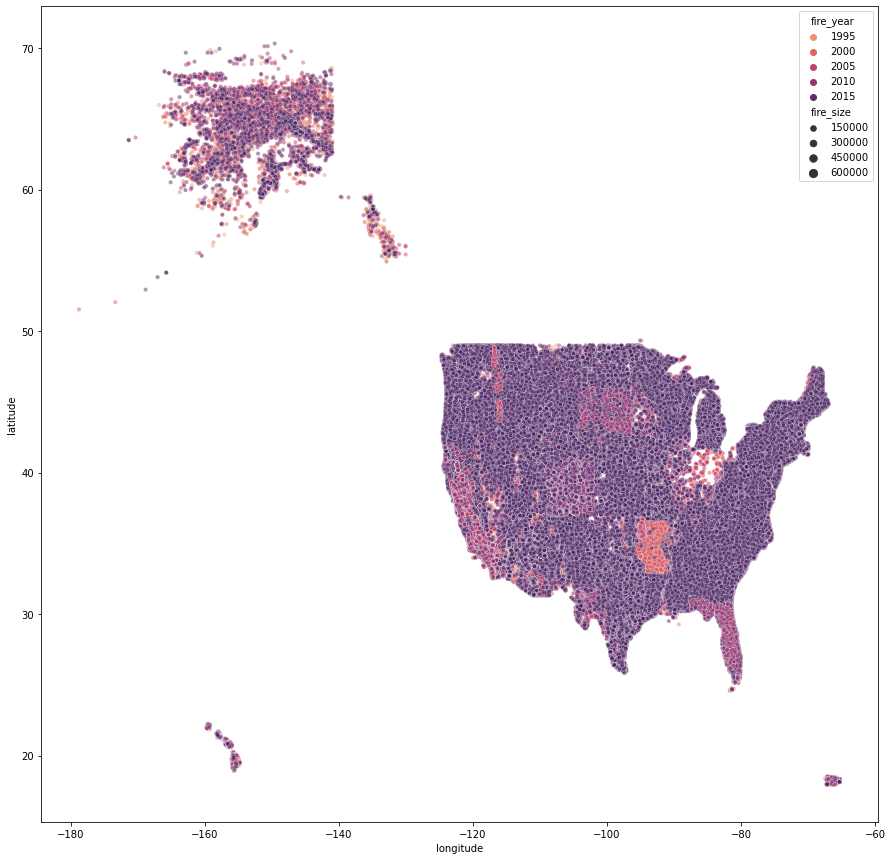

In [19]:
# plot fires across us
plt.figure(figsize=(15,15))
sns.scatterplot(x='longitude', y='latitude', data=fires, size='fire_size', hue='fire_year', palette='flare', alpha=0.5);

Next I want to look at data by state. I'll be looking into fire size as well as the number of wildfires in each state.

[Text(0.5, 1.0, 'Number of Fires by State')]

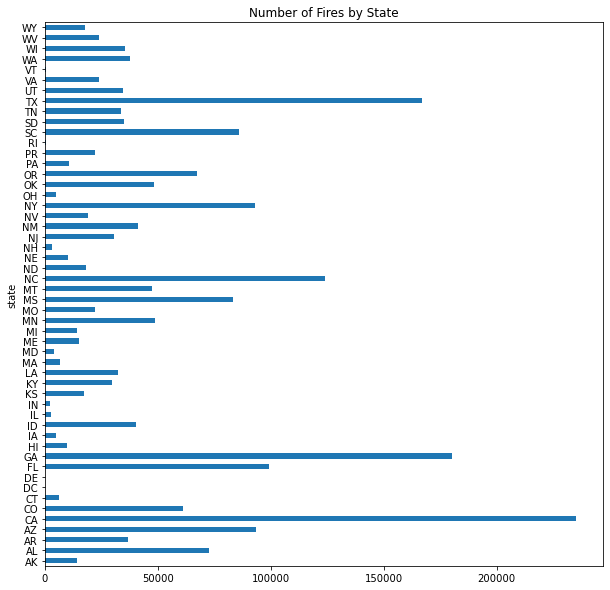

In [20]:
# view total fires by state
plt.figure(figsize=(10,10))
fires.groupby('state').fire_size.count().plot.barh().set(title='Number of Fires by State')

Above is a visualization of the number of wildfires in each state during the full span of our dataset (1992-2018). The top 3 states are California, Georgia, then Texas.

I also want to look at this data for each individual year.

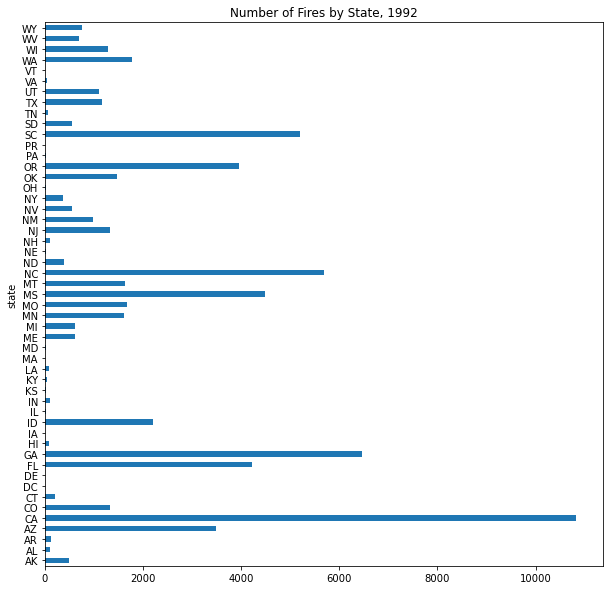

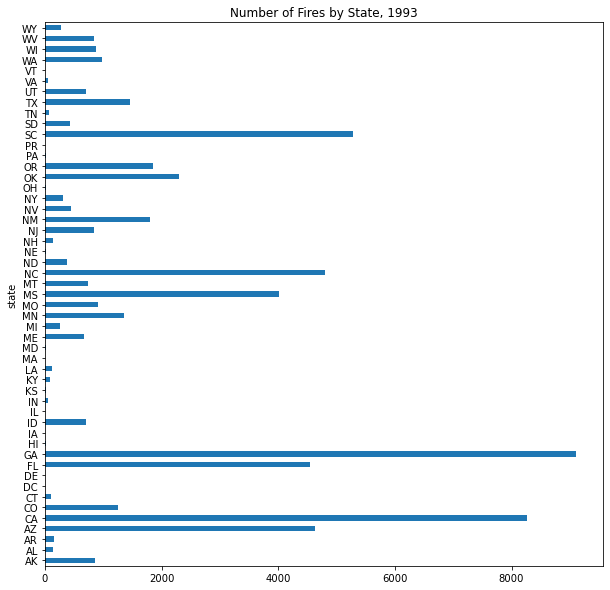

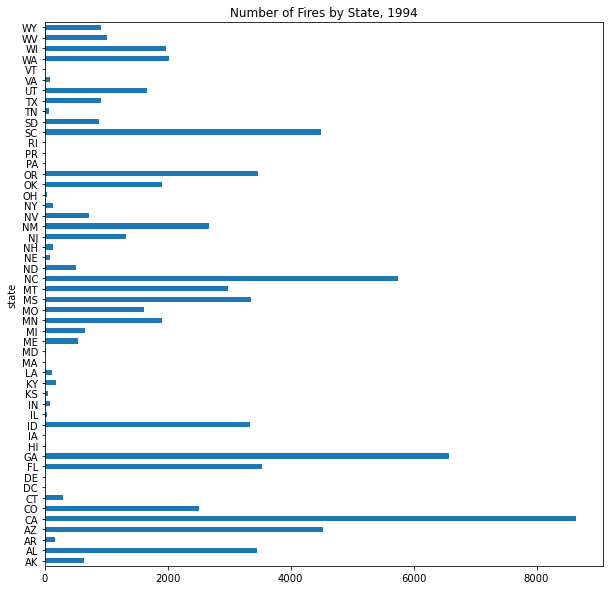

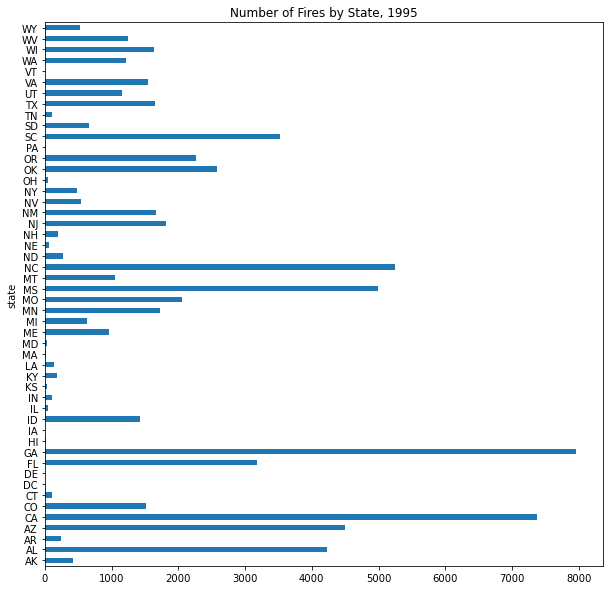

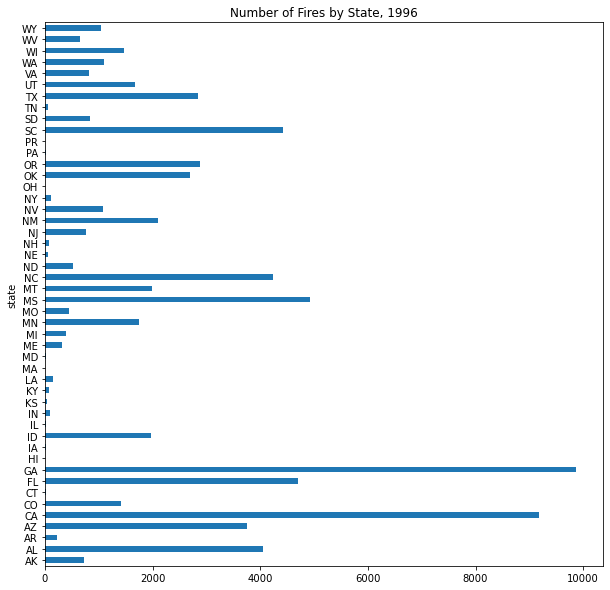

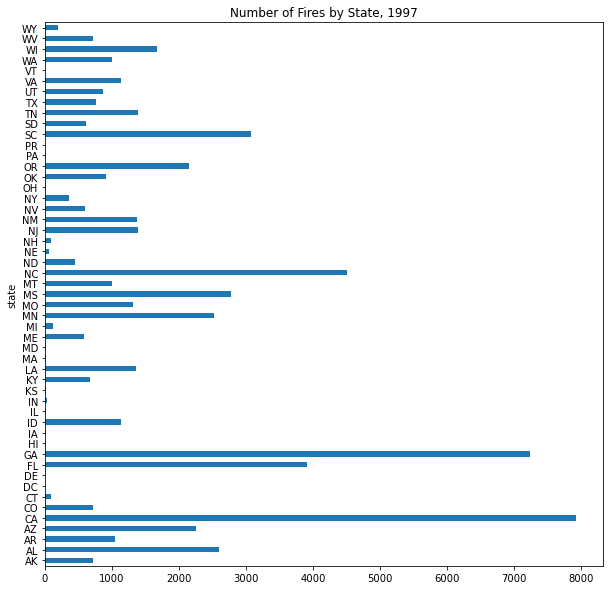

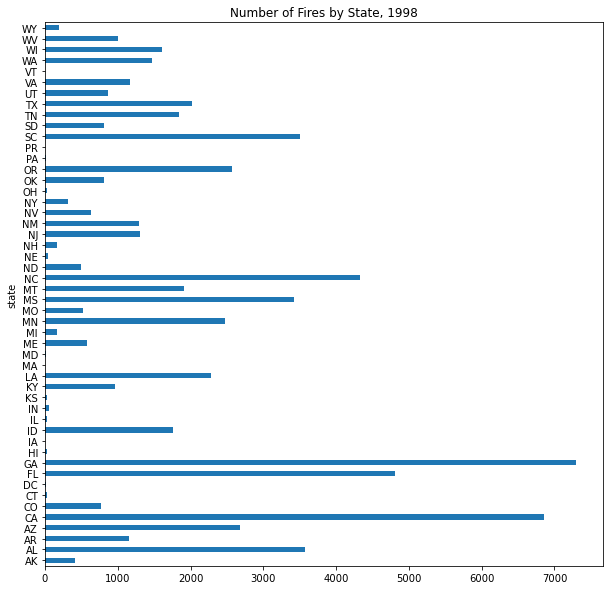

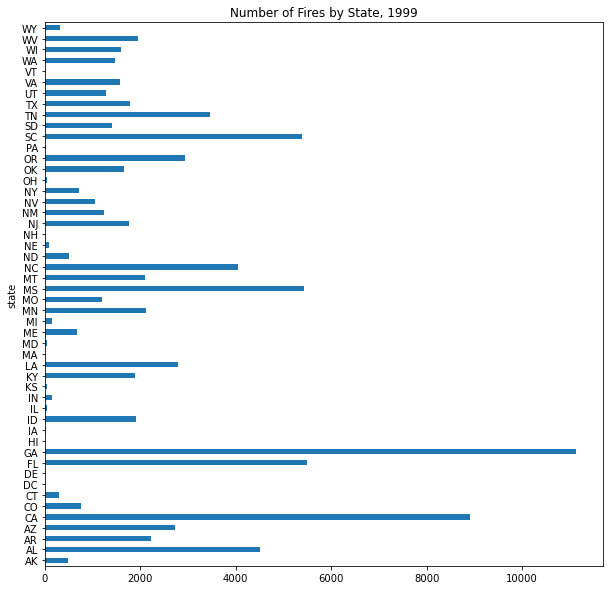

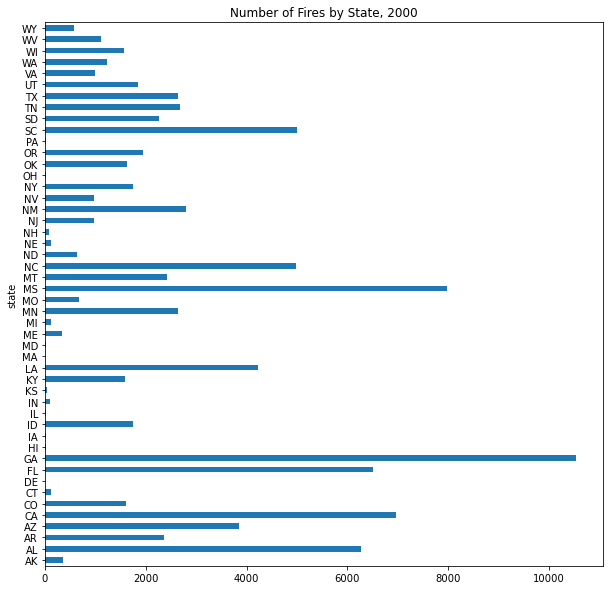

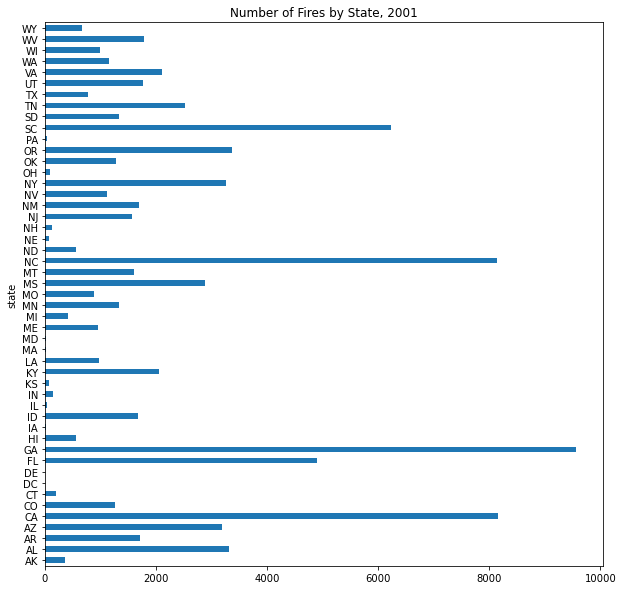

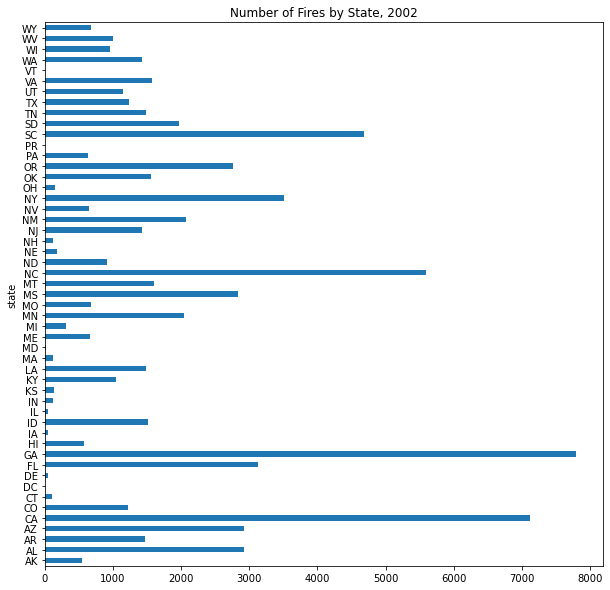

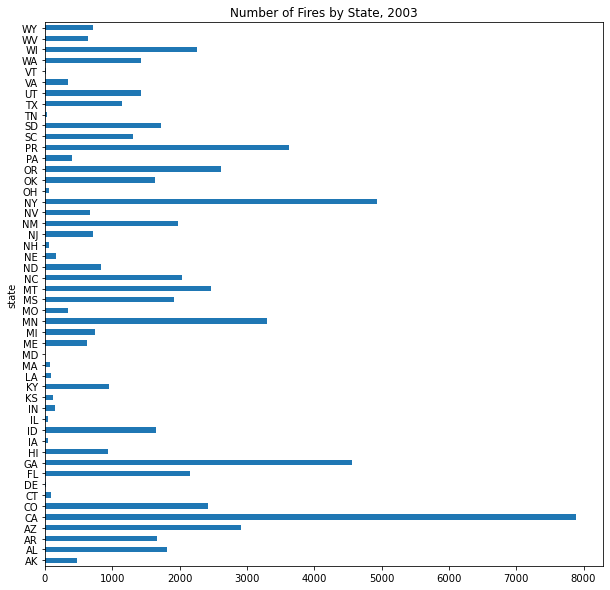

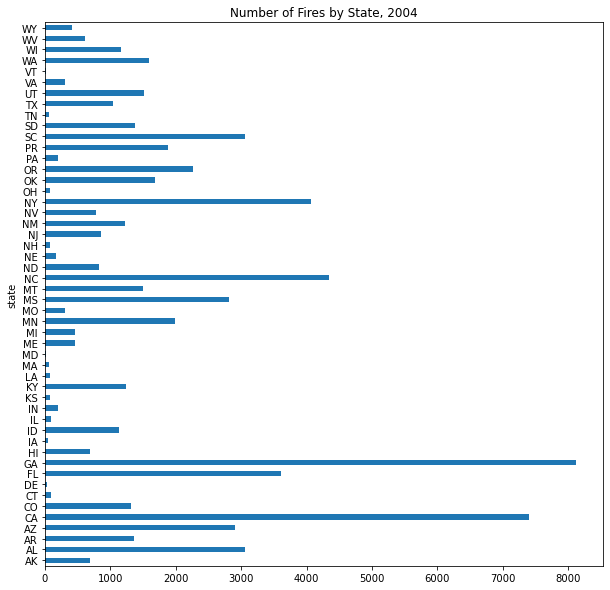

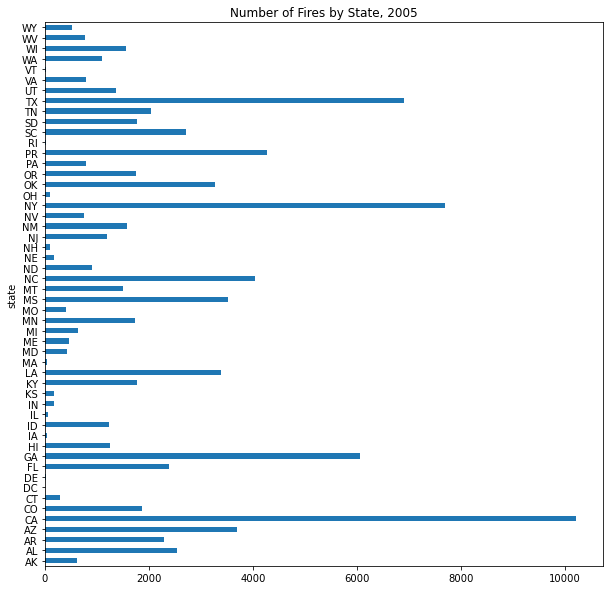

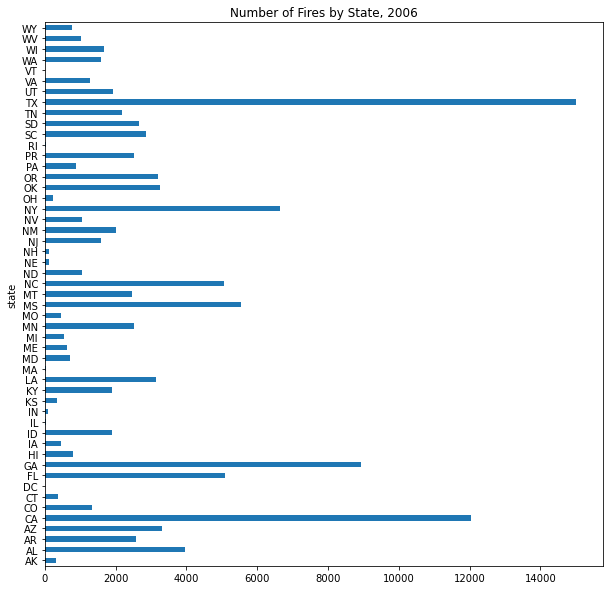

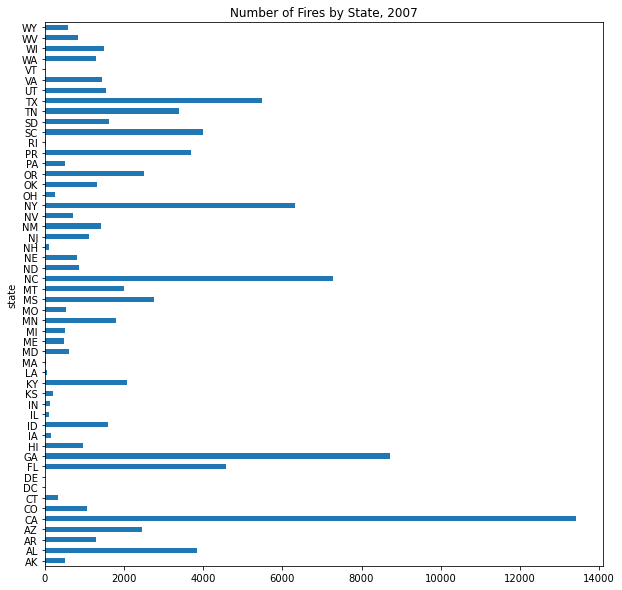

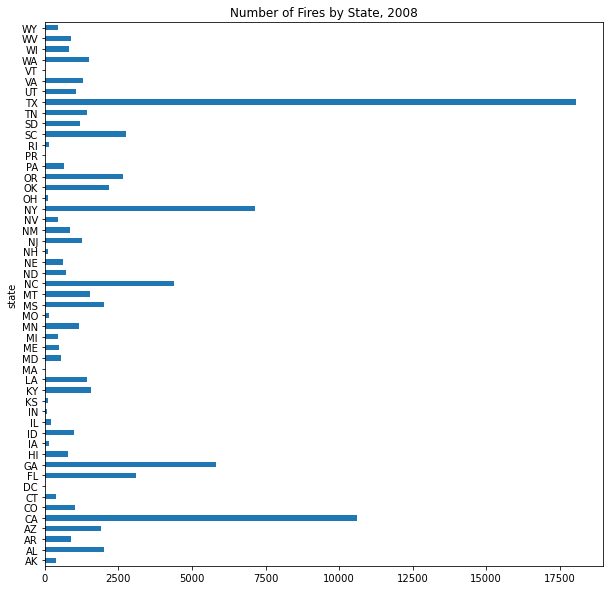

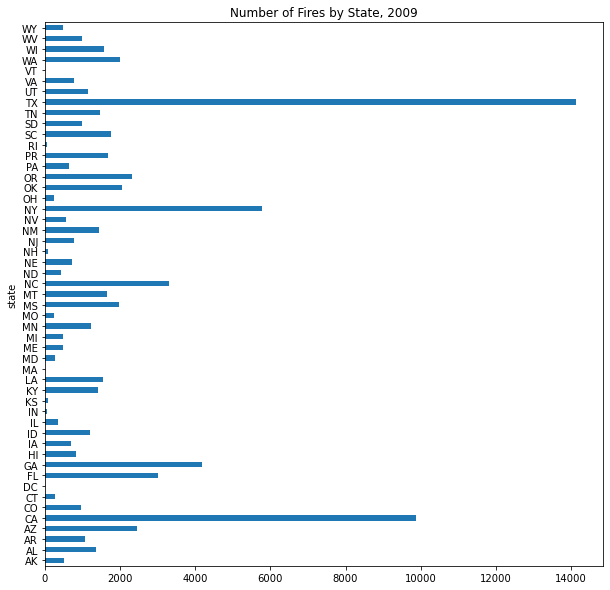

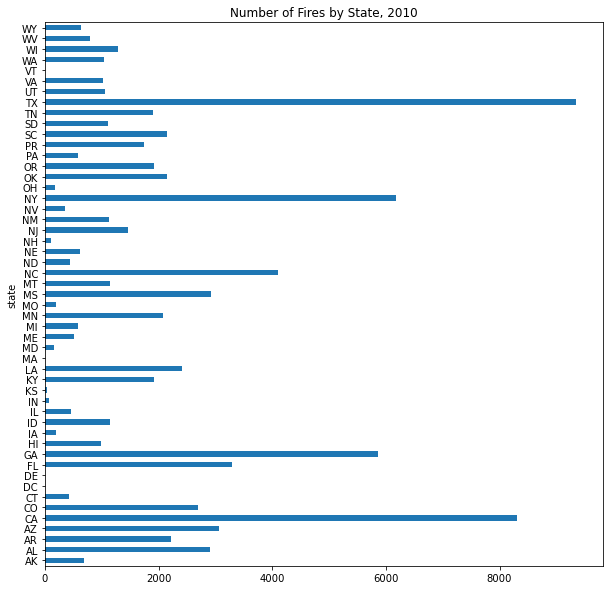

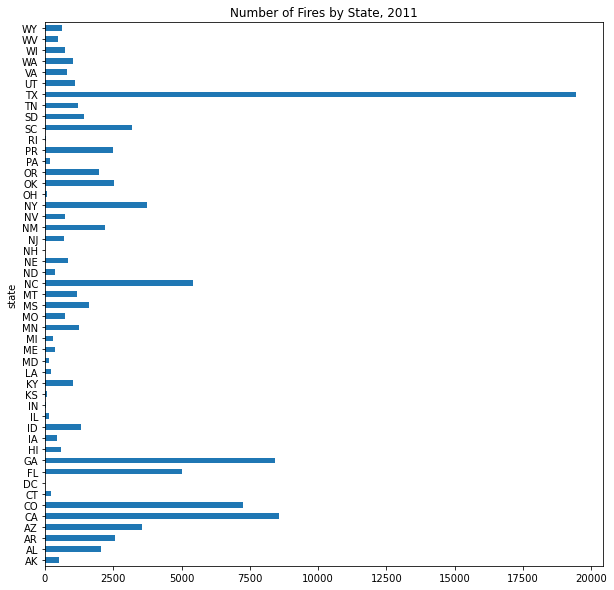

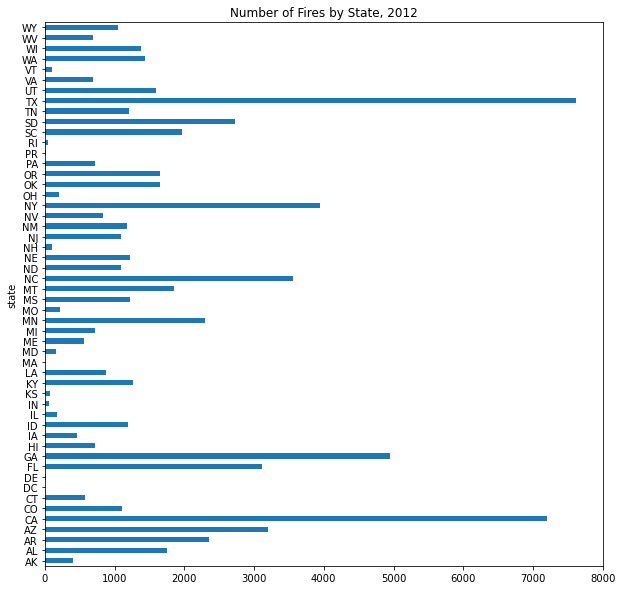

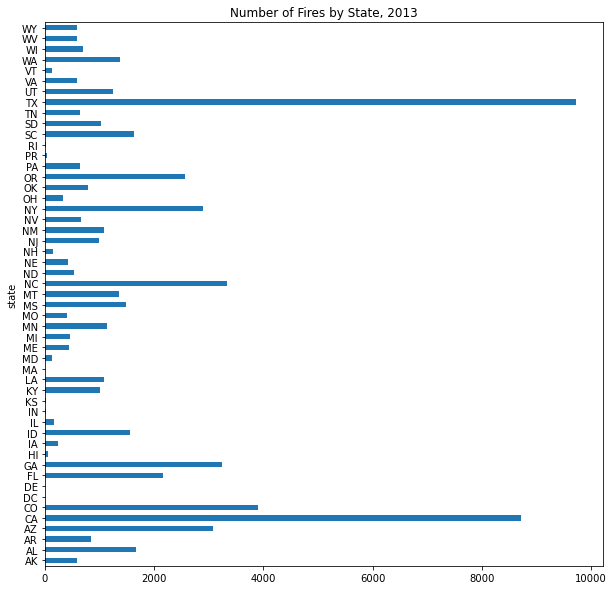

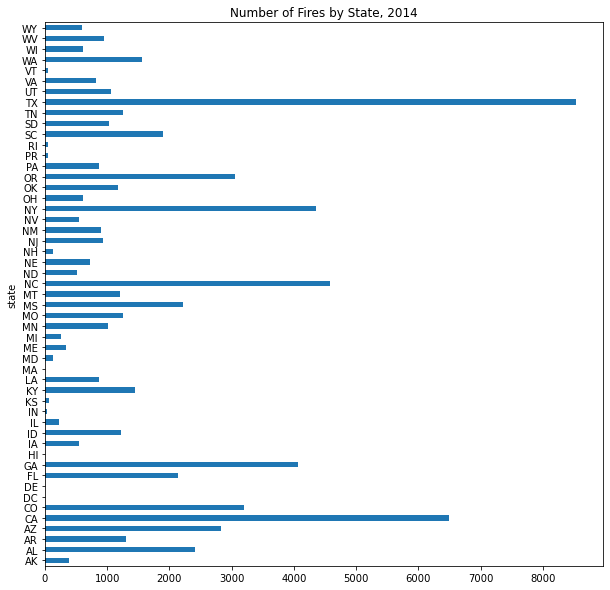

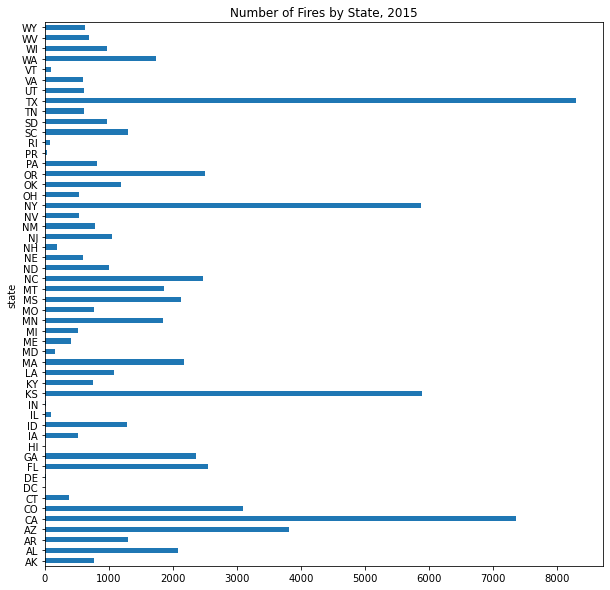

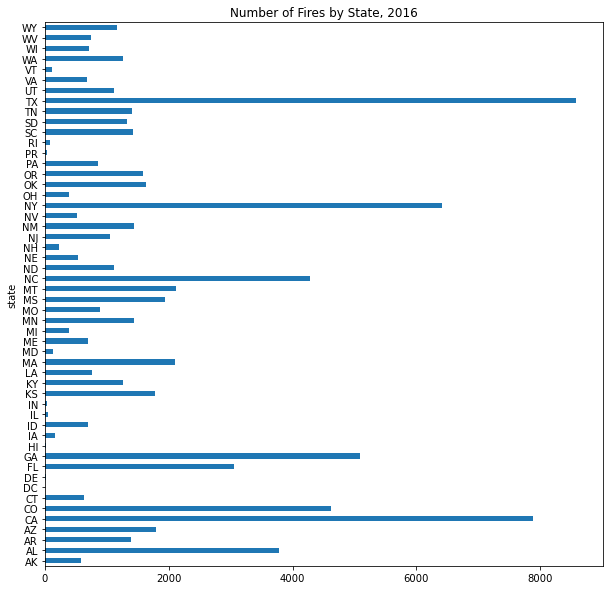

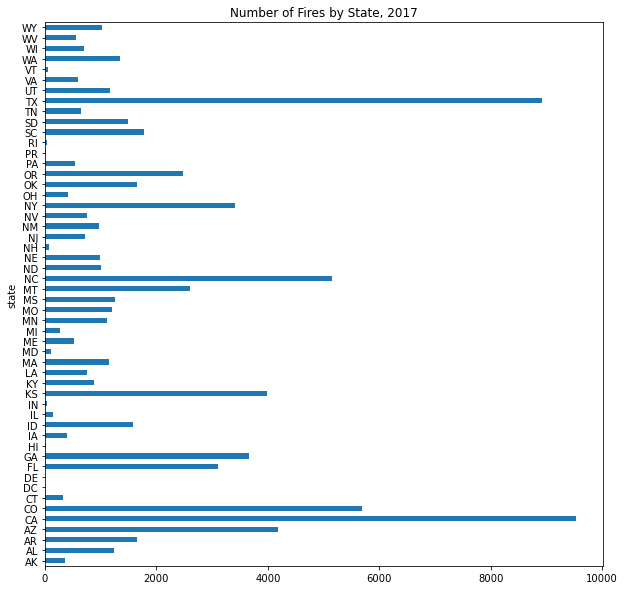

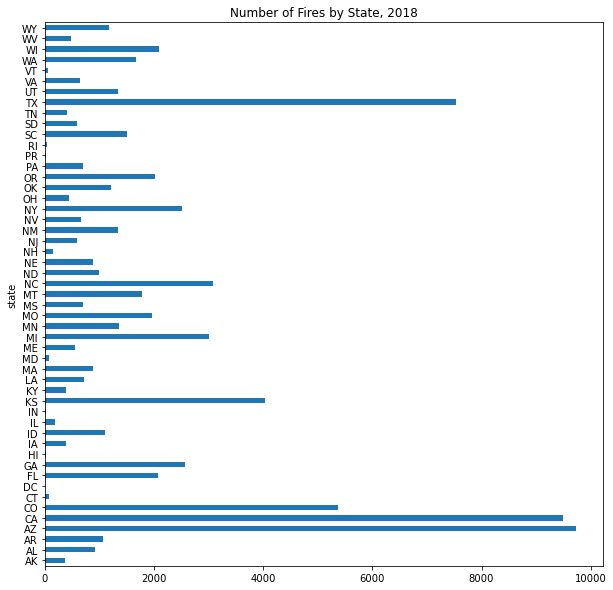

In [21]:
# plot num fires per year
for year in list(range(1992,2019)):
    plt.figure(figsize=(10,10))
    fires[fires.fire_year == year].groupby('state').fire_size.count().plot.barh().set(title=f'Number of Fires by State, {year}')
    plt.show();

In [22]:
# print max and min for num fires/year
for year in list(range(1992, 2019)):
    print(year)
    print('Fewest fires:',fires[fires.fire_year == year].groupby('state').fire_size.count().idxmin(3), fires[fires.fire_year == year].groupby('state').fire_size.count().min())
    print('Most fires:',fires[fires.fire_year == year].groupby('state').fire_size.count().idxmax(), fires[fires.fire_year == year].groupby('state').fire_size.count().max())
    print()

1992
Fewest fires: VT 1
Most fires: CA 10831

1993
Fewest fires: DE 1
Most fires: GA 9111

1994
Fewest fires: MA 1
Most fires: CA 8649

1995
Fewest fires: VT 2
Most fires: GA 7966

1996
Fewest fires: PR 3
Most fires: GA 9872

1997
Fewest fires: VT 2
Most fires: CA 7928

1998
Fewest fires: MA 1
Most fires: GA 7301

1999
Fewest fires: DE 2
Most fires: GA 11138

2000
Fewest fires: DE 1
Most fires: GA 10545

2001
Fewest fires: DC 1
Most fires: GA 9568

2002
Fewest fires: DC 1
Most fires: GA 7801

2003
Fewest fires: MD 5
Most fires: CA 7894

2004
Fewest fires: VT 16
Most fires: GA 8127

2005
Fewest fires: DC 2
Most fires: CA 10219

2006
Fewest fires: DC 3
Most fires: TX 15019

2007
Fewest fires: DC 1
Most fires: CA 13428

2008
Fewest fires: DC 1
Most fires: TX 18068

2009
Fewest fires: DC 1
Most fires: TX 14142

2010
Fewest fires: DC 1
Most fires: TX 9353

2011
Fewest fires: DC 2
Most fires: TX 19451

2012
Fewest fires: DC 5
Most fires: TX 7623

2013
Fewest fires: DC 1
Most fires: TX 9734



To be able to compare wildfire destruction in relation to the size of the state in which the wildfire occurred, I need to know how big each state/territory is so I can determine the proportion of the fire size to state/territory size. To get this, I used publicly available information from the US Forest Service located at this webpage: https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/fsm8_037652.htm

In [23]:
# pull in state size data
states = pd.read_csv('state_acres.csv', index_col=0)
states.rename(columns={'State Acres':'state_size'}, inplace=True)
states

state_size
State 1             
AL        33,432,000
AK       393,747,000
AZ        72,964,000
AR        34,036,000
CA       101,676,000
CO        66,624,000
CT         3,548,000
DE         1,534,000
DC             39000
FL        38,392,000
GA        37,745,000
HI         4,134,000
ID        53,487,000
IL        36,060,000
IN        23,158,000
IA        36,017,000
KS        52,660,000
KY        25,863,000
LA        31,776,000
ME        21,594,000
MD         7,870,000
MA         5,914,000
MI        37,448,000
MN        54,014,000
MS        30,903,000
MO        44,614,000
MT        94,109,000
NE        49,523,000
NV        70,763,000
NH         5,941,000
NJ         5,258,000
NM        77,823,000
NY        32,056,000
NC        33,710,000
ND        45,251,000
OH        26,451,000
OK        44,738,000
OR        62,140,000
PA        28,806,000
PR         2,245,000
RI            788000
SC        19,961,000
SD        49,357,000
TN        26,973,000
TX       171,057,000
UT        54,339,000
VT         6,154,000
VA        27,089,000
WA        45,208,000
WV        15,508,000
WI        35,933,000
WY        62,604,000

In [24]:
# add state size onto fires dataframe
fires1 = pd.merge(fires, states, left_on=fires.state, right_index=True).drop(columns='key_0')
fires1

fire_year discovery_date                               general_cause  \
0             2005     2005-02-02  Power generation/transmission/distribution   
1             2004     2004-05-12                                     Natural   
2             2004     2004-05-31                     Debris and open burning   
3             2004     2004-06-28                                     Natural   
4             2004     2004-06-28                                     Natural   
...            ...            ...                                         ...   
2103194       2018     2018-05-12     Missing data/not specified/undetermined   
2104429       2018     2018-06-14     Missing data/not specified/undetermined   
2104735       2018     2018-06-22     Missing data/not specified/undetermined   
2105722       2018     2018-07-11     Missing data/not specified/undetermined   
2109087       2018     2018-12-20     Missing data/not specified/undetermined   

        containment_date  fire_size   latitude   longitude state  \
0             2005-02-02       0.10  40.036944 -121.005833    CA   
1             2004-05-12       0.25  38.933056 -120.404444    CA   
2             2004-05-31       0.10  38.984167 -120.735556    CA   
3             2004-07-03       0.10  38.559167 -119.913333    CA   
4             2004-07-03       0.10  38.559167 -119.933056    CA   
...                  ...        ...        ...         ...   ...   
2103194       2018-05-12       0.10  41.878960  -71.523120    RI   
2104429       2018-06-14       0.10  41.869240  -71.350730    RI   
2104735       2018-06-22       0.10  41.442440  -71.748940    RI   
2105722       2018-07-11       0.10  41.679750  -71.543760    RI   
2109087       2018-12-20       0.10  41.441400  -71.748830    RI   

        size_category   state_size  
0               small  101,676,000  
1              medium  101,676,000  
2               small  101,676,000  
3               small  101,676,000  
4               small  101,676,000  
...               ...          ...  
2103194         small       788000  
2104429         small       788000  
2104735         small       788000  
2105722         small       788000  
2109087         small       788000  

[2166753 rows x 10 columns]

In [25]:
# add cleaned state size column to fires df
fires['state_size'] = fires1.state_size.str.replace(',','')
fires

fire_year discovery_date                               general_cause  \
0             2005     2005-02-02  Power generation/transmission/distribution   
1             2004     2004-05-12                                     Natural   
2             2004     2004-05-31                     Debris and open burning   
3             2004     2004-06-28                                     Natural   
4             2004     2004-06-28                                     Natural   
...            ...            ...                                         ...   
2166748       2016     2016-10-18     Missing data/not specified/undetermined   
2166749       2016     2016-10-22     Missing data/not specified/undetermined   
2166750       2017     2017-04-02     Missing data/not specified/undetermined   
2166751       2017     2017-11-30     Missing data/not specified/undetermined   
2166752       2015     2015-07-20     Missing data/not specified/undetermined   

        containment_date  fire_size   latitude   longitude state  \
0             2005-02-02       0.10  40.036944 -121.005833    CA   
1             2004-05-12       0.25  38.933056 -120.404444    CA   
2             2004-05-31       0.10  38.984167 -120.735556    CA   
3             2004-07-03       0.10  38.559167 -119.913333    CA   
4             2004-07-03       0.10  38.559167 -119.933056    CA   
...                  ...        ...        ...         ...   ...   
2166748              NaT     125.00  36.431667  -84.421667    TN   
2166749              NaT     120.00  31.143611  -88.111944    AL   
2166750              NaT     120.00  33.920000  -85.310000    AL   
2166751              NaT     110.00  34.640000  -93.400000    AR   
2166752              NaT     109.00  34.794167  -94.958000    OK   

        size_category state_size  
0               small  101676000  
1              medium  101676000  
2               small  101676000  
3               small  101676000  
4               small  101676000  
...               ...        ...  
2166748      extra_lg   26973000  
2166749      extra_lg   33432000  
2166750      extra_lg   33432000  
2166751      extra_lg   34036000  
2166752      extra_lg   44738000  

[2166753 rows x 10 columns]

In [26]:
# change state size dtype to float
fires = fires.astype({'state_size':'float64'})
fires.dtypes

fire_year                    int64
discovery_date      datetime64[ns]
general_cause               object
containment_date    datetime64[ns]
fire_size                  float64
latitude                   float64
longitude                  float64
state                       object
size_category               object
state_size                 float64
dtype: object

In [27]:
# calculate percent of state burned by each fire
fires['pct_state_burned'] = (fires.fire_size/fires.state_size)*100
fires

fire_year discovery_date                               general_cause  \
0             2005     2005-02-02  Power generation/transmission/distribution   
1             2004     2004-05-12                                     Natural   
2             2004     2004-05-31                     Debris and open burning   
3             2004     2004-06-28                                     Natural   
4             2004     2004-06-28                                     Natural   
...            ...            ...                                         ...   
2166748       2016     2016-10-18     Missing data/not specified/undetermined   
2166749       2016     2016-10-22     Missing data/not specified/undetermined   
2166750       2017     2017-04-02     Missing data/not specified/undetermined   
2166751       2017     2017-11-30     Missing data/not specified/undetermined   
2166752       2015     2015-07-20     Missing data/not specified/undetermined   

        containment_date  fire_size   latitude   longitude state  \
0             2005-02-02       0.10  40.036944 -121.005833    CA   
1             2004-05-12       0.25  38.933056 -120.404444    CA   
2             2004-05-31       0.10  38.984167 -120.735556    CA   
3             2004-07-03       0.10  38.559167 -119.913333    CA   
4             2004-07-03       0.10  38.559167 -119.933056    CA   
...                  ...        ...        ...         ...   ...   
2166748              NaT     125.00  36.431667  -84.421667    TN   
2166749              NaT     120.00  31.143611  -88.111944    AL   
2166750              NaT     120.00  33.920000  -85.310000    AL   
2166751              NaT     110.00  34.640000  -93.400000    AR   
2166752              NaT     109.00  34.794167  -94.958000    OK   

        size_category   state_size  pct_state_burned  
0               small  101676000.0      9.835163e-08  
1              medium  101676000.0      2.458791e-07  
2               small  101676000.0      9.835163e-08  
3               small  101676000.0      9.835163e-08  
4               small  101676000.0      9.835163e-08  
...               ...          ...               ...  
2166748      extra_lg   26973000.0      4.634264e-04  
2166749      extra_lg   33432000.0      3.589375e-04  
2166750      extra_lg   33432000.0      3.589375e-04  
2166751      extra_lg   34036000.0      3.231872e-04  
2166752      extra_lg   44738000.0      2.436408e-04  

[2166753 rows x 11 columns]

In [28]:
# view range for percent of state burned
fires.pct_state_burned.min(), fires.pct_state_burned.max()

(2.026055068176753e-11, 1.4812910724663597)

In [29]:
# view fire with highest pct_state_burned
fires[fires.pct_state_burned == fires.pct_state_burned.max()]

fire_year discovery_date                            general_cause  \
2042982       2017     2017-03-07  Missing data/not specified/undetermined   

        containment_date  fire_size  latitude  longitude state size_category  \
2042982              NaT   662700.0  36.77447  -100.1752    OK      extra_lg   

         state_size  pct_state_burned  
2042982  44738000.0          1.481291

So it looks like the fire that burned the largest portion of a state is also the biggest fire in our dataset. However, I do know that this fire spanned more than just Oklahoma and burned into Kansas so this column may not be truly representative in cases like this where a fire spans multiple states.

In [30]:
# check dtypes
fires.dtypes

fire_year                    int64
discovery_date      datetime64[ns]
general_cause               object
containment_date    datetime64[ns]
fire_size                  float64
latitude                   float64
longitude                  float64
state                       object
size_category               object
state_size                 float64
pct_state_burned           float64
dtype: object

[Text(0.5, 1.0, 'Mean Fire Size by State'), Text(0.5, 0, 'acres')]

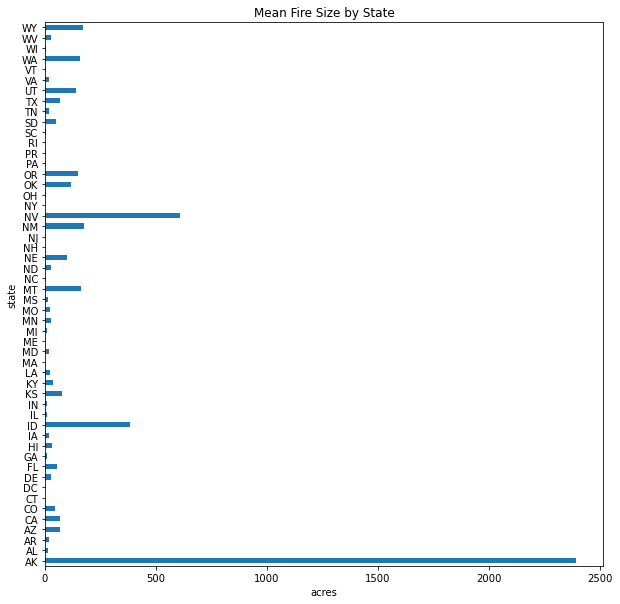

In [31]:
# view overall mean fire size by state
plt.figure(figsize=(10,10))
fires.groupby('state').fire_size.mean().plot.barh().set(title='Mean Fire Size by State', xlabel='acres')

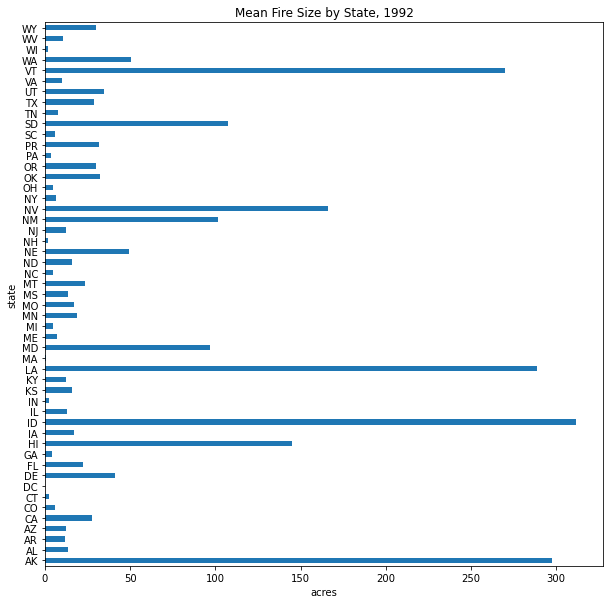

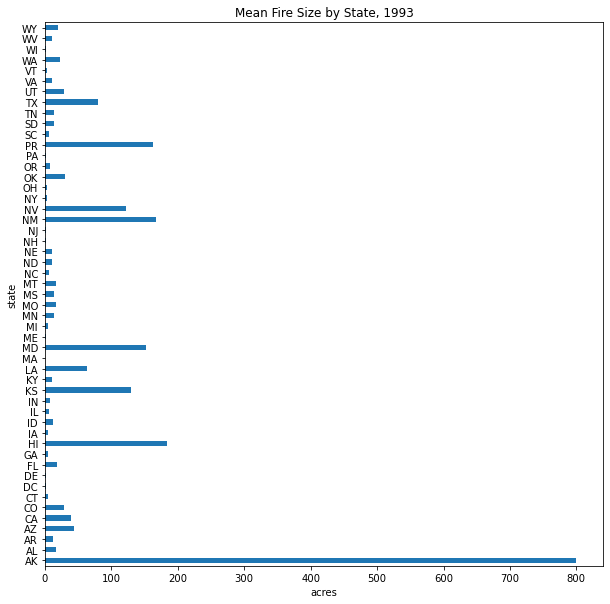

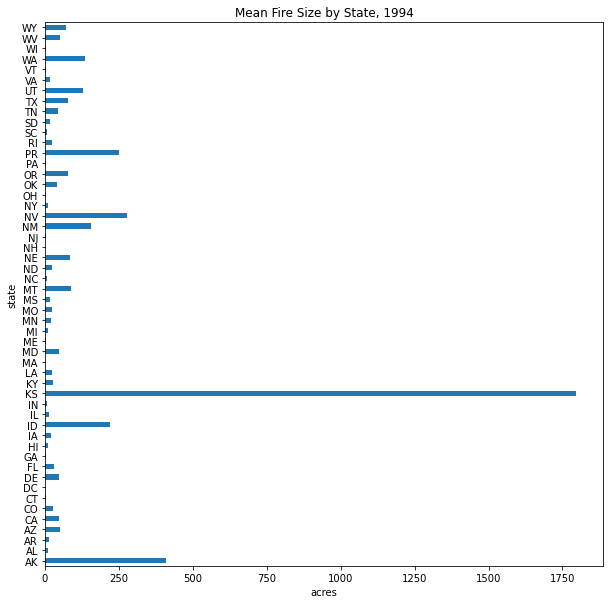

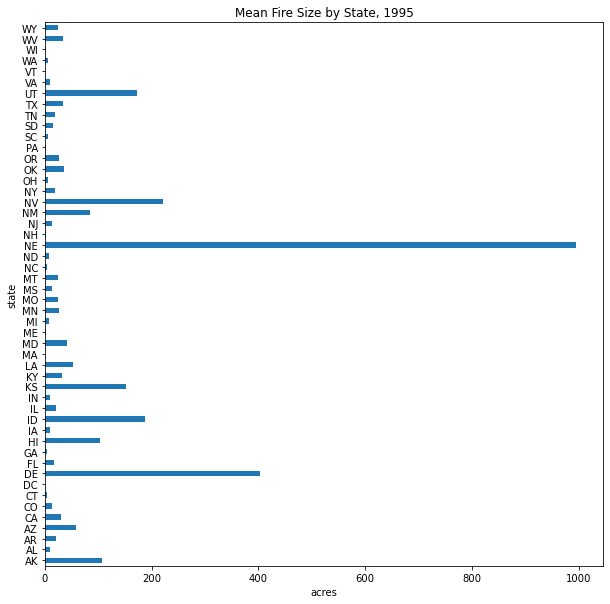

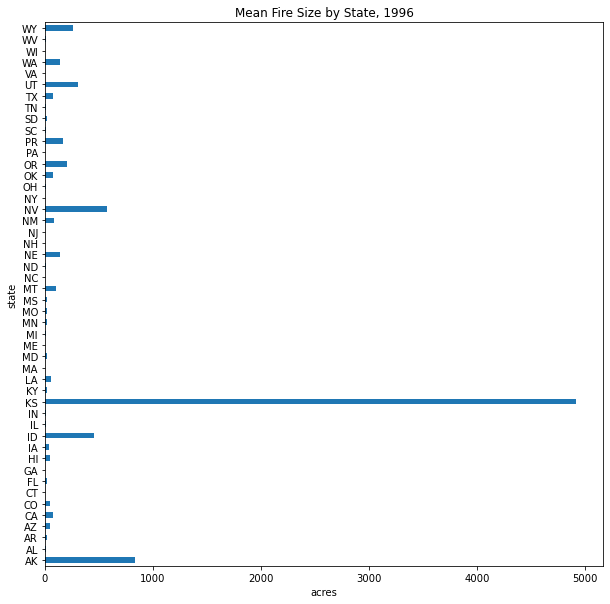

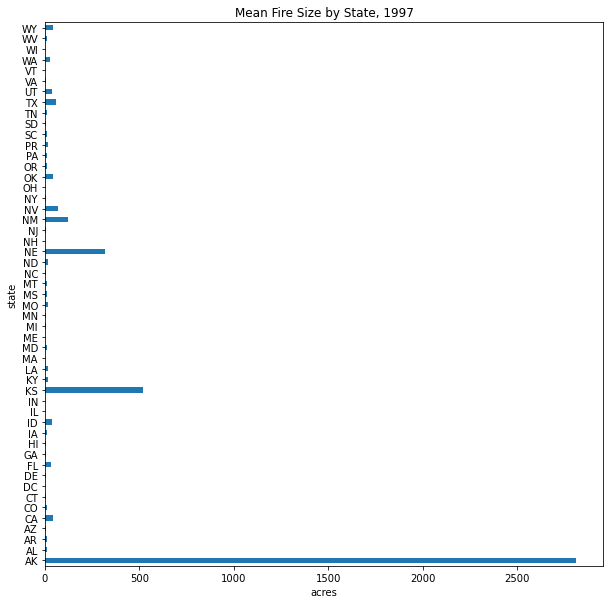

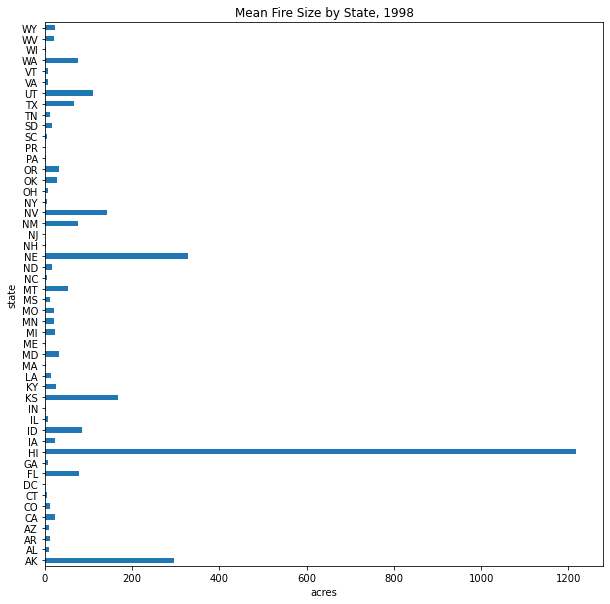

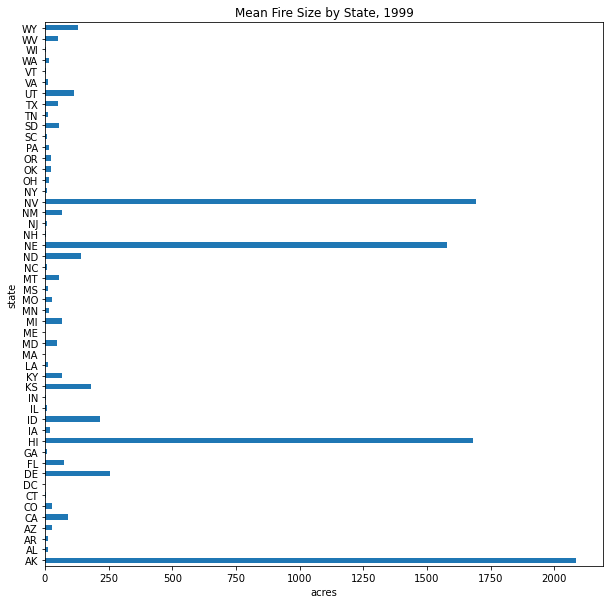

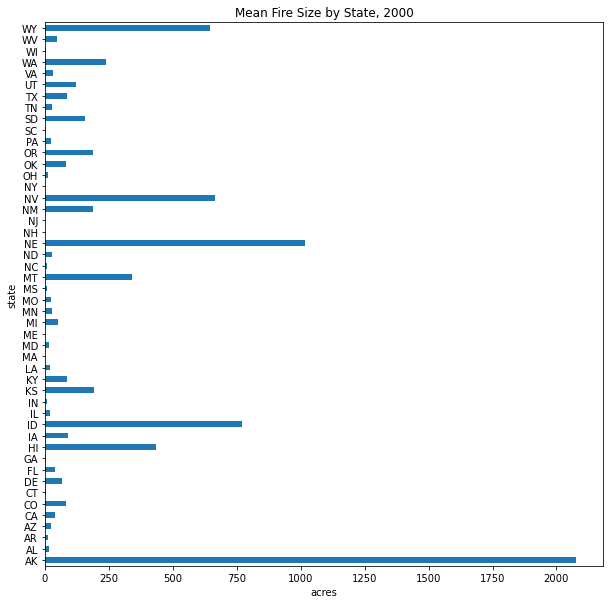

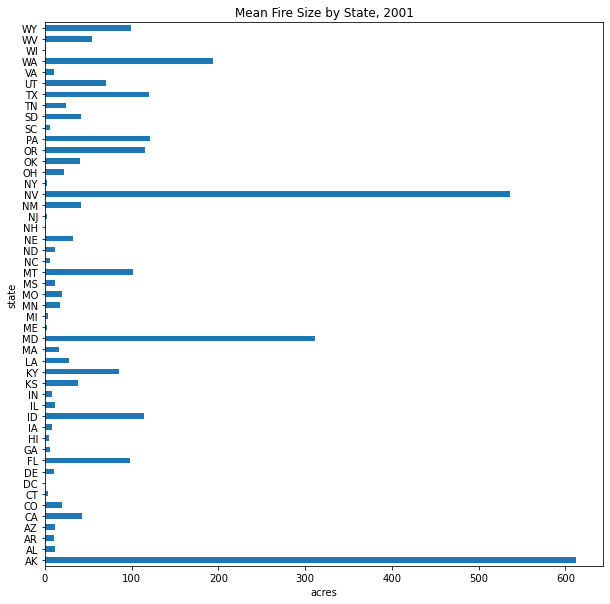

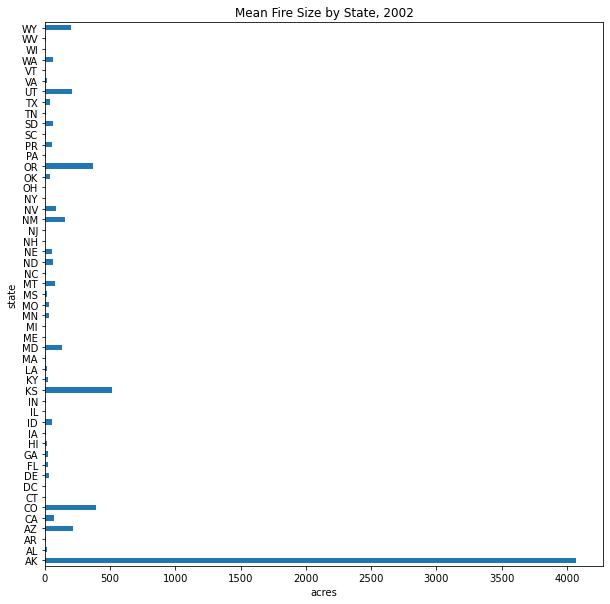

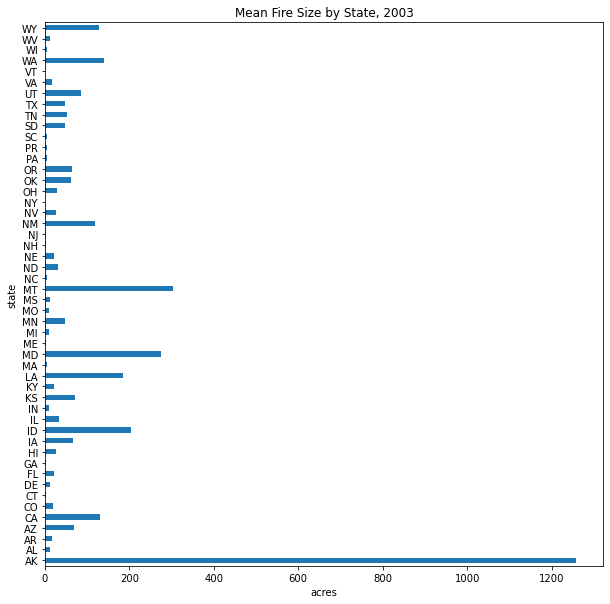

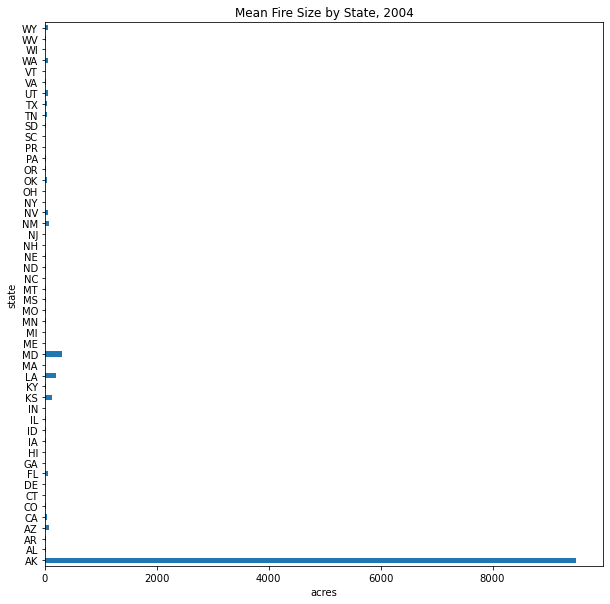

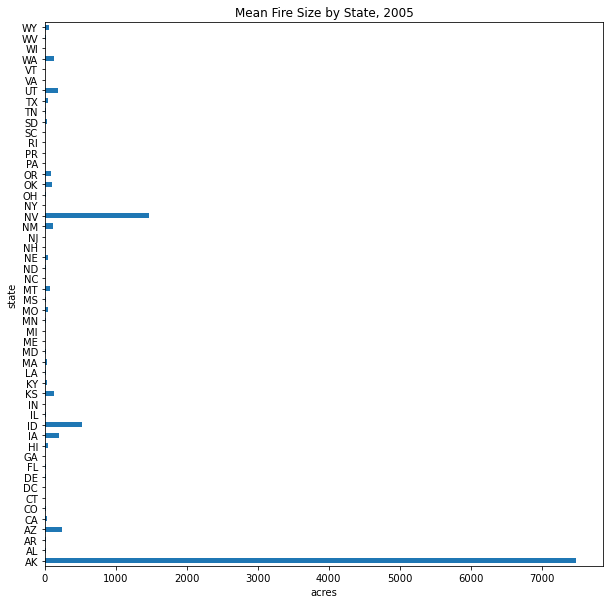

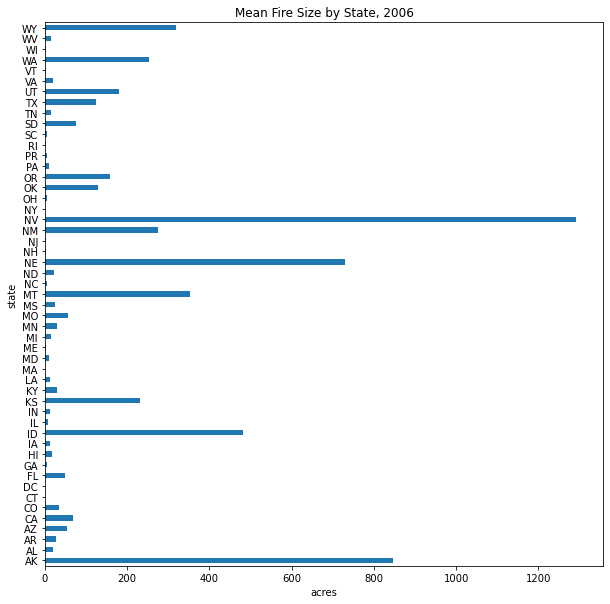

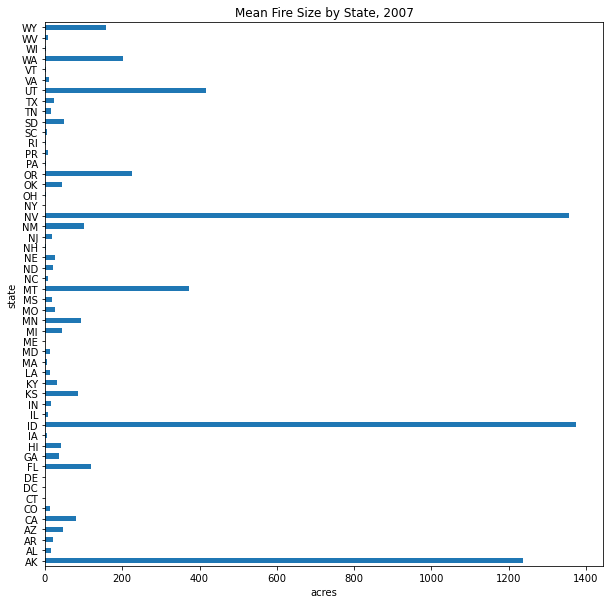

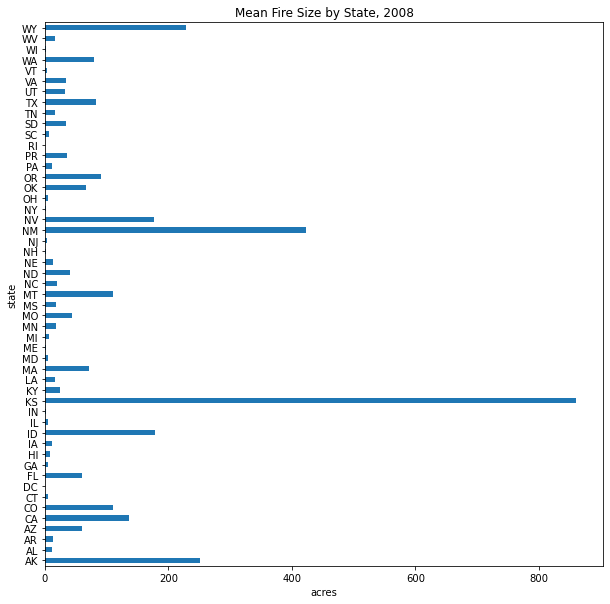

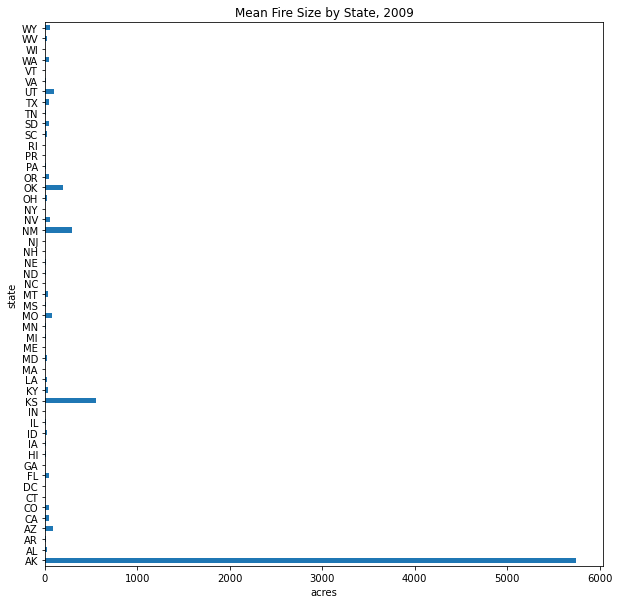

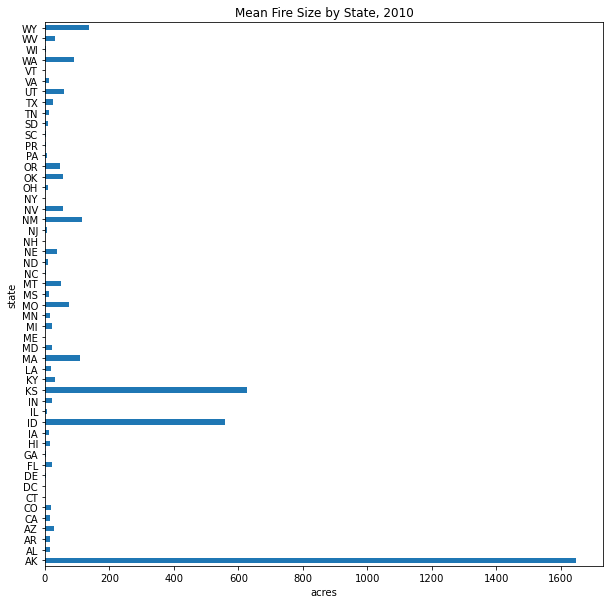

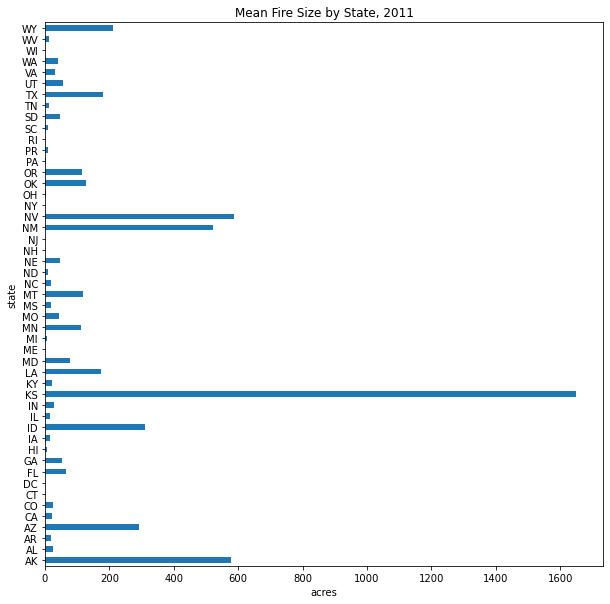

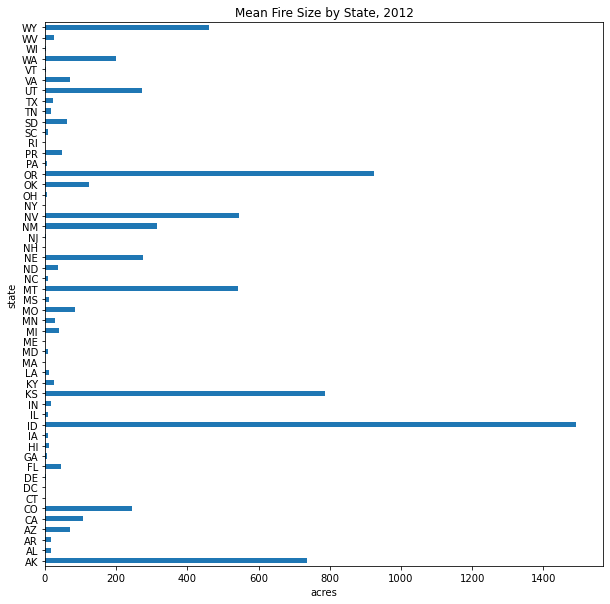

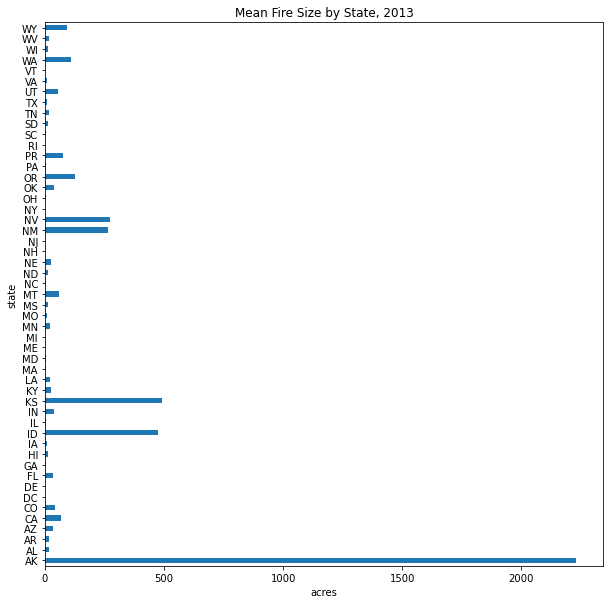

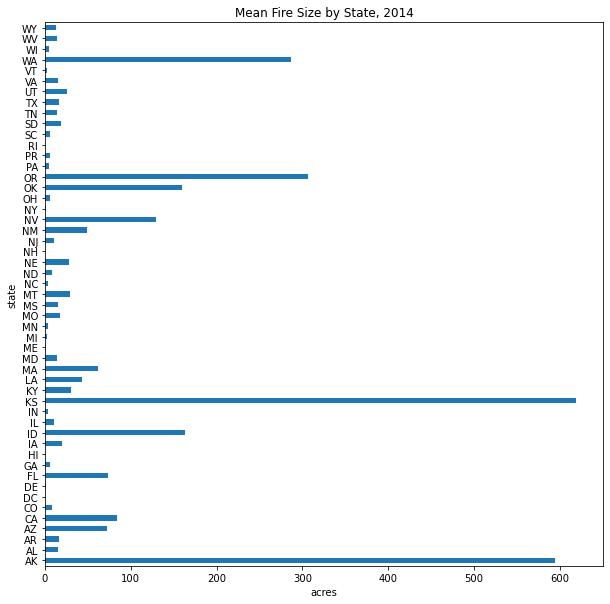

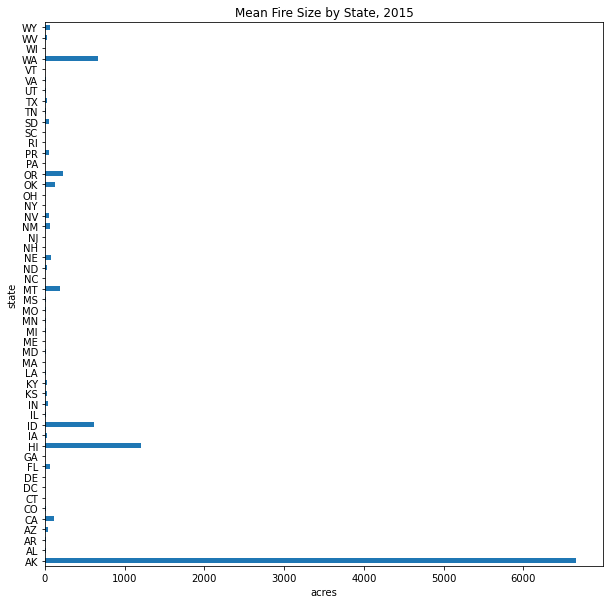

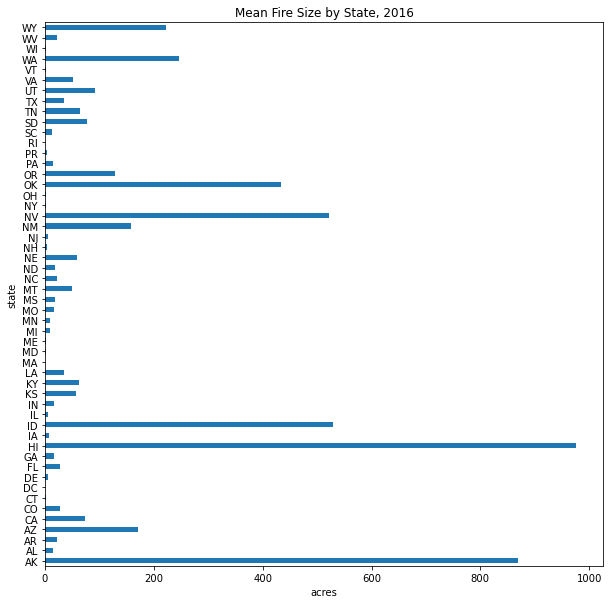

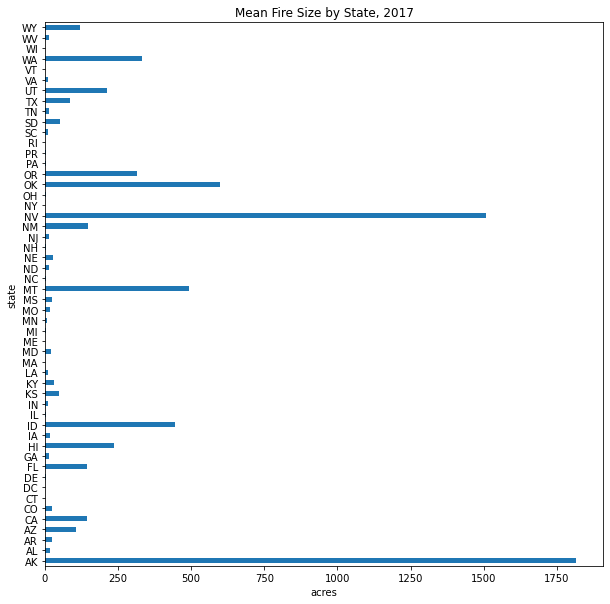

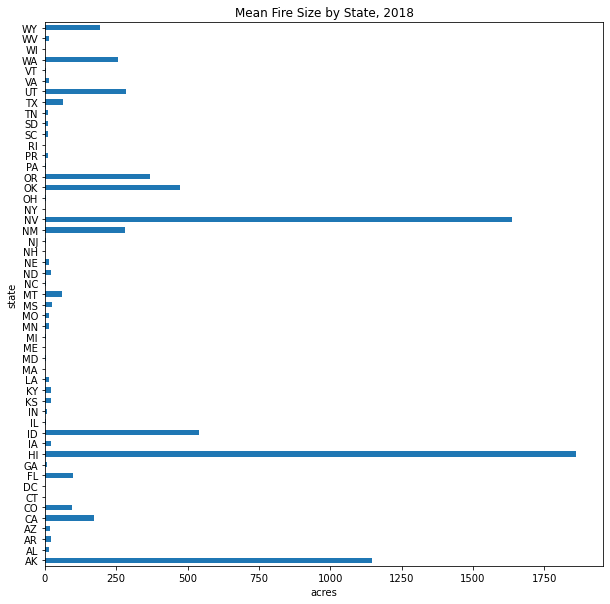

In [32]:
# view mean fire size by state for each year
for year in list(range(1992,2019)):
    plt.figure(figsize=(10,10))
    fires[fires.fire_year == year].groupby('state').fire_size.mean().plot.barh().set(title=f'Mean Fire Size by State, {year}', xlabel='acres')
    plt.show();

[Text(0.5, 1.0, 'Median Fire Size by State'), Text(0.5, 0, 'acres')]

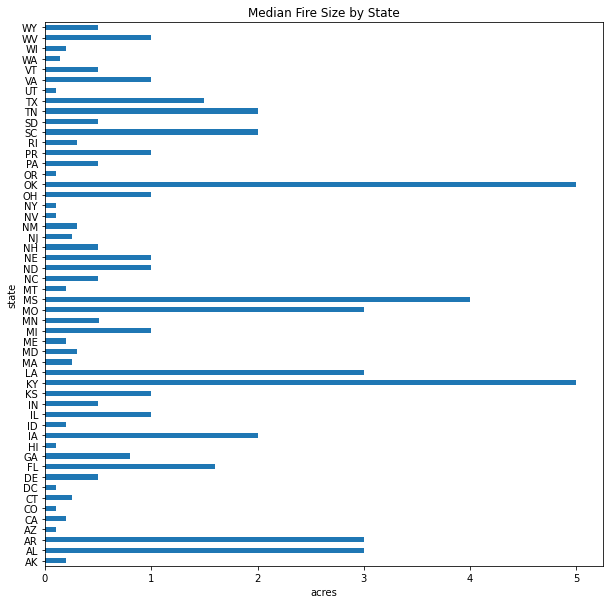

In [33]:
# view overall median fire size by state
plt.figure(figsize=(10,10))
fires.groupby('state').fire_size.median().plot.barh().set(title='Median Fire Size by State', xlabel='acres')

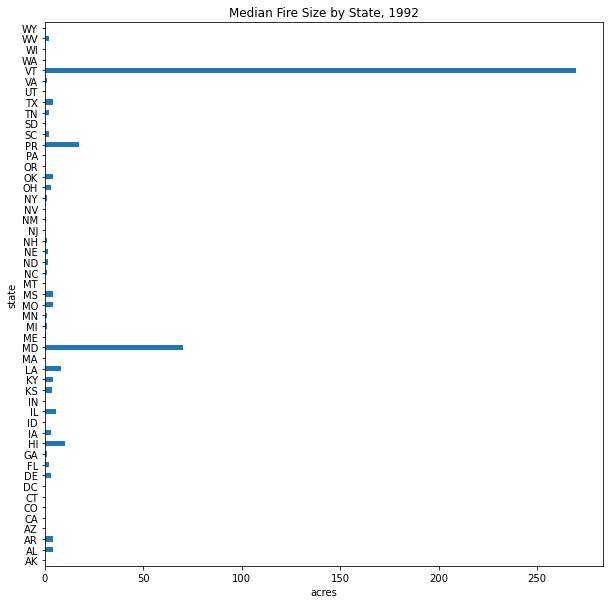

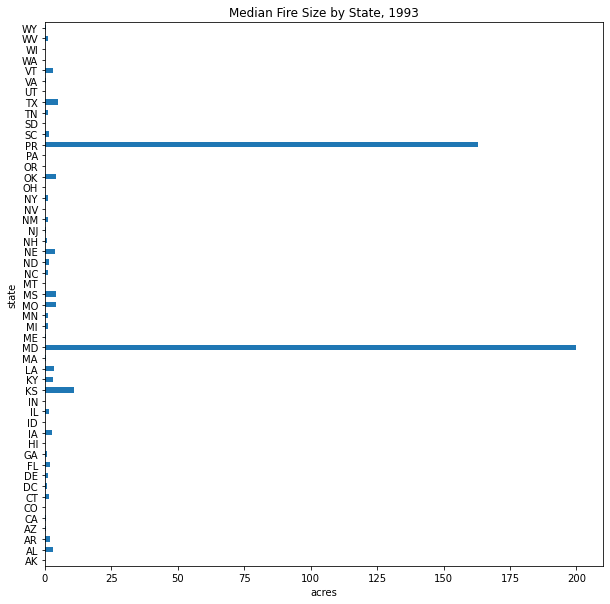

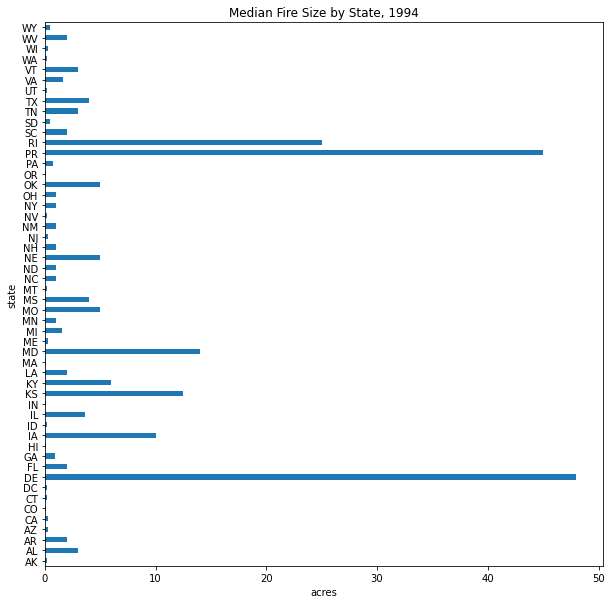

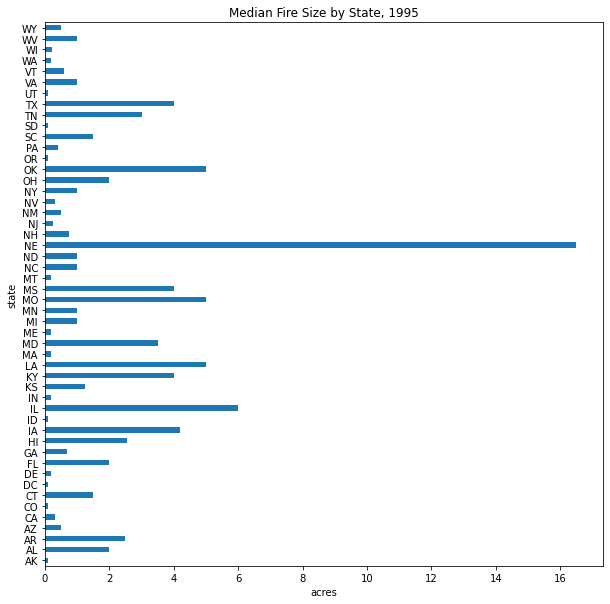

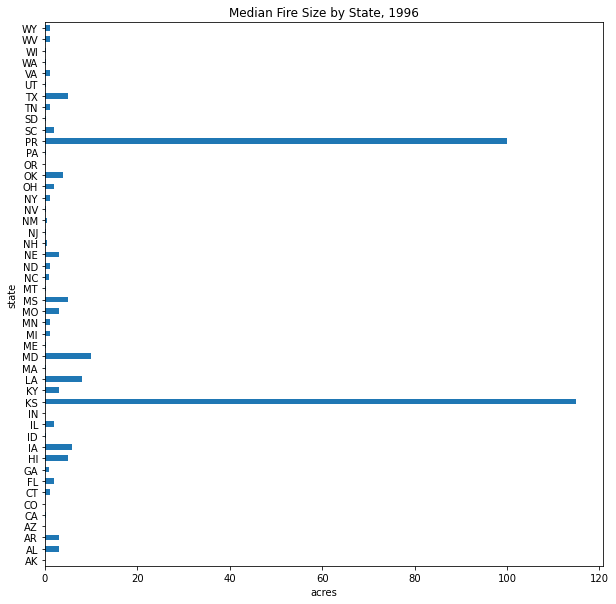

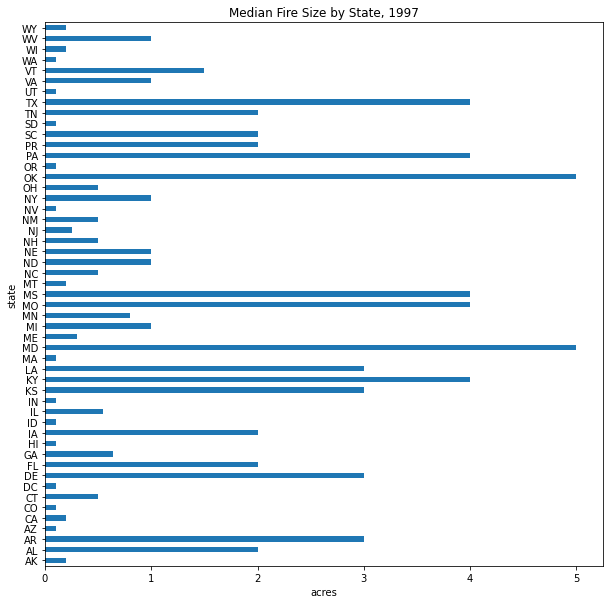

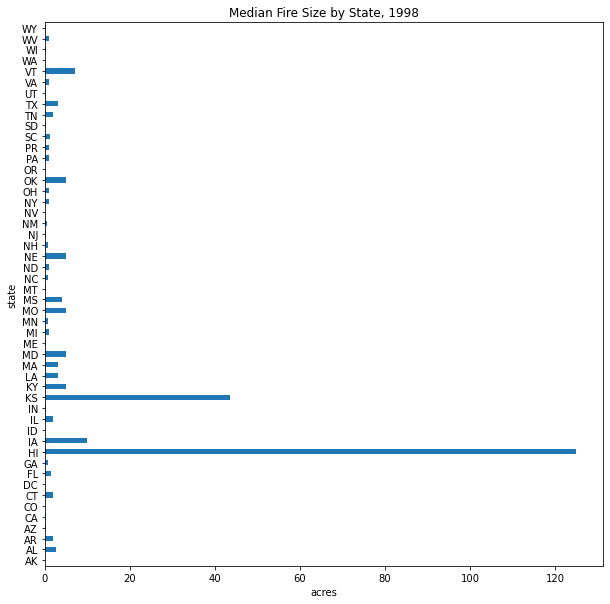

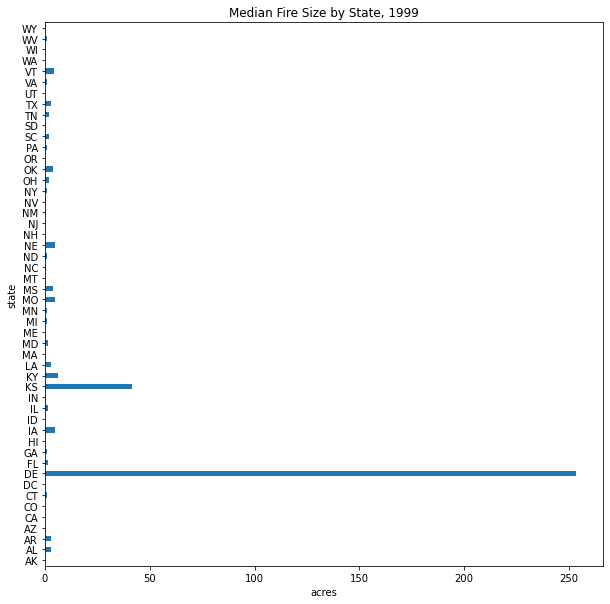

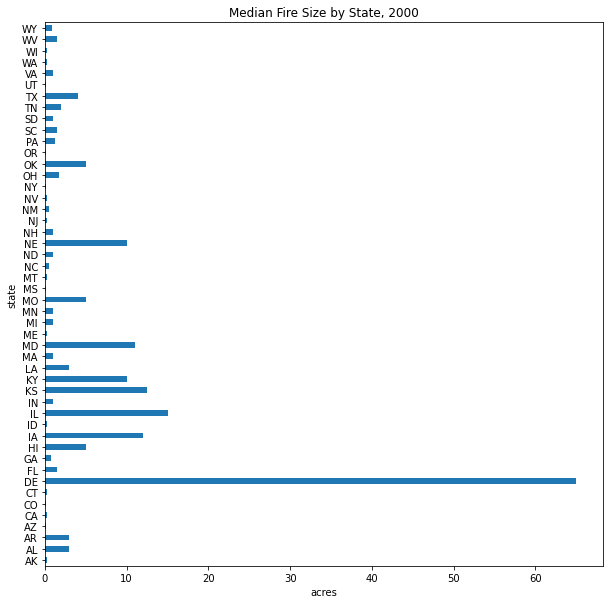

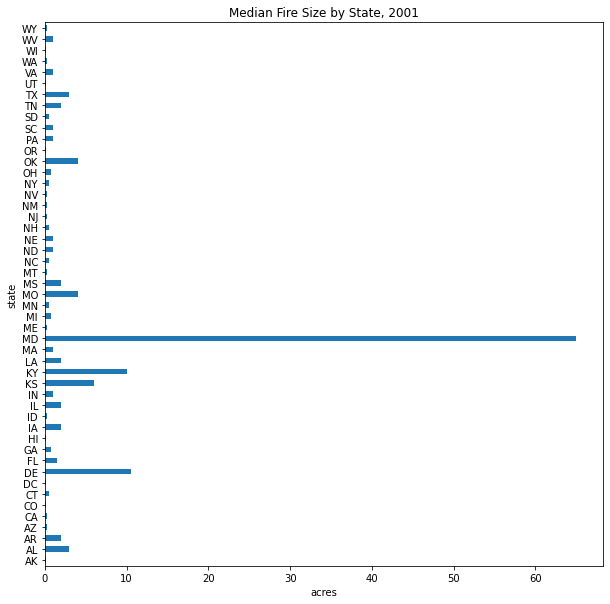

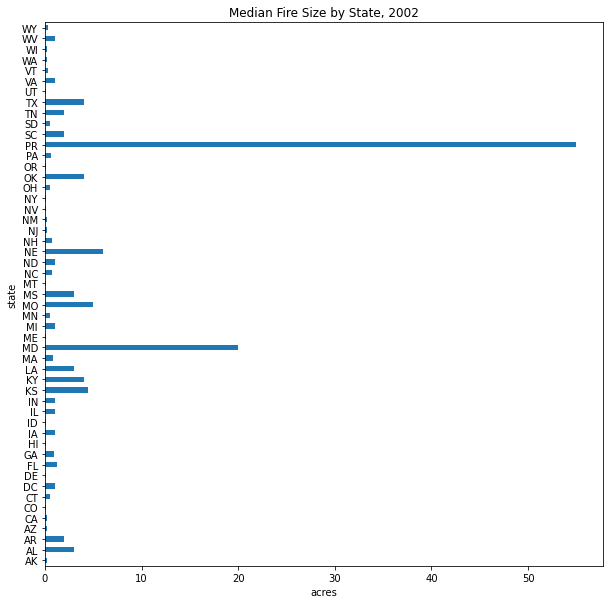

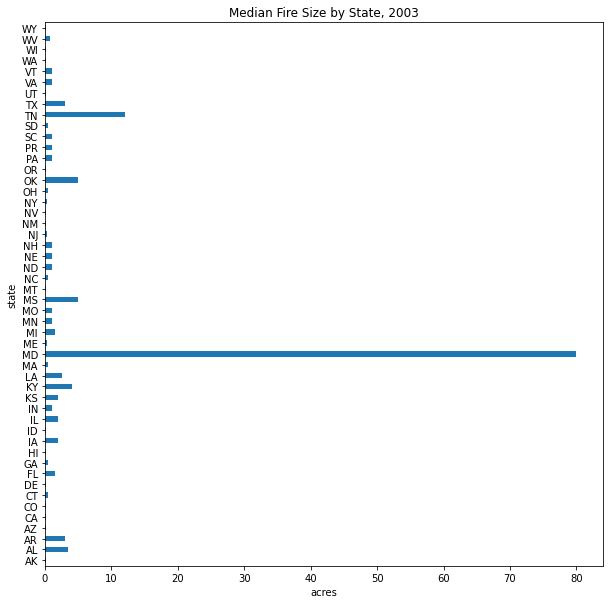

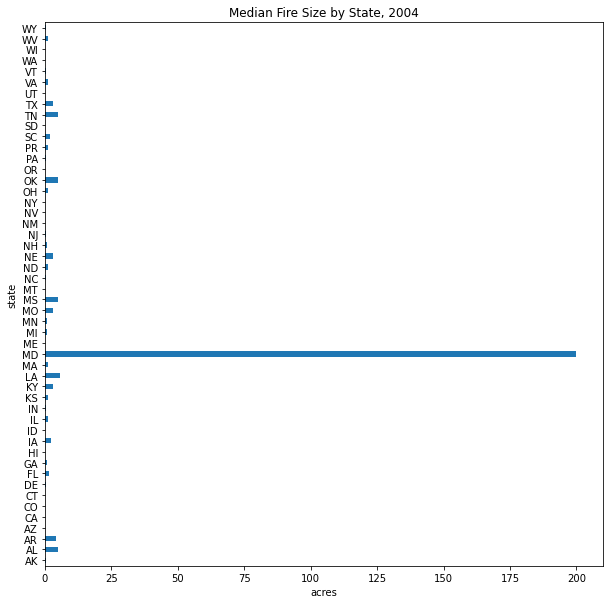

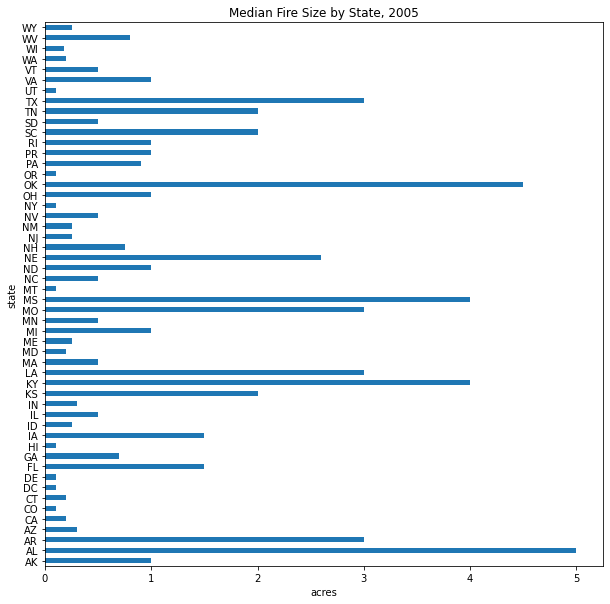

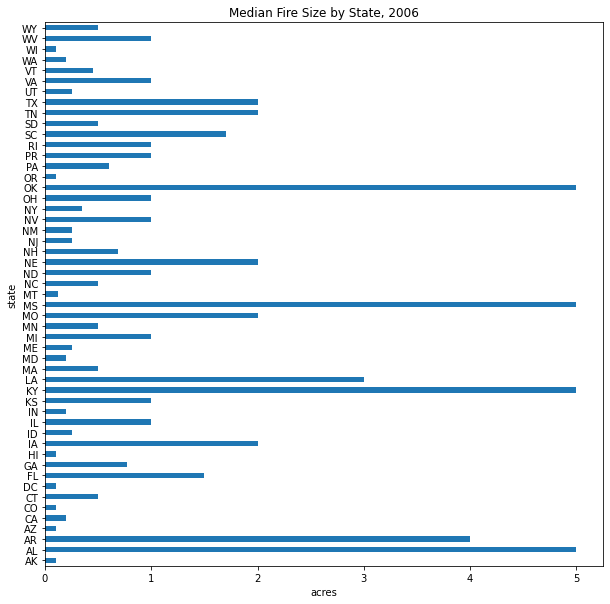

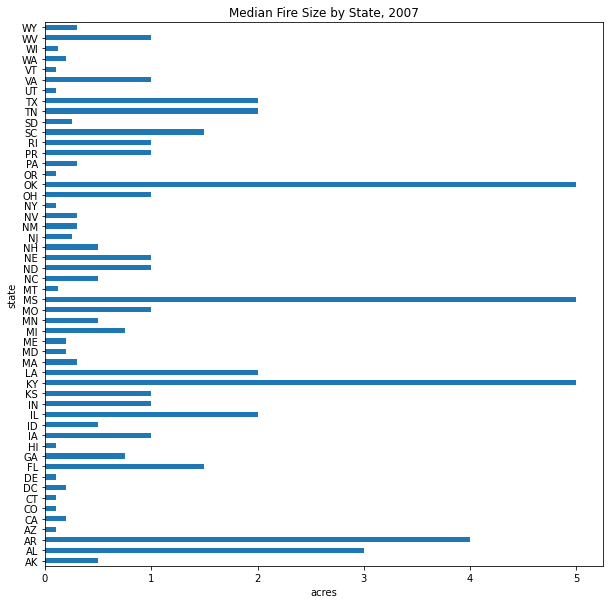

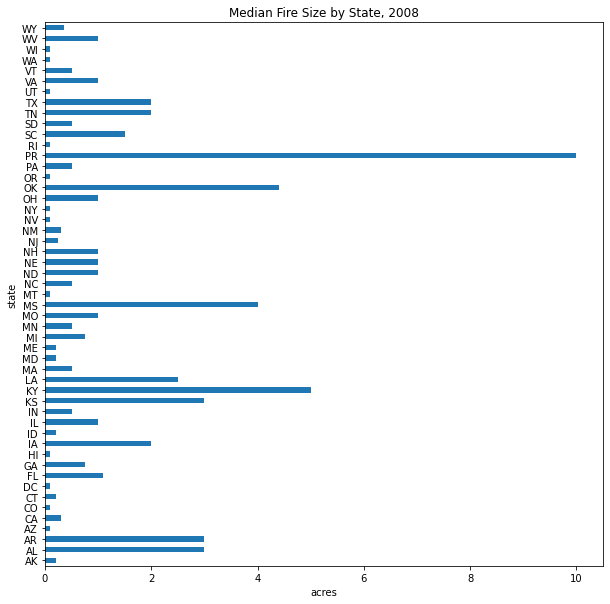

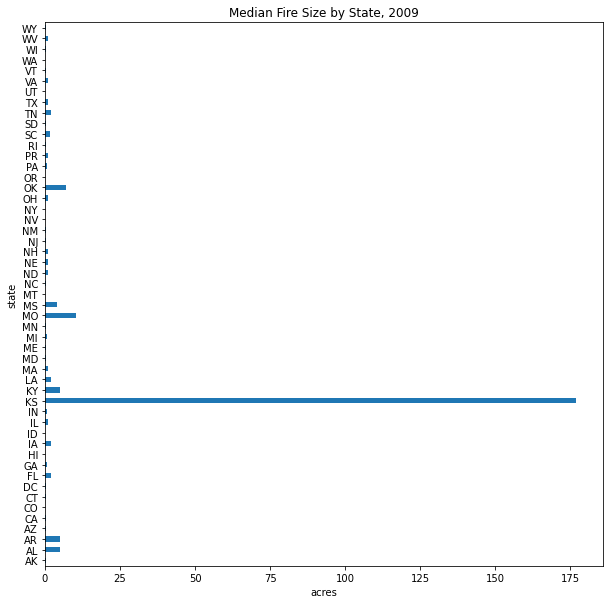

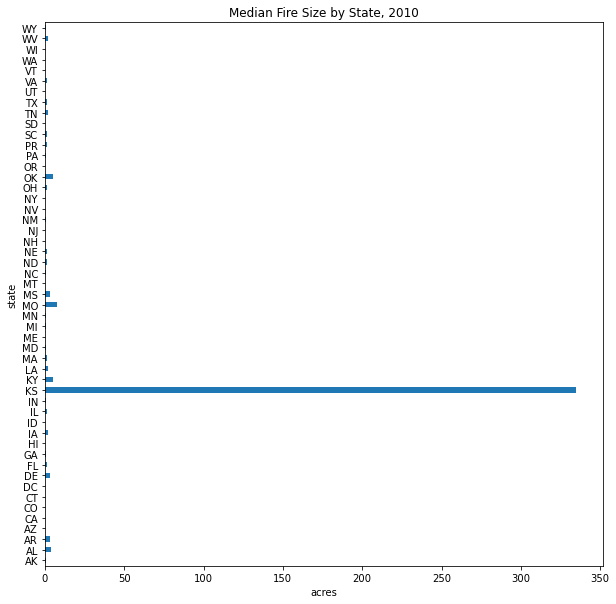

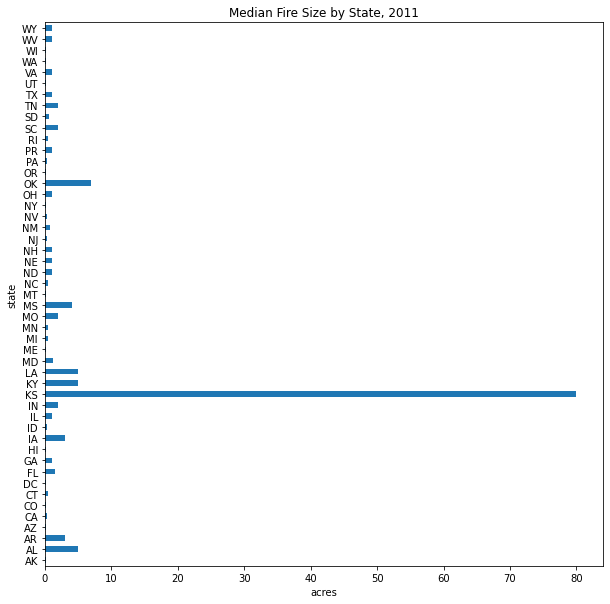

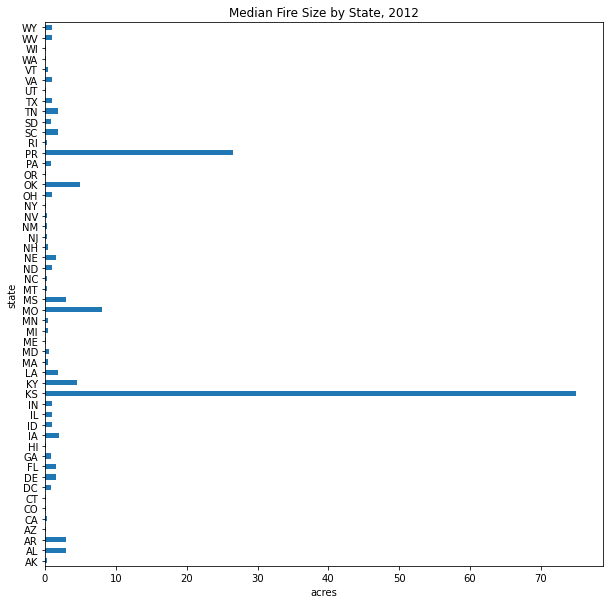

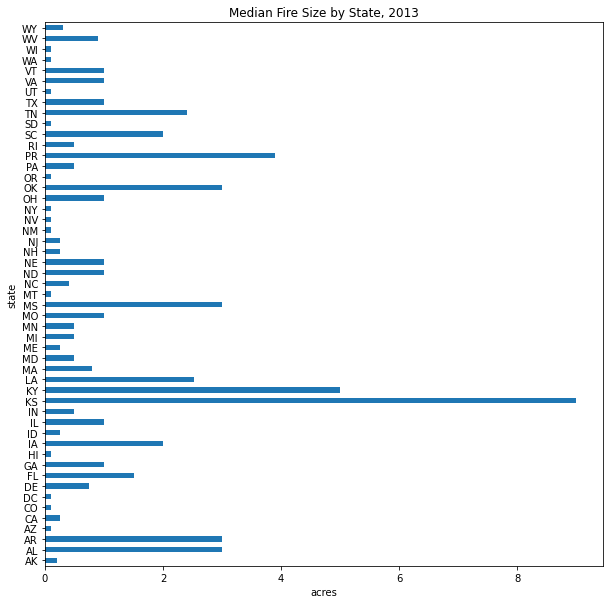

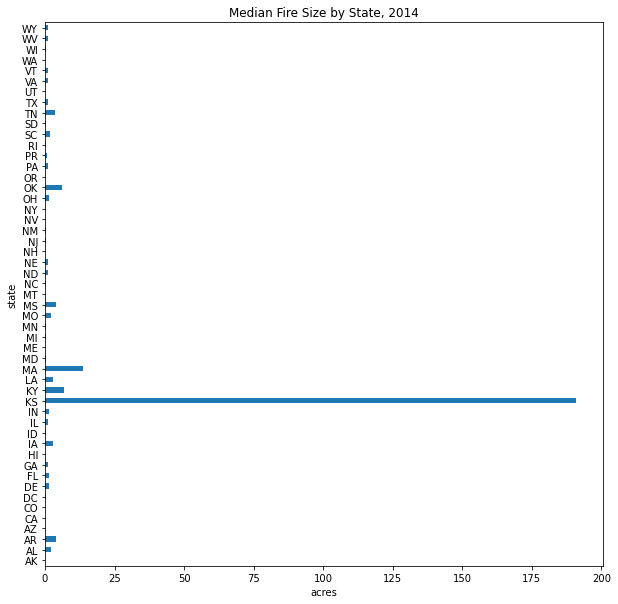

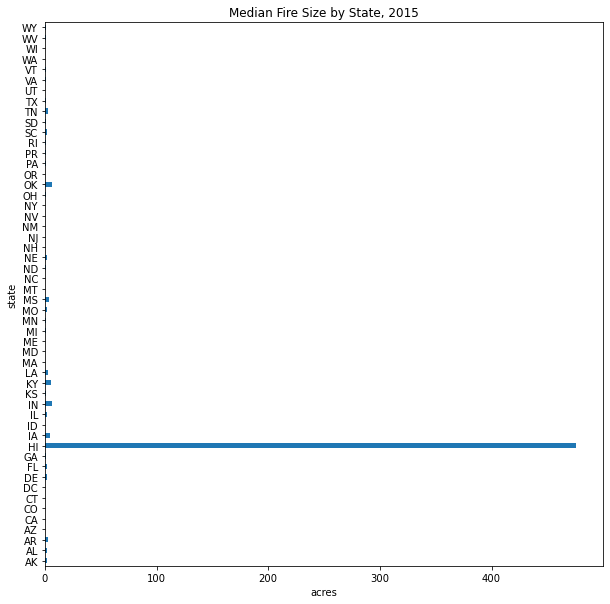

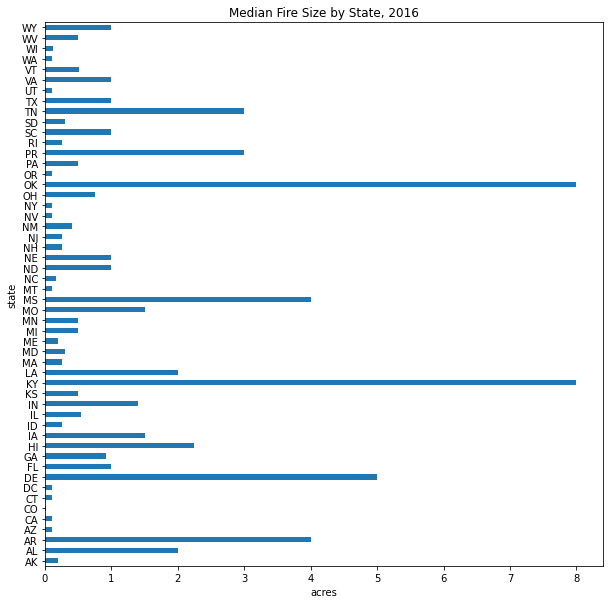

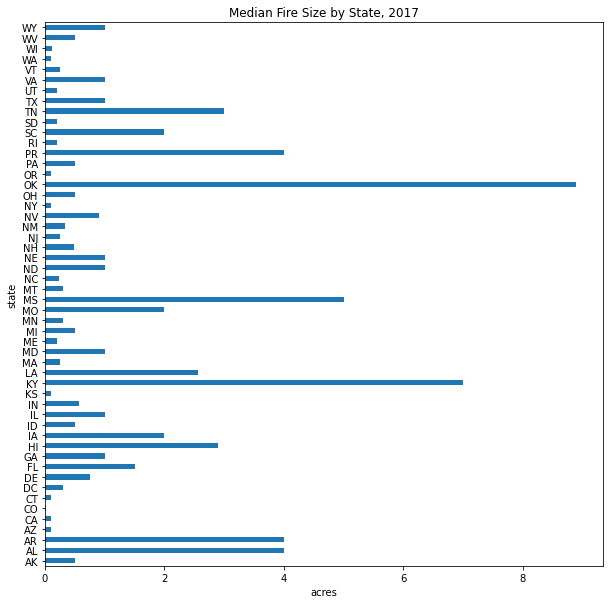

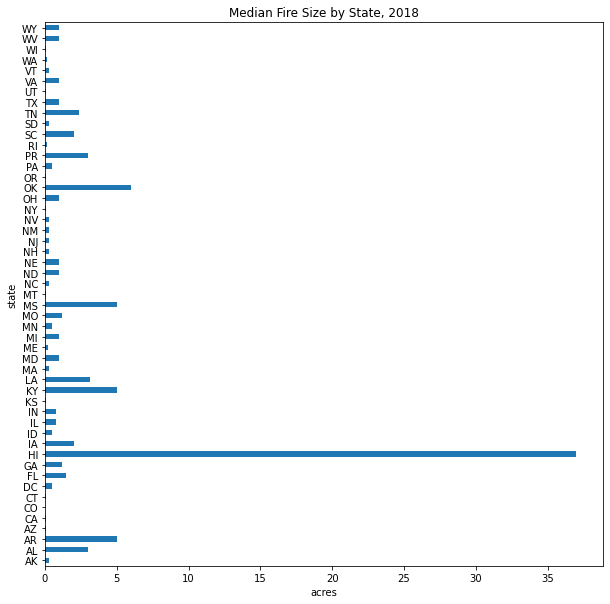

In [34]:
# view median fire size by state for each year
for year in list(range(1992,2019)):
    plt.figure(figsize=(10,10))
    fires[fires.fire_year == year].groupby('state').fire_size.median().plot.barh().set(title=f'Median Fire Size by State, {year}', xlabel='acres')
    plt.show();

I want to look at the full, original dataframe again to see if we can use any fire name or fire_class_size data for our storytelling or visualizations.

In [35]:
#Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

In [36]:
# pull original fires df
og_fire_df = pd.read_csv('fires.csv', index_col=0)
og_fire_df

FOD_ID               FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0                1           FS-1418826                FED   FS-FIRESTAT   
1                2           FS-1418827                FED   FS-FIRESTAT   
2                3           FS-1418835                FED   FS-FIRESTAT   
3                4           FS-1418845                FED   FS-FIRESTAT   
4                5           FS-1418847                FED   FS-FIRESTAT   
...            ...                  ...                ...           ...   
2166748  400482078  ICS209_2016_4363266          INTERAGCY     IA-ICS209   
2166749  400482080  ICS209_2016_4433939          INTERAGCY     IA-ICS209   
2166750  400482083  ICS209_2017_7335143          INTERAGCY     IA-ICS209   
2166751  400482085  ICS209_2017_7186124          INTERAGCY     IA-ICS209   
2166752  400482086  ICS209_2015_2836014          INTERAGCY     IA-ICS209   

        NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0                          FS                USCAPNF   
1                          FS                USCAENF   
2                          FS                USCAENF   
3                          FS                USCAENF   
4                          FS                USCAENF   
...                       ...                    ...   
2166748                ST/C&L                USTNTNS   
2166749                ST/C&L                USALALS   
2166750                ST/C&L                USALALS   
2166751                    FS                USAROUF   
2166752                ST/C&L                USOKOKS   

               NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0                Plumas National Forest                   511   
1              Eldorado National Forest                   503   
2              Eldorado National Forest                   503   
3              Eldorado National Forest                   503   
4              Eldorado National Forest                   503   
...                                 ...                   ...   
2166748  Tennessee Division of Forestry                 TNTNS   
2166749     Alabama Forestry Commission                 ALALS   
2166750     Alabama Forestry Commission                 ALALS   
2166751        Ouachita National Forest                 AROUF   
2166752   Oklahoma Division of Forestry                 OKECU   

                SOURCE_REPORTING_UNIT_NAME LOCAL_FIRE_REPORT_ID  \
0                   Plumas National Forest                    1   
1                 Eldorado National Forest                   13   
2                 Eldorado National Forest                   27   
3                 Eldorado National Forest                   43   
4                 Eldorado National Forest                   44   
...                                    ...                  ...   
2166748     Tennessee Division of Forestry                  NaN   
2166749        Alabama Forestry Commission                  NaN   
2166750        Alabama Forestry Commission                  NaN   
2166751           Ouachita National Forest                  NaN   
2166752  East Central Area Dispatch Office                  NaN   

        LOCAL_INCIDENT_ID FIRE_CODE            FIRE_NAME  \
0                  PNF-47      BJ8K             FOUNTAIN   
1                      13      AAC0               PIGEON   
2                     021      A32W                SLACK   
3                       6       NaN                 DEER   
4                       7       NaN             STEVENOT   
...                   ...       ...                  ...   
2166748            ED0021       NaN         BUFFALO ROAD   
2166749        2016102216       NaN      LITTLE CHESTANE   
2166750         201704025       NaN               CAMPER   
2166751            001201      LH4Z            PENINSULA   
2166752            PB007A       NaN  JOEL WEAVER (SOUTH)   

            ICS_209_PLUS_INCIDENT_JOIN_ID ICS_209_PLUS_COMPLEX_JOIN_ID  \
0                                     NaN    

In [37]:
# look at biggest fire
og_fire_df[og_fire_df.FIRE_SIZE == og_fire_df.FIRE_SIZE.max()]

FOD_ID               FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
2042982  400217728  ICS209_2017_7145623          INTERAGCY     IA-ICS209   

        NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
2042982                ST/C&L                USOKOKS   

              NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
2042982  Oklahoma Division of Forestry                 OKOKS   

            SOURCE_REPORTING_UNIT_NAME LOCAL_FIRE_REPORT_ID LOCAL_INCIDENT_ID  \
2042982  Oklahoma Division of Forestry                  NaN            000527   

        FIRE_CODE       FIRE_NAME ICS_209_PLUS_INCIDENT_JOIN_ID  \
2042982      KWV0  OKS - STARBUCK   2017_7145623_OKS - STARBUCK   

             ICS_209_PLUS_COMPLEX_JOIN_ID                MTBS_ID  \
2042982  2017_7155675_NW OKLAHOMA COMPLEX  OK3677410017520170307   

         MTBS_FIRE_NAME         COMPLEX_NAME  FIRE_YEAR DISCOVERY_DATE  \
2042982  OKS - STARBUCK  NW OKLAHOMA COMPLEX       2017  3/7/2017 0:00   

         DISCOVERY_DOY  DISCOVERY_TIME  \
2042982             66          1237.0   

                       NWCG_CAUSE_CLASSIFICATION  \
2042982  Missing data/not specified/undetermined   

                              NWCG_GENERAL_CAUSE NWCG_CAUSE_AGE_CATEGORY  \
2042982  Missing data/not specified/undetermined                     NaN   

        CONT_DATE  CONT_DOY  CONT_TIME  FIRE_SIZE FIRE_SIZE_CLASS  LATITUDE  \
2042982       NaN       NaN        NaN   662700.0               G  36.77447   

         LONGITUDE            OWNER_DESCR STATE         COUNTY  FIPS_CODE  \
2042982  -100.1752  MISSING/NOT SPECIFIED    OK  Beaver County    40007.0   

             FIPS_NAME  
2042982  Beaver County

In [38]:
# look at data for named fires
og_fire_df[og_fire_df.FIRE_NAME.notnull()]

FOD_ID               FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0                1           FS-1418826                FED   FS-FIRESTAT   
1                2           FS-1418827                FED   FS-FIRESTAT   
2                3           FS-1418835                FED   FS-FIRESTAT   
3                4           FS-1418845                FED   FS-FIRESTAT   
4                5           FS-1418847                FED   FS-FIRESTAT   
...            ...                  ...                ...           ...   
2166748  400482078  ICS209_2016_4363266          INTERAGCY     IA-ICS209   
2166749  400482080  ICS209_2016_4433939          INTERAGCY     IA-ICS209   
2166750  400482083  ICS209_2017_7335143          INTERAGCY     IA-ICS209   
2166751  400482085  ICS209_2017_7186124          INTERAGCY     IA-ICS209   
2166752  400482086  ICS209_2015_2836014          INTERAGCY     IA-ICS209   

        NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0                          FS                USCAPNF   
1                          FS                USCAENF   
2                          FS                USCAENF   
3                          FS                USCAENF   
4                          FS                USCAENF   
...                       ...                    ...   
2166748                ST/C&L                USTNTNS   
2166749                ST/C&L                USALALS   
2166750                ST/C&L                USALALS   
2166751                    FS                USAROUF   
2166752                ST/C&L                USOKOKS   

               NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0                Plumas National Forest                   511   
1              Eldorado National Forest                   503   
2              Eldorado National Forest                   503   
3              Eldorado National Forest                   503   
4              Eldorado National Forest                   503   
...                                 ...                   ...   
2166748  Tennessee Division of Forestry                 TNTNS   
2166749     Alabama Forestry Commission                 ALALS   
2166750     Alabama Forestry Commission                 ALALS   
2166751        Ouachita National Forest                 AROUF   
2166752   Oklahoma Division of Forestry                 OKECU   

                SOURCE_REPORTING_UNIT_NAME LOCAL_FIRE_REPORT_ID  \
0                   Plumas National Forest                    1   
1                 Eldorado National Forest                   13   
2                 Eldorado National Forest                   27   
3                 Eldorado National Forest                   43   
4                 Eldorado National Forest                   44   
...                                    ...                  ...   
2166748     Tennessee Division of Forestry                  NaN   
2166749        Alabama Forestry Commission                  NaN   
2166750        Alabama Forestry Commission                  NaN   
2166751           Ouachita National Forest                  NaN   
2166752  East Central Area Dispatch Office                  NaN   

        LOCAL_INCIDENT_ID FIRE_CODE            FIRE_NAME  \
0                  PNF-47      BJ8K             FOUNTAIN   
1                      13      AAC0               PIGEON   
2                     021      A32W                SLACK   
3                       6       NaN                 DEER   
4                       7       NaN             STEVENOT   
...                   ...       ...                  ...   
2166748            ED0021       NaN         BUFFALO ROAD   
2166749        2016102216       NaN      LITTLE CHESTANE   
2166750         201704025       NaN               CAMPER   
2166751            001201      LH4Z            PENINSULA   
2166752            PB007A       NaN  JOEL WEAVER (SOUTH)   

            ICS_209_PLUS_INCIDENT_JOIN_ID ICS_209_PLUS_COMPLEX_JOIN_ID  \
0                                     NaN    

In [39]:
# see how much data is left with non-null fire names and containment dates
og_fire_df[og_fire_df.FIRE_NAME.notnull() & og_fire_df.CONT_DATE.notnull()]

FOD_ID                       FPA_ID SOURCE_SYSTEM_TYPE  \
0                1                   FS-1418826                FED   
1                2                   FS-1418827                FED   
2                3                   FS-1418835                FED   
3                4                   FS-1418845                FED   
4                5                   FS-1418847                FED   
...            ...                          ...                ...   
2166694  400481851  SFO-2018CT_CTS160-2018-0001             NONFED   
2166695  400481852  SFO-2018CT_CTS129-2018-0001             NONFED   
2166696  400481854  SFO-2018CT_CTS038-2018-0002             NONFED   
2166697  400481855  SFO-2018CT_CTS026-2018-0001             NONFED   
2166698  400481857  SFO-2018CT_CTS038-2018-0003             NONFED   

        SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0         FS-FIRESTAT                    FS                USCAPNF   
1         FS-FIRESTAT                    FS                USCAENF   
2         FS-FIRESTAT                    FS                USCAENF   
3         FS-FIRESTAT                    FS                USCAENF   
4         FS-FIRESTAT                    FS                USCAENF   
...               ...                   ...                    ...   
2166694       ST-NASF                ST/C&L                USCTCTS   
2166695       ST-NASF                ST/C&L                USCTCTS   
2166696       ST-NASF                ST/C&L                USCTCTS   
2166697       ST-NASF                ST/C&L                USCTCTS   
2166698       ST-NASF                ST/C&L                USCTCTS   

                 NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0                  Plumas National Forest                   511   
1                Eldorado National Forest                   503   
2                Eldorado National Forest                   503   
3                Eldorado National Forest                   503   
4                Eldorado National Forest                   503   
...                                   ...                   ...   
2166694  Connecticut Division of Forestry                 CTCTS   
2166695  Connecticut Division of Forestry                 CTCTS   
2166696  Connecticut Division of Forestry                 CTCTS   
2166697  Connecticut Division of Forestry                 CTCTS   
2166698  Connecticut Division of Forestry                 CTCTS   

               SOURCE_REPORTING_UNIT_NAME LOCAL_FIRE_REPORT_ID  \
0                  Plumas National Forest                    1   
1                Eldorado National Forest                   13   
2                Eldorado National Forest                   27   
3                Eldorado National Forest                   43   
4                Eldorado National Forest                   44   
...                                   ...                  ...   
2166694  Connecticut Division of Forestry                  NaN   
2166695  Connecticut Division of Forestry                  NaN   
2166696  Connecticut Division of Forestry                  NaN   
2166697  Connecticut Division of Forestry                  NaN   
2166698  Connecticut Division of Forestry                  NaN   

        LOCAL_INCIDENT_ID FIRE_CODE                    FIRE_NAME  \
0                  PNF-47      BJ8K                     FOUNTAIN   
1                      13      AAC0                       PIGEON   
2                     021      A32W                        SLACK   
3                       6       NaN                         DEER   
4                       7       NaN                     STEVENOT   
...                   ...       ...                          ...   
2166694     160-2018-0001       NaN        TURNPIKE RD/BALAZS RD   
2166695     129-2018-0001       NaN             21 PLYMOUTH ROAD   
2166696     038-2018-0002       NaN          257 STAGECOACH ROAD   
2166697     026-2018-0001       NaN  KINGS HWY AND G

In [40]:
# view nulls per column
og_fire_df.isna().sum()

FOD_ID                                 0
FPA_ID                                 0
SOURCE_SYSTEM_TYPE                     0
SOURCE_SYSTEM                          0
NWCG_REPORTING_AGENCY                  0
NWCG_REPORTING_UNIT_ID                 0
NWCG_REPORTING_UNIT_NAME               0
SOURCE_REPORTING_UNIT                  0
SOURCE_REPORTING_UNIT_NAME             0
LOCAL_FIRE_REPORT_ID             1701854
LOCAL_INCIDENT_ID                 734948
FIRE_CODE                        1797127
FIRE_NAME                         960596
ICS_209_PLUS_INCIDENT_JOIN_ID    2135993
ICS_209_PLUS_COMPLEX_JOIN_ID     2165833
MTBS_ID                          2153848
MTBS_FIRE_NAME                   2153848
COMPLEX_NAME                     2161081
FIRE_YEAR                              0
DISCOVERY_DATE                         0
DISCOVERY_DOY                          0
DISCOVERY_TIME                    754468
NWCG_CAUSE_CLASSIFICATION              1
NWCG_GENERAL_CAUSE                     0
NWCG_CAUSE_AGE_C

In [41]:
# view shape of og df
og_fire_df.shape

(2166753, 37)

In [42]:
# bring in fire names and fire size class to working fires df
fires = pd.merge(fires, og_fire_df[['FIRE_SIZE_CLASS', 'FIRE_NAME']], left_index=True, right_index=True)
fires.columns = fires.columns.str.lower()
fires

fire_year discovery_date                               general_cause  \
0             2005     2005-02-02  Power generation/transmission/distribution   
1             2004     2004-05-12                                     Natural   
2             2004     2004-05-31                     Debris and open burning   
3             2004     2004-06-28                                     Natural   
4             2004     2004-06-28                                     Natural   
...            ...            ...                                         ...   
2166748       2016     2016-10-18     Missing data/not specified/undetermined   
2166749       2016     2016-10-22     Missing data/not specified/undetermined   
2166750       2017     2017-04-02     Missing data/not specified/undetermined   
2166751       2017     2017-11-30     Missing data/not specified/undetermined   
2166752       2015     2015-07-20     Missing data/not specified/undetermined   

        containment_date  fire_size   latitude   longitude state  \
0             2005-02-02       0.10  40.036944 -121.005833    CA   
1             2004-05-12       0.25  38.933056 -120.404444    CA   
2             2004-05-31       0.10  38.984167 -120.735556    CA   
3             2004-07-03       0.10  38.559167 -119.913333    CA   
4             2004-07-03       0.10  38.559167 -119.933056    CA   
...                  ...        ...        ...         ...   ...   
2166748              NaT     125.00  36.431667  -84.421667    TN   
2166749              NaT     120.00  31.143611  -88.111944    AL   
2166750              NaT     120.00  33.920000  -85.310000    AL   
2166751              NaT     110.00  34.640000  -93.400000    AR   
2166752              NaT     109.00  34.794167  -94.958000    OK   

        size_category   state_size  pct_state_burned fire_size_class  \
0               small  101676000.0      9.835163e-08               A   
1              medium  101676000.0      2.458791e-07               A   
2               small  101676000.0      9.835163e-08               A   
3               small  101676000.0      9.835163e-08               A   
4               small  101676000.0      9.835163e-08               A   
...               ...          ...               ...             ...   
2166748      extra_lg   26973000.0      4.634264e-04               D   
2166749      extra_lg   33432000.0      3.589375e-04               D   
2166750      extra_lg   33432000.0      3.589375e-04               D   
2166751      extra_lg   34036000.0      3.231872e-04               D   
2166752      extra_lg   44738000.0      2.436408e-04               D   

                   fire_name  
0                   FOUNTAIN  
1                     PIGEON  
2                      SLACK  
3                       DEER  
4                   STEVENOT  
...                      ...  
2166748         BUFFALO ROAD  
2166749      LITTLE CHESTANE  
2166750               CAMPER  
2166751            PENINSULA  
2166752  JOEL WEAVER (SOUTH)  

[2166753 rows x 13 columns]

In [43]:
# view value counts for fire size class
fires.fire_size_class.value_counts()

B    1047772
A     810694
C     246247
D      32261
E      16227
F       9097
G       4455
Name: fire_size_class, dtype: int64

In [44]:
# create column for how long fire burned uncontained
fires['days_uncontrolled'] = fires.containment_date-fires.discovery_date
fires

fire_year discovery_date                               general_cause  \
0             2005     2005-02-02  Power generation/transmission/distribution   
1             2004     2004-05-12                                     Natural   
2             2004     2004-05-31                     Debris and open burning   
3             2004     2004-06-28                                     Natural   
4             2004     2004-06-28                                     Natural   
...            ...            ...                                         ...   
2166748       2016     2016-10-18     Missing data/not specified/undetermined   
2166749       2016     2016-10-22     Missing data/not specified/undetermined   
2166750       2017     2017-04-02     Missing data/not specified/undetermined   
2166751       2017     2017-11-30     Missing data/not specified/undetermined   
2166752       2015     2015-07-20     Missing data/not specified/undetermined   

        containment_date  fire_size   latitude   longitude state  \
0             2005-02-02       0.10  40.036944 -121.005833    CA   
1             2004-05-12       0.25  38.933056 -120.404444    CA   
2             2004-05-31       0.10  38.984167 -120.735556    CA   
3             2004-07-03       0.10  38.559167 -119.913333    CA   
4             2004-07-03       0.10  38.559167 -119.933056    CA   
...                  ...        ...        ...         ...   ...   
2166748              NaT     125.00  36.431667  -84.421667    TN   
2166749              NaT     120.00  31.143611  -88.111944    AL   
2166750              NaT     120.00  33.920000  -85.310000    AL   
2166751              NaT     110.00  34.640000  -93.400000    AR   
2166752              NaT     109.00  34.794167  -94.958000    OK   

        size_category   state_size  pct_state_burned fire_size_class  \
0               small  101676000.0      9.835163e-08               A   
1              medium  101676000.0      2.458791e-07               A   
2               small  101676000.0      9.835163e-08               A   
3               small  101676000.0      9.835163e-08               A   
4               small  101676000.0      9.835163e-08               A   
...               ...          ...               ...             ...   
2166748      extra_lg   26973000.0      4.634264e-04               D   
2166749      extra_lg   33432000.0      3.589375e-04               D   
2166750      extra_lg   33432000.0      3.589375e-04               D   
2166751      extra_lg   34036000.0      3.231872e-04               D   
2166752      extra_lg   44738000.0      2.436408e-04               D   

                   fire_name days_uncontrolled  
0                   FOUNTAIN            0 days  
1                     PIGEON            0 days  
2                      SLACK            0 days  
3                       DEER            5 days  
4                   STEVENOT            5 days  
...                      ...               ...  
2166748         BUFFALO ROAD               NaT  
2166749      LITTLE CHESTANE               NaT  
2166750               CAMPER               NaT  
2166751            PENINSULA               NaT  
2166752  JOEL WEAVER (SOUTH)               NaT  

[2166753 rows x 14 columns]

In [45]:
# view longest uncontrolled fire
fires.days_uncontrolled.max()

Timedelta('36159 days 00:00:00')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

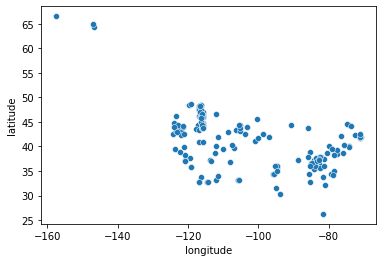

In [46]:
# plot fires uncontrolled for over a year
sns.scatterplot(data=fires[fires.days_uncontrolled > '365 days'], x='longitude', y='latitude')

In [47]:
# view fires burning uncontained longer than 2 years
fires[fires.days_uncontrolled > '730 days']

fire_year discovery_date              general_cause containment_date  \
186190        1998     1998-07-27         Arson/incendiarism       2002-07-27   
294159        2006     2006-06-15                    Natural       2009-06-15   
294160        2006     2006-06-15                    Natural       2009-06-15   
294161        2006     2006-06-23                    Natural       2009-06-24   
305182        2001     2001-06-11                    Natural       2004-06-16   
...            ...            ...                        ...              ...   
2123834       2005     2005-09-26    Recreation and ceremony       2010-08-03   
2123836       2005     2005-08-12                    Natural       2010-07-30   
2124091       2005     2005-08-01                    Natural       2009-08-30   
2124092       2005     2005-07-19  Equipment and vehicle use       2010-09-20   
2124093       2005     2005-08-08                    Natural       2012-08-26   

         fire_size  latitude  longitude state size_category   state_size  \
186190        0.10  44.34940  -90.75990    WI         small   35933000.0   
294159        0.50  33.16340 -105.74690    NM        medium   77823000.0   
294160        0.30  33.25650 -105.73420    NM        medium   77823000.0   
294161        0.30  33.24700 -105.61330    NM        medium   77823000.0   
305182      100.00  66.56610 -157.51940    AK      extra_lg  393747000.0   
...            ...       ...        ...   ...           ...          ...   
2123834       0.10  45.08393 -116.32826    ID         small   53487000.0   
2123836       0.25  46.53424 -116.12223    ID        medium   53487000.0   
2124091       0.10  44.39039 -115.99127    ID         small   53487000.0   
2124092       0.10  45.78468 -116.33390    ID         small   53487000.0   
2124093       0.10  43.87091 -115.88183    ID         small   53487000.0   

         pct_state_burned fire_size_class         fire_name days_uncontrolled  
186190       2.782957e-07               A         HOCHUNK 3         1461 days  
294159       6.424836e-07               B      FOREST DRIVE         1096 days  
294160       3.854902e-07               B            NAICHE         1096 days  
294161       3.854902e-07               B  WHITETAIL SUMMIT         1097 days  
305182       2.539702e-05               D        KILIOVILIK         1101 days  
...                   ...             ...               ...               ...  
2123834      1.869613e-07               A      SCHOOL HOUSE         1772 days  
2123836      4.674033e-07               A       HUCKLEBERRY         1813 days  
2124091      1.869613e-07               A       CLEAR CREEK         1490 days  
2124092      1.869613e-07               A      ALMOST ELMER         1889 days  
2124093      1.869613e-07               A      WILLOW CREEK         2575 days  

[128 rows x 14 columns]

In [48]:
fires[(fires.state_size > 5000000) & (fires.state_size < 6000000)]

fire_year discovery_date                            general_cause  \
5810          2005     2005-05-11  Missing data/not specified/undetermined   
15213         2006     2006-04-21      Railroad operations and maintenance   
16061         2006     2006-07-10                  Recreation and ceremony   
16471         2006     2006-04-30                  Recreation and ceremony   
16649         2006     2006-09-01                  Recreation and ceremony   
...            ...            ...                                      ...   
2111346       2018     2018-05-09  Missing data/not specified/undetermined   
2111347       2018     2018-09-03  Missing data/not specified/undetermined   
2111750       2018     2018-04-24  Missing data/not specified/undetermined   
2118723       2018     2018-04-22  Missing data/not specified/undetermined   
2166728       2014     2014-04-12  Missing data/not specified/undetermined   

        containment_date  fire_size   latitude  longitude state size_category  \
5810          2005-05-11      0.500  44.083333 -71.450000    NH        medium   
15213         2006-04-22    100.000  44.716667 -71.283333    NH      extra_lg   
16061         2006-07-10      0.100  44.400000 -71.400000    NH         small   
16471         2006-04-30      2.000  44.411389 -71.511389    NH         large   
16649         2006-09-01      0.010  44.100000 -71.233333    NH         small   
...                  ...        ...        ...        ...   ...           ...   
2111346              NaT      1.500  43.140000 -72.383410    NH         large   
2111347              NaT      0.022  43.174541 -72.442492    NH         small   
2111750              NaT      0.010  44.607920 -71.218760    NH         small   
2118723              NaT    843.000  39.740000 -74.490000    NJ      extra_lg   
2166728              NaT    300.000  39.971944 -74.433611    NJ      extra_lg   

         state_size  pct_state_burned fire_size_class             fire_name  \
5810      5941000.0      8.416092e-06               B      BARTLETT TURNOUT   
15213     5941000.0      1.683218e-03               D               CASCADE   
16061     5941000.0      1.683218e-06               A      SETHBRENDAN FIRE   
16471     5941000.0      3.366437e-05               B             JEFFERSON   
16649     5941000.0      1.683218e-07               A        STILLINGS ROAD   
...             ...               ...             ...                   ...   
2111346   5941000.0      2.524827e-05               B                   NaN   
2111347   5941000.0      3.703080e-07               A                   NaN   
2111750   5941000.0      1.683218e-07               A                   NaN   
2118723   5258000.0      1.603271e-02               E  BREECHES BRANCH FIRE   
2166728   5258000.0      5.705591e-03               E        COSTELLO'S WAY   

        days_uncontrolled  
5810               0 days  
15213              1 days  
16061              0 days  
16471              0 days  
16649              0 days  
...                   ...  
2111346               NaT  
2111347               NaT  
2111750               NaT  
2118723               NaT  
2166728               NaT  

[40266 rows x 14 columns]

Since there are so many states and territories in our data, we decided it would be valuable to look at our data from a different perspective: what region the fire occurred in. To do this, I'll separate the states into the 5 basic regions of the USA, including:
- West
- Midwest
- Southwest
- Northeast
- Southeast

In [49]:
# label states by regions
west = ['WA', 'OR', 'CA', 'NV', 'UT', 'CO', 'WY', 'ID', 'MT', 'AK', 'HI']
southwest = ['AZ', 'NM', 'OK', 'TX']
midwest = ['ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'IL', 'MN', 'WI', 'IN', 'OH', 'MI']
southeast = ['MD', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'FL', 'PR', 'GA', 'SC', 'NC', 'VA', 'DC', 'WV', 'DE']
northeast = ['PA', 'NJ', 'CT', 'RI', 'MA', 'NH', 'ME', 'VT', 'NY']

In [50]:
# add labels to dataframe
fires['region'] = np.where(fires.state.isin(west), 'west', 'region')
fires['region'] = np.where(fires.state.isin(southwest), 'southwest', fires.region)
fires['region'] = np.where(fires.state.isin(midwest), 'midwest', fires.region)
fires['region'] = np.where(fires.state.isin(southeast), 'southeast', fires.region)
fires['region'] = np.where(fires.state.isin(northeast), 'northeast', fires.region)
fires

fire_year discovery_date                               general_cause  \
0             2005     2005-02-02  Power generation/transmission/distribution   
1             2004     2004-05-12                                     Natural   
2             2004     2004-05-31                     Debris and open burning   
3             2004     2004-06-28                                     Natural   
4             2004     2004-06-28                                     Natural   
...            ...            ...                                         ...   
2166748       2016     2016-10-18     Missing data/not specified/undetermined   
2166749       2016     2016-10-22     Missing data/not specified/undetermined   
2166750       2017     2017-04-02     Missing data/not specified/undetermined   
2166751       2017     2017-11-30     Missing data/not specified/undetermined   
2166752       2015     2015-07-20     Missing data/not specified/undetermined   

        containment_date  fire_size   latitude   longitude state  \
0             2005-02-02       0.10  40.036944 -121.005833    CA   
1             2004-05-12       0.25  38.933056 -120.404444    CA   
2             2004-05-31       0.10  38.984167 -120.735556    CA   
3             2004-07-03       0.10  38.559167 -119.913333    CA   
4             2004-07-03       0.10  38.559167 -119.933056    CA   
...                  ...        ...        ...         ...   ...   
2166748              NaT     125.00  36.431667  -84.421667    TN   
2166749              NaT     120.00  31.143611  -88.111944    AL   
2166750              NaT     120.00  33.920000  -85.310000    AL   
2166751              NaT     110.00  34.640000  -93.400000    AR   
2166752              NaT     109.00  34.794167  -94.958000    OK   

        size_category   state_size  pct_state_burned fire_size_class  \
0               small  101676000.0      9.835163e-08               A   
1              medium  101676000.0      2.458791e-07               A   
2               small  101676000.0      9.835163e-08               A   
3               small  101676000.0      9.835163e-08               A   
4               small  101676000.0      9.835163e-08               A   
...               ...          ...               ...             ...   
2166748      extra_lg   26973000.0      4.634264e-04               D   
2166749      extra_lg   33432000.0      3.589375e-04               D   
2166750      extra_lg   33432000.0      3.589375e-04               D   
2166751      extra_lg   34036000.0      3.231872e-04               D   
2166752      extra_lg   44738000.0      2.436408e-04               D   

                   fire_name days_uncontrolled     region  
0                   FOUNTAIN            0 days       west  
1                     PIGEON            0 days       west  
2                      SLACK            0 days       west  
3                       DEER            5 days       west  
4                   STEVENOT            5 days       west  
...                      ...               ...        ...  
2166748         BUFFALO ROAD               NaT  southeast  
2166749      LITTLE CHESTANE               NaT  southeast  
2166750               CAMPER               NaT  southeast  
2166751            PENINSULA               NaT  southeast  
2166752  JOEL WEAVER (SOUTH)               NaT  southwest  

[2166753 rows x 15 columns]

In [51]:
# make sure labels stuck
fires.region.value_counts()

southeast    850926
west         583628
southwest    349811
midwest      215916
northeast    166472
Name: region, dtype: int64

[Text(0.5, 1.0, 'Number of Fires by Region'), Text(0, 0.5, 'Number of Fires')]

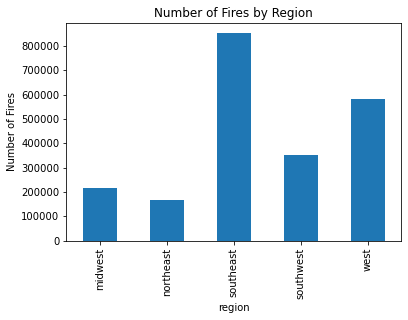

In [52]:
# view num fires by region for full dataset
fires.groupby('region').fire_size.count().plot.bar().set(title='Number of Fires by Region', ylabel='Number of Fires')

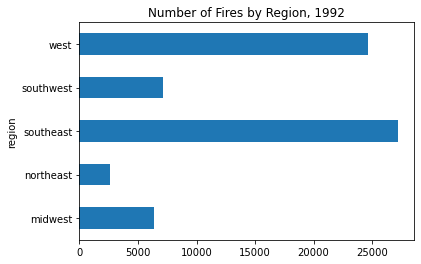

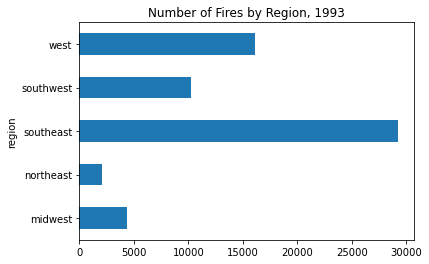

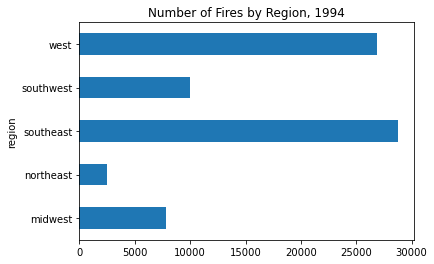

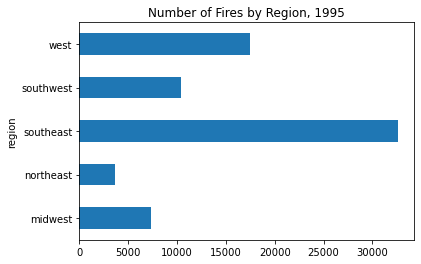

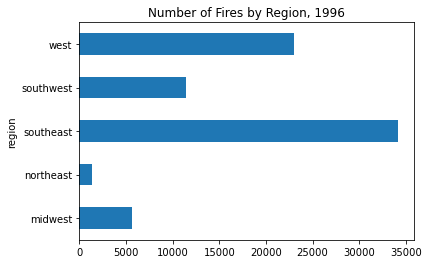

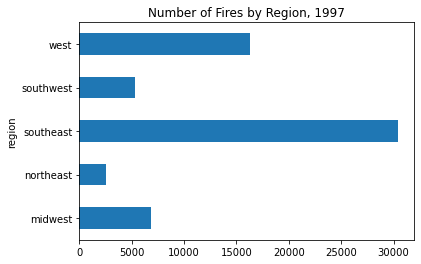

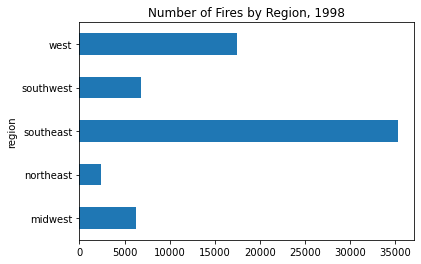

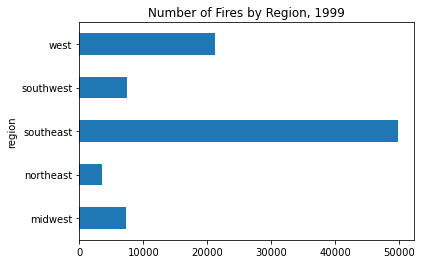

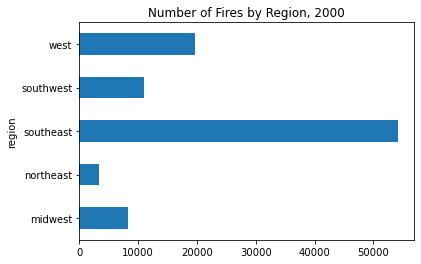

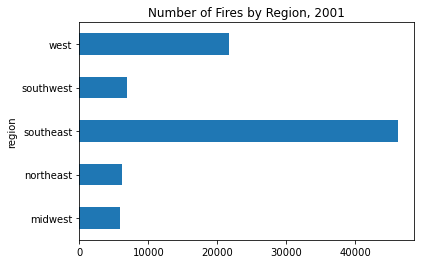

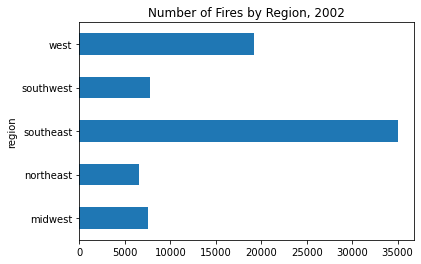

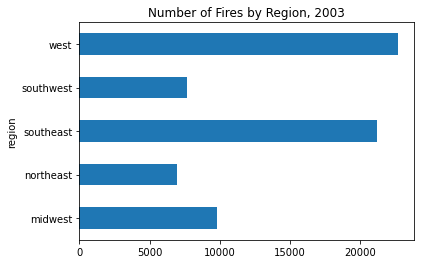

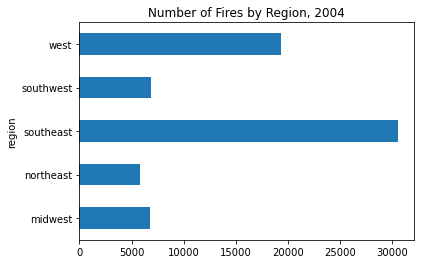

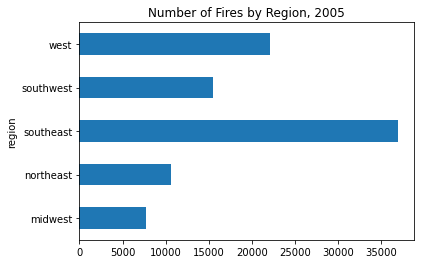

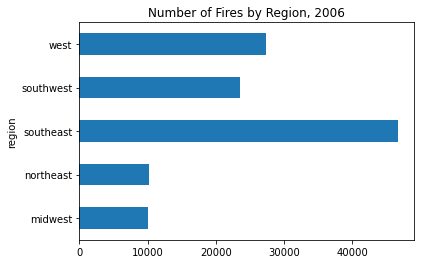

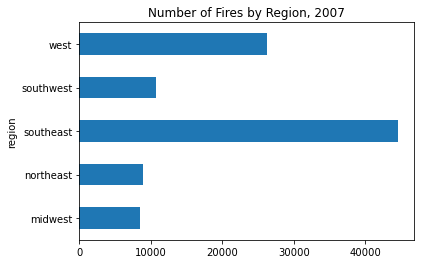

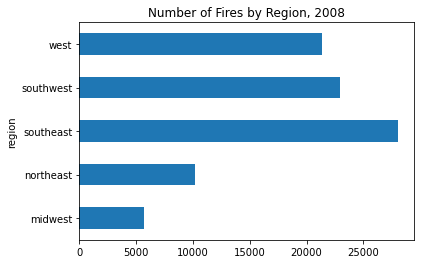

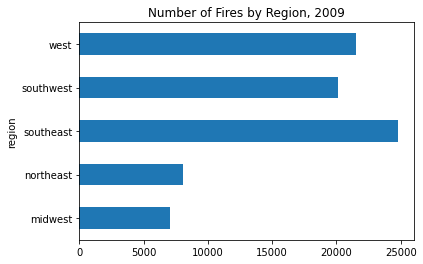

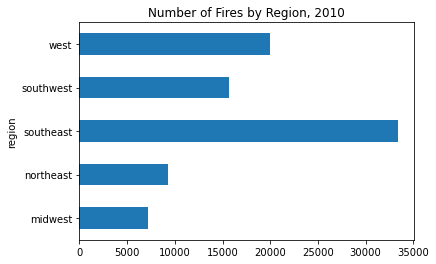

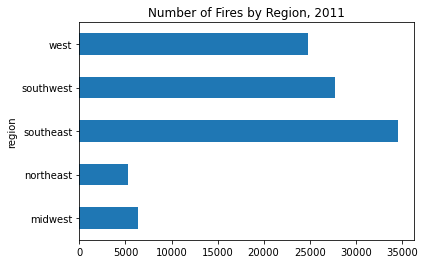

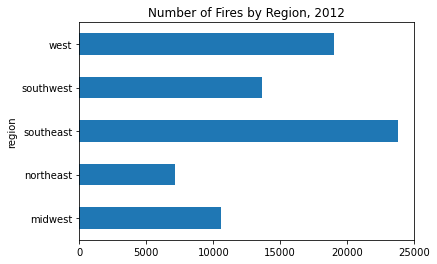

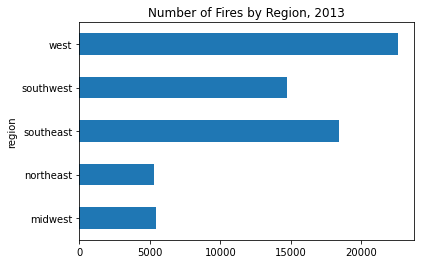

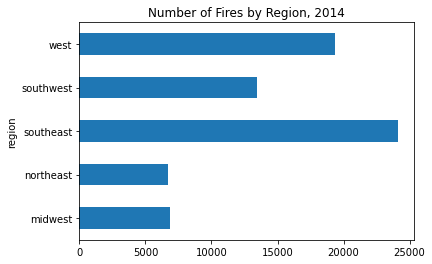

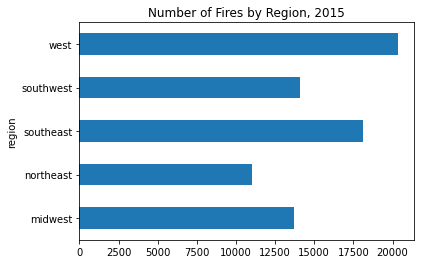

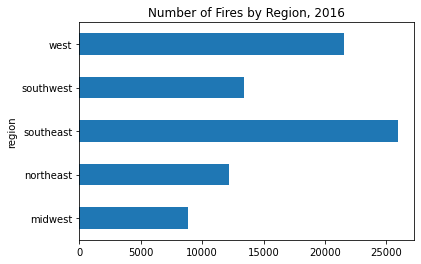

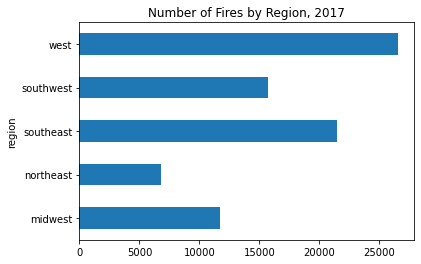

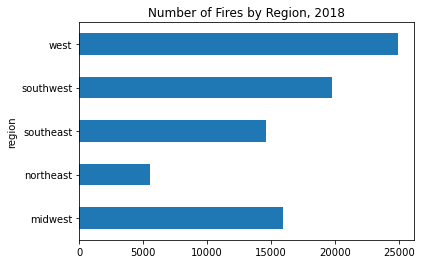

In [53]:
# plot num fires per year
for year in list(range(1992,2019)):
    fires[fires.fire_year == year].groupby('region').fire_size.count().plot.barh().set(title=f'Number of Fires by Region, {year}')
    plt.show();

[Text(0.5, 1.0, 'Mean Fire Size by Region'), Text(0.5, 0, 'acres')]

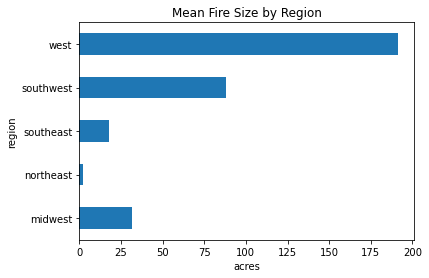

In [54]:
# view mean fire size by region for all years
fires.groupby('region').fire_size.mean().plot.barh().set(title='Mean Fire Size by Region', xlabel='acres')

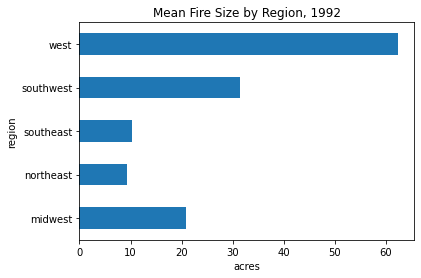

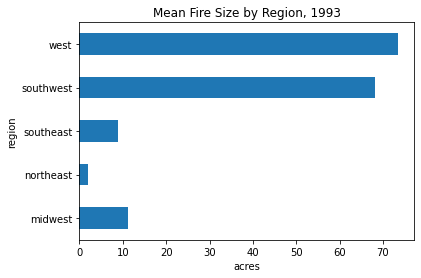

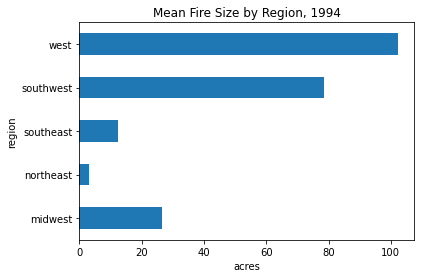

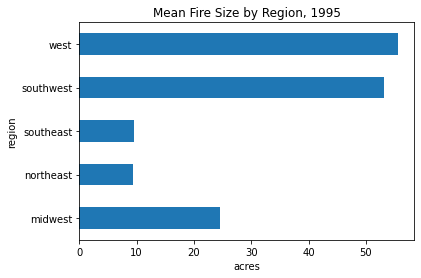

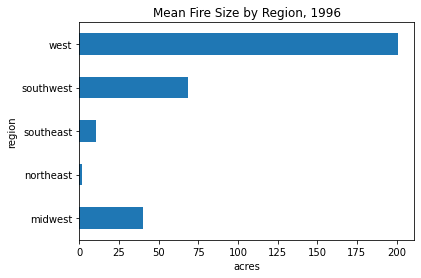

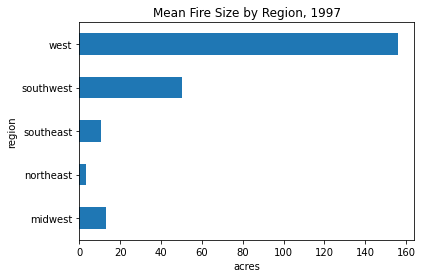

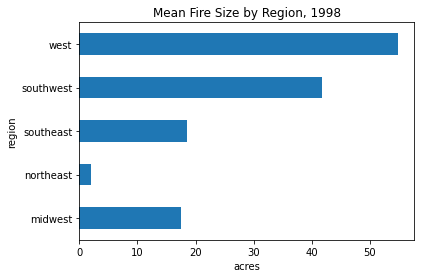

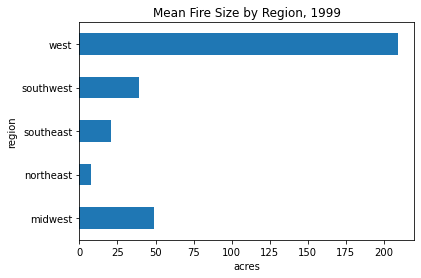

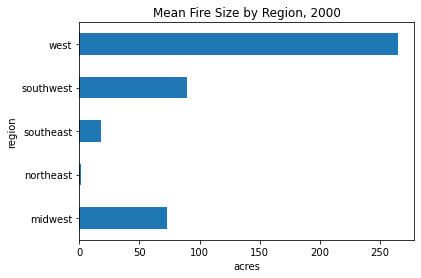

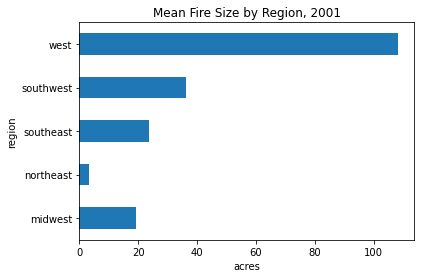

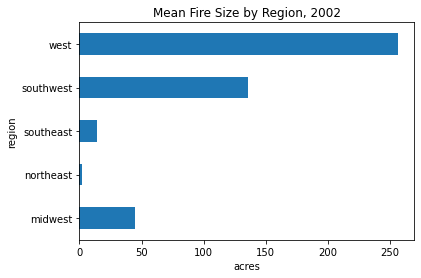

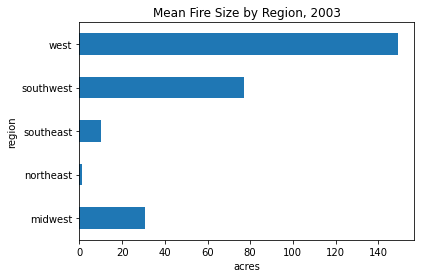

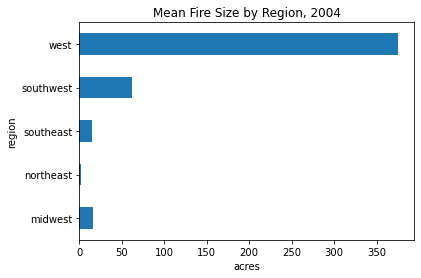

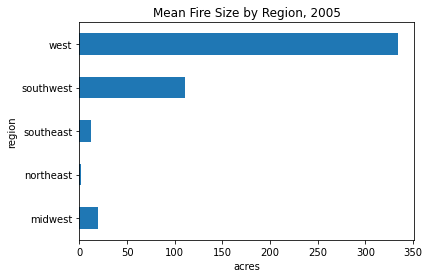

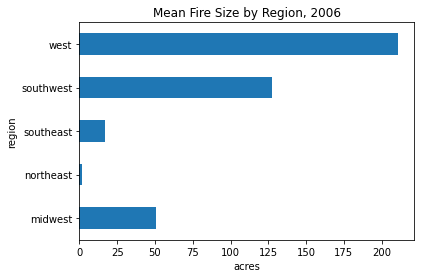

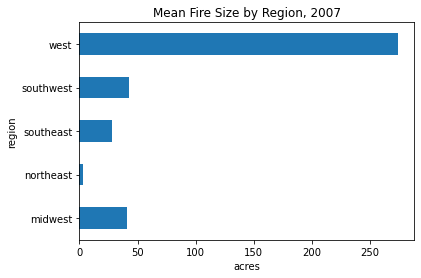

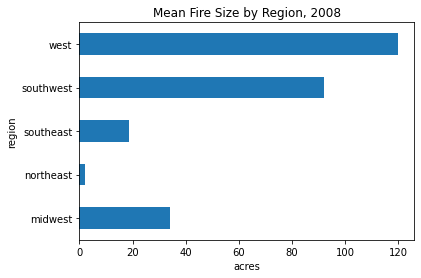

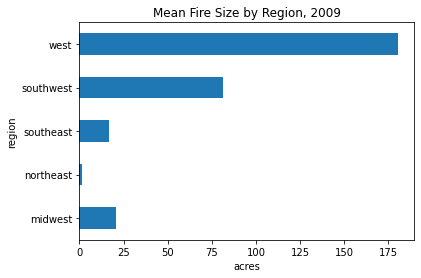

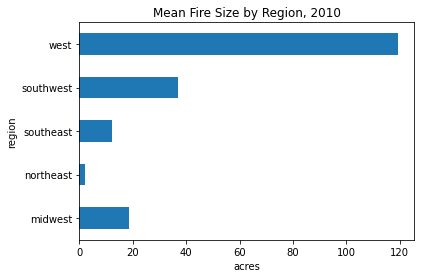

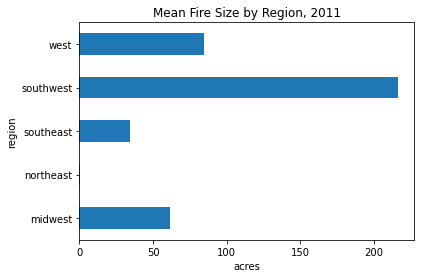

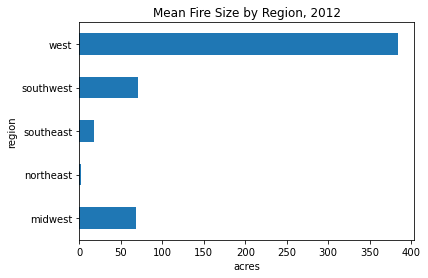

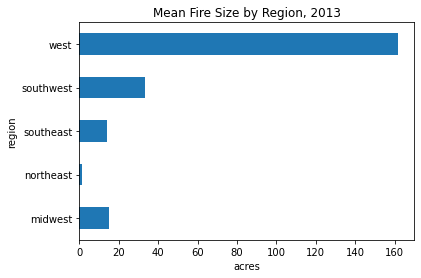

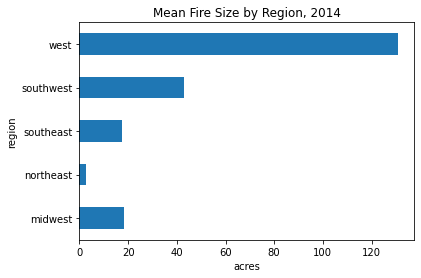

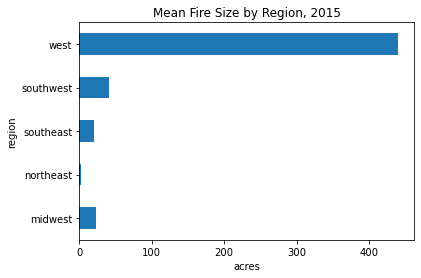

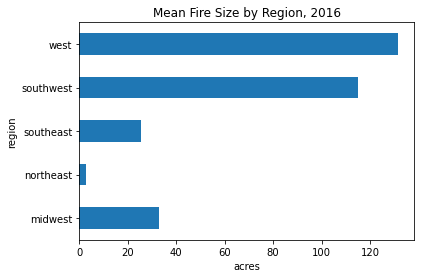

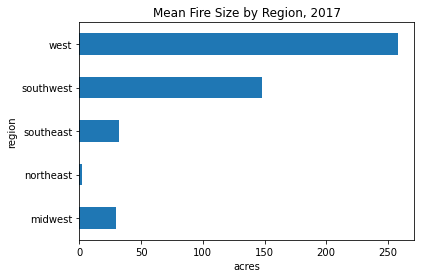

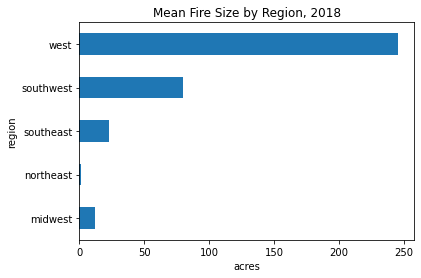

In [55]:
# view mean fire size by state for each year
for year in list(range(1992,2019)):
    fires[fires.fire_year == year].groupby('region').fire_size.mean().plot.barh().set(title=f'Mean Fire Size by Region, {year}', xlabel='acres')
    plt.show();

[Text(0.5, 1.0, 'Median Fire Size by Region'), Text(0.5, 0, 'acres')]

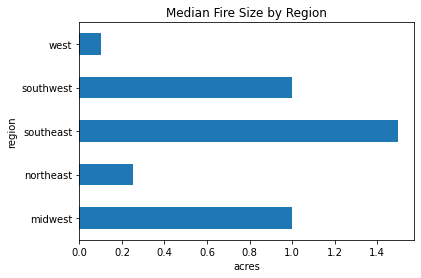

In [56]:
# view median fire size by region
fires.groupby('region').fire_size.median().plot.barh().set(title='Median Fire Size by Region', xlabel='acres')

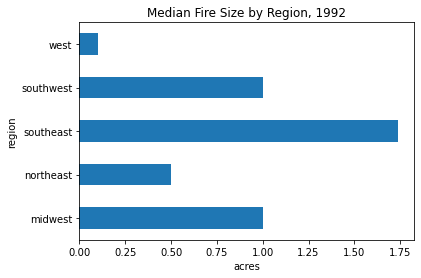

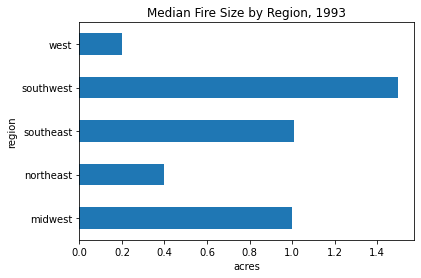

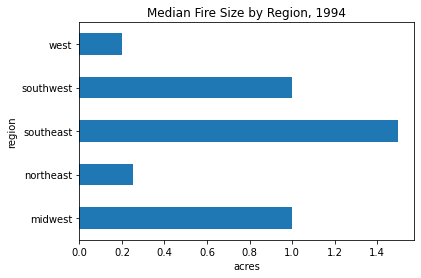

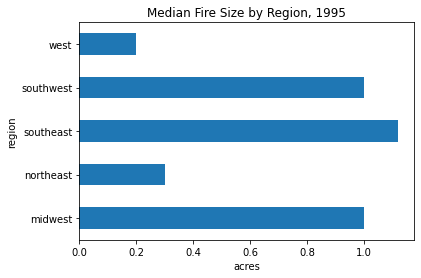

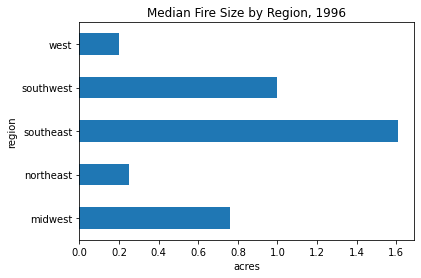

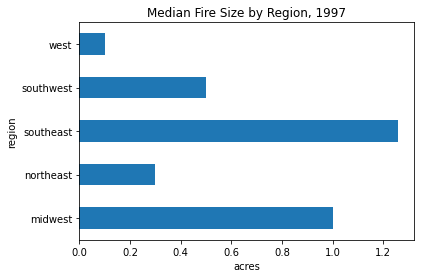

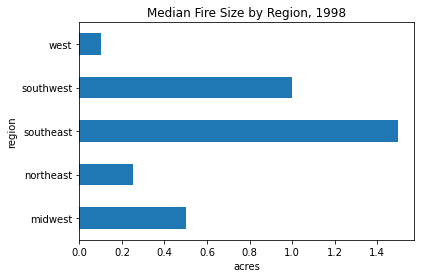

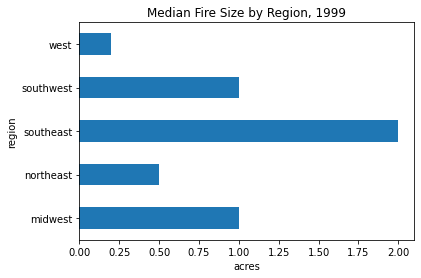

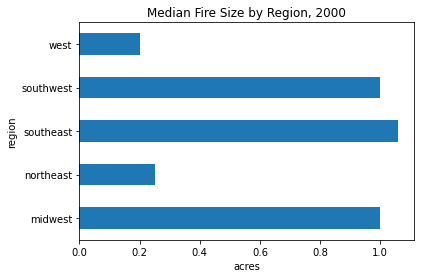

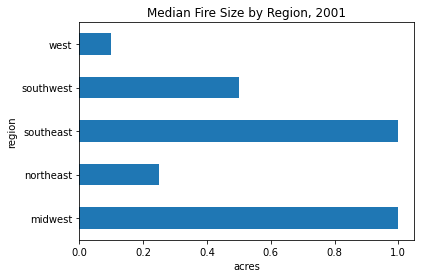

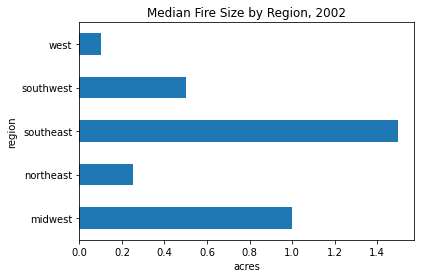

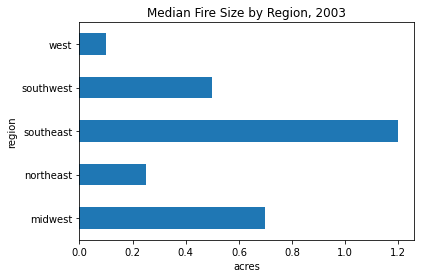

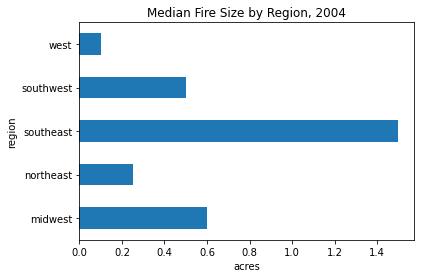

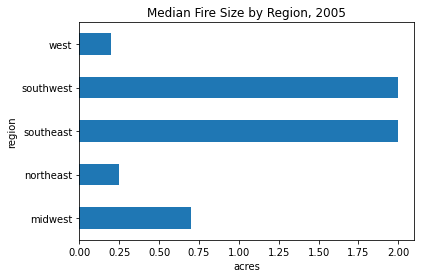

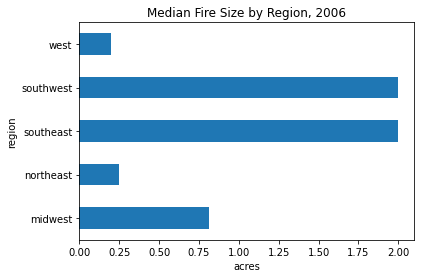

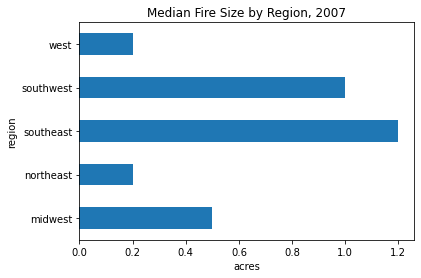

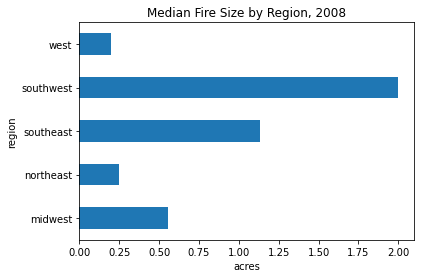

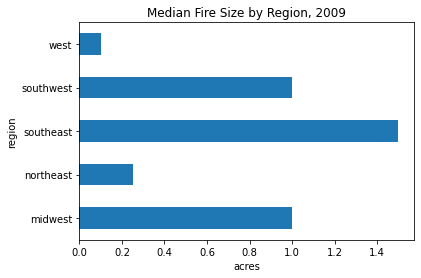

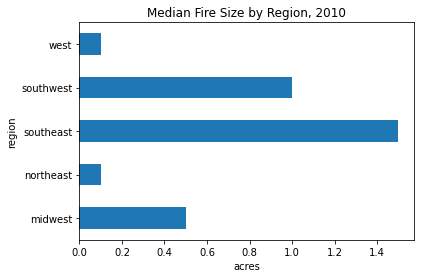

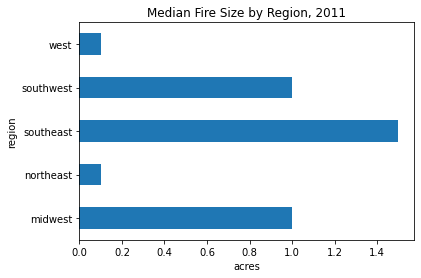

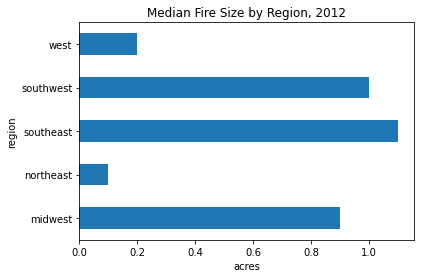

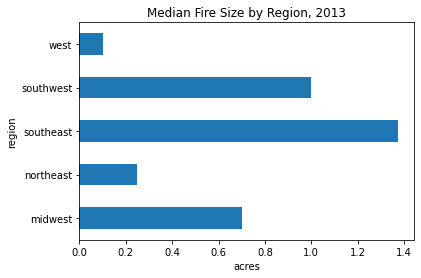

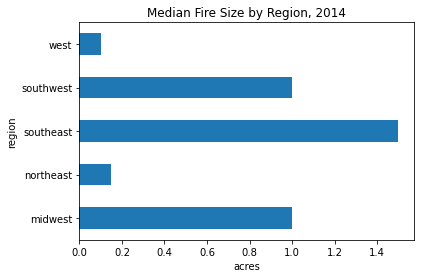

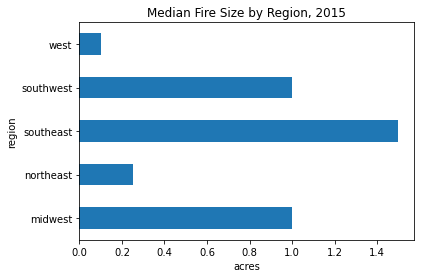

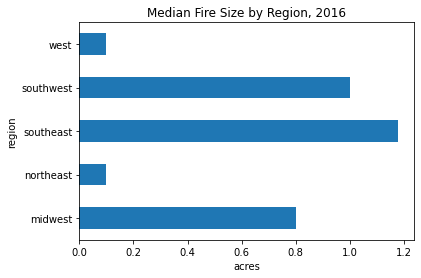

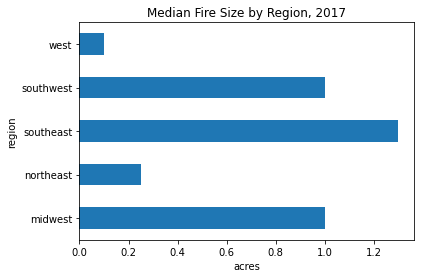

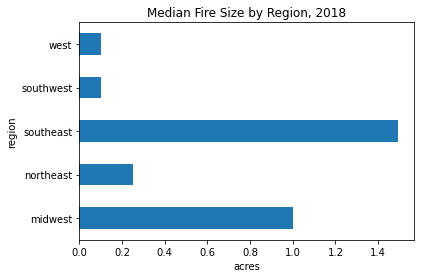

In [57]:
# view median fire size by region for each year
for year in list(range(1992,2019)):
    fires[fires.fire_year == year].groupby('region').fire_size.median().plot.barh().set(title=f'Median Fire Size by Region, {year}', xlabel='acres')
    plt.show();

In [58]:
# view median fire size by region
fires.groupby('region').fire_size.median()

region
midwest      1.00
northeast    0.25
southeast    1.50
southwest    1.00
west         0.10
Name: fire_size, dtype: float64

In [59]:
# view total fire size by region
fires.groupby('region').fire_size.sum()

region
midwest      6.770963e+06
northeast    3.913175e+05
southeast    1.496111e+07
southwest    3.072974e+07
west         1.117993e+08
Name: fire_size, dtype: float64

In [60]:
# view total acreage of land in dataset
fires.groupby('state').state_size.max().sum()

2343034000.0

In [61]:
# calculate each region's size
west_size = sum([fires[fires.state == state].state_size.max() for state in west])
southwest_size = sum([fires[fires.state == state].state_size.max() for state in southwest])
southeast_size = sum([fires[fires.state == state].state_size.max() for state in southeast])
midwest_size = sum([fires[fires.state == state].state_size.max() for state in midwest])
northeast_size = sum([fires[fires.state == state].state_size.max() for state in northeast])
sum([west_size, southwest_size, southeast_size, midwest_size, northeast_size])

2343034000.0

In [62]:
# add region_size to dataframe
fires['region_size'] = np.where(fires.region == 'west', west_size, 0)
fires['region_size'] = np.where(fires.region == 'southwest', southwest_size, fires.region_size)
fires['region_size'] = np.where(fires.region == 'midwest', midwest_size, fires.region_size)
fires['region_size'] = np.where(fires.region == 'southeast', southeast_size, fires.region_size)
fires['region_size'] = np.where(fires.region == 'northeast', northeast_size, fires.region_size)
fires

fire_year discovery_date                               general_cause  \
0             2005     2005-02-02  Power generation/transmission/distribution   
1             2004     2004-05-12                                     Natural   
2             2004     2004-05-31                     Debris and open burning   
3             2004     2004-06-28                                     Natural   
4             2004     2004-06-28                                     Natural   
...            ...            ...                                         ...   
2166748       2016     2016-10-18     Missing data/not specified/undetermined   
2166749       2016     2016-10-22     Missing data/not specified/undetermined   
2166750       2017     2017-04-02     Missing data/not specified/undetermined   
2166751       2017     2017-11-30     Missing data/not specified/undetermined   
2166752       2015     2015-07-20     Missing data/not specified/undetermined   

        containment_date  fire_size   latitude   longitude state  \
0             2005-02-02       0.10  40.036944 -121.005833    CA   
1             2004-05-12       0.25  38.933056 -120.404444    CA   
2             2004-05-31       0.10  38.984167 -120.735556    CA   
3             2004-07-03       0.10  38.559167 -119.913333    CA   
4             2004-07-03       0.10  38.559167 -119.933056    CA   
...                  ...        ...        ...         ...   ...   
2166748              NaT     125.00  36.431667  -84.421667    TN   
2166749              NaT     120.00  31.143611  -88.111944    AL   
2166750              NaT     120.00  33.920000  -85.310000    AL   
2166751              NaT     110.00  34.640000  -93.400000    AR   
2166752              NaT     109.00  34.794167  -94.958000    OK   

        size_category   state_size  pct_state_burned fire_size_class  \
0               small  101676000.0      9.835163e-08               A   
1              medium  101676000.0      2.458791e-07               A   
2               small  101676000.0      9.835163e-08               A   
3               small  101676000.0      9.835163e-08               A   
4               small  101676000.0      9.835163e-08               A   
...               ...          ...               ...             ...   
2166748      extra_lg   26973000.0      4.634264e-04               D   
2166749      extra_lg   33432000.0      3.589375e-04               D   
2166750      extra_lg   33432000.0      3.589375e-04               D   
2166751      extra_lg   34036000.0      3.231872e-04               D   
2166752      extra_lg   44738000.0      2.436408e-04               D   

                   fire_name days_uncontrolled     region   region_size  
0                   FOUNTAIN            0 days       west  1.008831e+09  
1                     PIGEON            0 days       west  1.008831e+09  
2                      SLACK            0 days       west  1.008831e+09  
3                       DEER            5 days       west  1.008831e+09  
4                   STEVENOT            5 days       west  1.008831e+09  
...                      ...               ...        ...           ...  
2166748         BUFFALO ROAD               NaT  southeast  3.670760e+08  
2166749      LITTLE CHESTANE               NaT  southeast  3.670760e+08  
2166750               CAMPER               NaT  southeast  3.670760e+08  
2166751            PENINSULA               NaT  southeast  3.670760e+08  
2166752  JOEL WEAVER (SOUTH)               NaT  southwest  3.665820e+08  

[2166753 rows x 16 columns]

In [63]:
# make sure region sizes stuck
fires.region_size.value_counts()

3.670760e+08    850926
1.008831e+09    583628
3.665820e+08    349811
4.904860e+08    215916
1.100590e+08    166472
Name: region_size, dtype: int64

In [64]:
# get sum of fire sizes for each year
year_sums = fires.groupby('fire_year').fire_size.sum()

In [65]:
# turn into dataframe
year_totals = pd.DataFrame(year_sums)
year_totals.columns = ['total_acres_burned']
year_totals

total_acres_burned
fire_year                    
1992             2.199923e+06
1993             2.191587e+06
1994             4.115582e+06
1995             2.049553e+06
1996             6.004833e+06
1997             3.231569e+06
1998             2.015942e+06
1999             6.136947e+06
2000             7.777189e+06
2001             3.836399e+06
2002             6.824144e+06
2003             4.511189e+06
2004             8.248571e+06
2005             9.710849e+06
2006             1.008283e+07
2007             9.281711e+06
2008             5.427427e+06
2009             6.094980e+06
2010             3.526451e+06
2011             9.685309e+06
2012             9.448555e+06
2013             4.494424e+06
2014             3.676997e+06
2015             1.022617e+07
2016             5.363710e+06
2017             1.024566e+07
2018             8.243921e+06

In [66]:
# get yearly total fire size for west region
west_sums = fires[fires.region == 'west'].groupby('fire_year').fire_size.sum()

In [67]:
# view west region's fire size by year
west_sums

fire_year
1992    1.540228e+06
1993    1.183043e+06
1994    2.756078e+06
1995    9.746877e+05
1996    4.629427e+06
1997    2.545911e+06
1998    9.607981e+05
1999    4.440563e+06
2000    5.232825e+06
2001    2.354595e+06
2002    4.928662e+06
2003    3.392673e+06
2004    7.247721e+06
2005    7.406962e+06
2006    5.758632e+06
2007    7.196509e+06
2008    2.564114e+06
2009    3.884869e+06
2010    2.385518e+06
2011    2.101361e+06
2012    7.315084e+06
2013    3.660502e+06
2014    2.530047e+06
2015    8.971236e+06
2016    2.837792e+06
2017    6.867269e+06
2018    6.132188e+06
Name: fire_size, dtype: float64

In [68]:
# add to dataframe
year_totals['west'] = west_sums
year_totals

total_acres_burned          west
fire_year                                  
1992             2.199923e+06  1.540228e+06
1993             2.191587e+06  1.183043e+06
1994             4.115582e+06  2.756078e+06
1995             2.049553e+06  9.746877e+05
1996             6.004833e+06  4.629427e+06
1997             3.231569e+06  2.545911e+06
1998             2.015942e+06  9.607981e+05
1999             6.136947e+06  4.440563e+06
2000             7.777189e+06  5.232825e+06
2001             3.836399e+06  2.354595e+06
2002             6.824144e+06  4.928662e+06
2003             4.511189e+06  3.392673e+06
2004             8.248571e+06  7.247721e+06
2005             9.710849e+06  7.406962e+06
2006             1.008283e+07  5.758632e+06
2007             9.281711e+06  7.196509e+06
2008             5.427427e+06  2.564114e+06
2009             6.094980e+06  3.884869e+06
2010             3.526451e+06  2.385518e+06
2011             9.685309e+06  2.101361e+06
2012             9.448555e+06  7.315084e+06
2013             4.494424e+06  3.660502e+06
2014             3.676997e+06  2.530047e+06
2015             1.022617e+07  8.971236e+06
2016             5.363710e+06  2.837792e+06
2017             1.024566e+07  6.867269e+06
2018             8.243921e+06  6.132188e+06

In [69]:
# get total fire size by year for other regions
southwest_sums = fires[fires.region == 'southwest'].groupby('fire_year').fire_size.sum()
year_totals['southwest'] = southwest_sums
midwest_sums = fires[fires.region == 'midwest'].groupby('fire_year').fire_size.sum()
year_totals['midwest'] = midwest_sums
southeast_sums = fires[fires.region == 'southeast'].groupby('fire_year').fire_size.sum()
year_totals['southeast'] = southeast_sums
northeast_sums = fires[fires.region == 'northeast'].groupby('fire_year').fire_size.sum()
year_totals['northeast'] = northeast_sums
year_totals

total_acres_burned          west     southwest        midwest  \
fire_year                                                                  
1992             2.199923e+06  1.540228e+06  2.229815e+05  132339.180000   
1993             2.191587e+06  1.183043e+06  6.944865e+05   49139.480000   
1994             4.115582e+06  2.756078e+06  7.869194e+05  206131.330000   
1995             2.049553e+06  9.746877e+05  5.528391e+05  178292.120000   
1996             6.004833e+06  4.629427e+06  7.824495e+05  225102.900000   
1997             3.231569e+06  2.545911e+06  2.667282e+05   88115.650000   
1998             2.015942e+06  9.607981e+05  2.846898e+05  109939.800010   
1999             6.136947e+06  4.440563e+06  2.880559e+05  362593.965300   
2000             7.777189e+06  5.232825e+06  9.815919e+05  601491.505000   
2001             3.836399e+06  2.354595e+06  2.502140e+05  113691.214000   
2002             6.824144e+06  4.928662e+06  1.053443e+06  336927.704000   
2003             4.511189e+06  3.392673e+06  5.901393e+05  302717.785000   
2004             8.248571e+06  7.247721e+06  4.262807e+05  110198.582000   
2005             9.710849e+06  7.406962e+06  1.708027e+06  151494.362010   
2006             1.008283e+07  5.758632e+06  2.996489e+06  510071.955000   
2007             9.281711e+06  7.196509e+06  4.506096e+05  348201.581510   
2008             5.427427e+06  2.564114e+06  2.117377e+06  194760.740200   
2009             6.094980e+06  3.884869e+06  1.634748e+06  145342.962747   
2010             3.526451e+06  2.385518e+06  5.788348e+05  135393.393600   
2011             9.685309e+06  2.101361e+06  6.005704e+06  394990.287500   
2012             9.448555e+06  7.315084e+06  9.671021e+05  727540.139000   
2013             4.494424e+06  3.660502e+06  4.903228e+05   80826.554710   
2014             3.676997e+06  2.530047e+06  5.786111e+05  125899.698200   
2015             1.022617e+07  8.971236e+06  5.662379e+05  313575.830100   
2016             5.363710e+06  2.837792e+06  1.546718e+06  290060.080500   
2017             1.024566e+07  6.867269e+06  2.324068e+06  348655.810110   
2018             8.243921e+06  6.132188e+06  1.584075e+06  187468.281100   

              southeast     northeast  
fire_year                              
1992       2.800707e+05  24303.171000  
1993       2.608428e+05   4075.213000  
1994       3.592931e+05   7160.424000  
1995       3.096700e+05  34064.218000  
1996       3.659208e+05   1933.534000  
1997       3.229030e+05   7910.990000  
1998       6.554906e+05   5024.090000  
1999       1.020375e+06  25359.480000  
2000       9.563330e+05   4947.320000  
2001       1.098487e+06  19411.890000  
2002       4.904968e+05  14615.433759  
2003       2.172410e+05   8418.545580  
2004       4.570784e+05   7292.991990  
2005       4.316365e+05  12729.627010  
2006       7.974647e+05  20168.182580  
2007       1.259297e+06  27094.216500  
2008       5.283824e+05  22793.159300  
2009       4.166257e+05  13394.296820  
2010       4.078254e+05  18878.808990  
2011       1.180048e+06   3206.160000  
2012       4.274618e+05  11366.958000  
2013       2.560721e+05   6701.468000  
2014       4.238527e+05  18587.409816  
2015       3.567566e+05  18362.989000  
2016       6.580635e+05  31077.296000  
2017       6.894076e+05  16262.325000  
2018       3.340128e+05   6177.329438

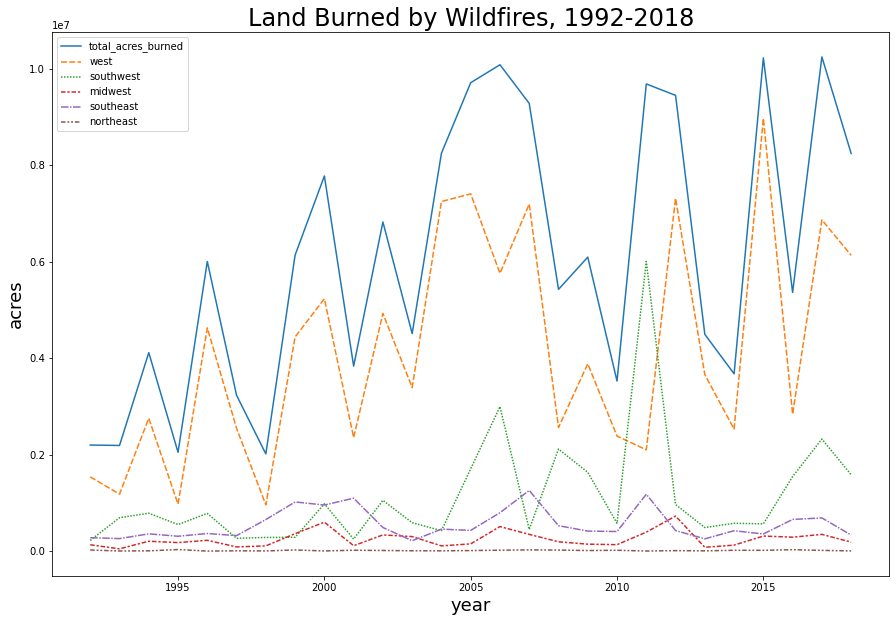

In [70]:
# plot total fire size data
plt.figure(figsize=(15,10))
sns.lineplot(data=year_totals)
plt.ylabel('acres', fontdict={'fontsize': 18})
plt.xlabel('year', fontdict={'fontsize': 18})
plt.title('Land Burned by Wildfires, 1992-2018', fontdict={'fontsize': 24});

In [71]:
# number of fires by size, region
year_fires = fires.groupby('fire_year').fire_size.count()
total_fires = pd.DataFrame(year_fires)
total_fires.columns = ['total_fires']
west_fires = fires[fires.region == 'west'].groupby('fire_year').fire_size.count()
total_fires['west'] = west_fires
southwest_fires = fires[fires.region == 'southwest'].groupby('fire_year').fire_size.count()
total_fires['southwest'] = southwest_fires
midwest_fires = fires[fires.region == 'midwest'].groupby('fire_year').fire_size.count()
total_fires['midwest'] = midwest_fires
southeast_fires = fires[fires.region == 'southeast'].groupby('fire_year').fire_size.count()
total_fires['southeast'] = southeast_fires
northeast_fires = fires[fires.region == 'northeast'].groupby('fire_year').fire_size.count()
total_fires['northeast'] = northeast_fires
total_fires

total_fires   west  southwest  midwest  southeast  northeast
fire_year                                                              
1992             67961  24668       7107     6325      27227       2634
1993             61975  16086      10198     4354      29250       2087
1994             75932  26913       9999     7781      28792       2447
1995             71440  17509      10397     7278      32645       3611
1996             75561  23016      11390     5643      34196       1316
1997             61442  16298       5310     6852      30456       2526
1998             68356  17486       6809     6267      35370       2424
1999             89350  21196       7396     7361      49905       3492
2000             96397  19708      10914     8224      54247       3304
2001             87001  21729       6942     5944      46205       6181
2002             76128  19197       7781     7504      35079       6567
2003             68275  22712       7670     9795      21181       6917
2004             69370  19305       6863     6771      30603       5828
2005             92921  22143      15439     7731      36998      10610
2006            117943  27295      23571    10101      46731      10245
2007             98837  26214      10668     8447      44589       8919
2008             88306  21380      22991     5708      28085      10142
2009             81492  21507      20089     7049      24814       8033
2010             85579  19972      15697     7232      33428       9250
2011             98904  24864      27748     6397      34621       5274
2012             74258  19032      13658    10610      23819       7139
2013             66434  22620      14689     5447      18422       5256
2014             70480  19317      13430     6859      24148       6726
2015             77275  20365      14086    13710      18084      11030
2016             81994  21556      13436     8844      25984      12174
2017             82279  26570      15728    11721      21441       6819
2018             80863  24970      19805    15961      14606       5521

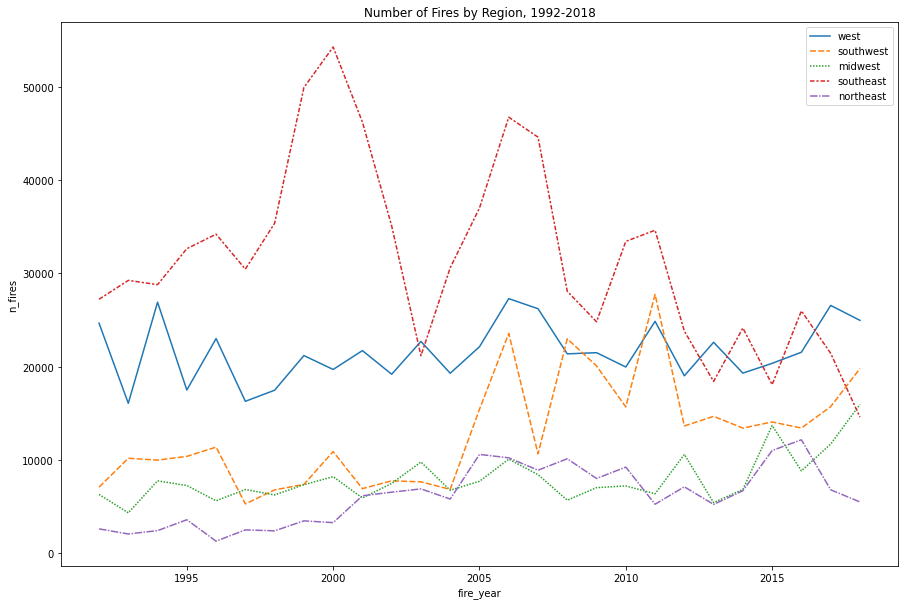

In [72]:
# plot fire occurrence data
plt.figure(figsize=(15,10))
sns.lineplot(data=total_fires.drop(columns='total_fires')).set(title='Number of Fires by Region, 1992-2018', ylabel='n_fires');

<Figure size 720x432 with 0 Axes>

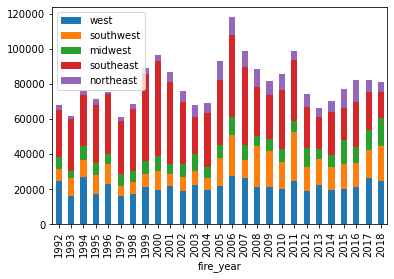

In [73]:
plt.figure(figsize=(10,6))
total_fires.drop(columns='total_fires').plot(kind='bar', stacked=True);

In [74]:
# mean fire size by year, region
year_mean = fires.groupby('fire_year').fire_size.mean()
mean_fire_size = pd.DataFrame(year_mean)
mean_fire_size.columns = ['overall_mean']
west_mean = fires[fires.region == 'west'].groupby('fire_year').fire_size.mean()
mean_fire_size['west'] = west_mean
southwest_mean = fires[fires.region == 'southwest'].groupby('fire_year').fire_size.mean()
mean_fire_size['southwest'] = southwest_mean
midwest_mean = fires[fires.region == 'midwest'].groupby('fire_year').fire_size.mean()
mean_fire_size['midwest'] = midwest_mean
southeast_mean = fires[fires.region == 'southeast'].groupby('fire_year').fire_size.mean()
mean_fire_size['southeast'] = southeast_mean
northeast_mean = fires[fires.region == 'northeast'].groupby('fire_year').fire_size.mean()
mean_fire_size['northeast'] = northeast_mean
mean_fire_size

overall_mean        west   southwest    midwest  southeast  \
fire_year                                                               
1992          32.370367   62.438302   31.374912  20.923191  10.286504   
1993          35.362437   73.544884   68.100266  11.286054   8.917702   
1994          54.200895  102.406946   78.699805  26.491624  12.478921   
1995          28.689154   55.667813   53.172947  24.497406   9.485984   
1996          79.470008  201.139490   68.696183  39.890643  10.700690   
1997          52.595440  156.210037   50.231299  12.859844  10.602278   
1998          29.491812   54.946704   41.810803  17.542652  18.532389   
1999          68.684358  209.500046   38.947531  49.258792  20.446349   
2000          80.678742  265.517809   89.938781  73.138558  17.629233   
2001          44.096034  108.361855   36.043496  19.127055  23.774208   
2002          89.640400  256.741258  135.386520  44.899747  13.982634   
2003          66.073809  149.377980   76.941238  30.905338  10.256409   
2004         118.906893  375.432301   62.112875  16.275082  14.935737   
2005         104.506505  334.505781  110.630671  19.595701  11.666482   
2006          85.488965  210.977525  127.126070  50.497174  17.065004   
2007          93.909279  274.529206   42.239366  41.221923  28.242333   
2008          61.461589  119.930472   92.095919  34.120662  18.813688   
2009          74.792368  180.632770   81.375269  20.618948  16.789944   
2010          41.206965  119.443144   36.875505  18.721432  12.200112   
2011          97.926363   84.514212  216.437350  61.746176  34.084734   
2012         127.239553  384.357072   70.808470  68.571172  17.946252   
2013          67.652474  161.825887   33.380273  14.838729  13.900339   
2014          52.170793  130.975131   43.083474  18.355401  17.552290   
2015         132.334765  440.522249   40.198633  22.872052  19.727748   
2016          65.415886  131.647416  115.117417  32.797386  25.325719   
2017         124.523429  258.459521  147.766280  29.746251  32.153704   
2018         101.949238  245.582199   79.983606  11.745397  22.868190   

           northeast  
fire_year             
1992        9.226716  
1993        1.952666  
1994        2.926205  
1995        9.433458  
1996        1.469251  
1997        3.131825  
1998        2.072644  
1999        7.262165  
2000        1.497373  
2001        3.140574  
2002        2.225588  
2003        1.217080  
2004        1.251371  
2005        1.199776  
2006        1.968588  
2007        3.037809  
2008        2.247403  
2009        1.667409  
2010        2.040952  
2011        0.607918  
2012        1.592234  
2013        1.275013  
2014        2.763516  
2015        1.664822  
2016        2.552760  
2017        2.384855  
2018        1.118879

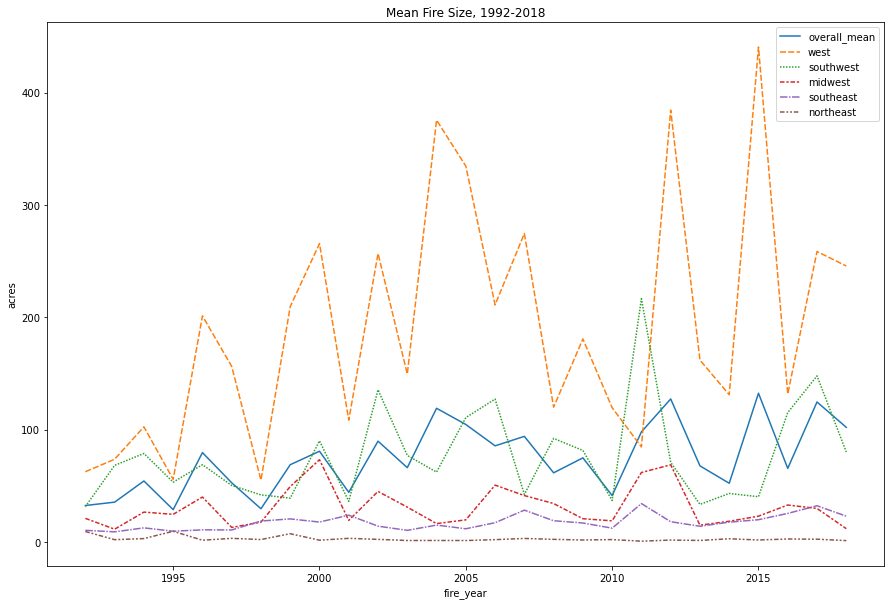

In [75]:
# plot mean data
plt.figure(figsize=(15,10))
sns.lineplot(data=mean_fire_size).set(title='Mean Fire Size, 1992-2018', ylabel='acres');

In [76]:
# median fire size by year, region
year_median = fires.groupby('fire_year').fire_size.median()
median_fire_size = pd.DataFrame(year_median)
median_fire_size.columns = ['overall_median']
west_median = fires[fires.region == 'west'].groupby('fire_year').fire_size.median()
median_fire_size['west'] = west_median
southwest_median = fires[fires.region == 'southwest'].groupby('fire_year').fire_size.median()
median_fire_size['southwest'] = southwest_median
midwest_median = fires[fires.region == 'midwest'].groupby('fire_year').fire_size.median()
median_fire_size['midwest'] = midwest_median
southeast_median = fires[fires.region == 'southeast'].groupby('fire_year').fire_size.median()
median_fire_size['southeast'] = southeast_median
northeast_median = fires[fires.region == 'northeast'].groupby('fire_year').fire_size.median()
median_fire_size['northeast'] = northeast_median
median_fire_size

overall_median  west  southwest  midwest  southeast  northeast
fire_year                                                                
1992                 1.00   0.1        1.0    1.000      1.740       0.50
1993                 1.00   0.2        1.5    1.000      1.010       0.40
1994                 0.90   0.2        1.0    1.000      1.500       0.25
1995                 1.00   0.2        1.0    1.000      1.120       0.30
1996                 1.00   0.2        1.0    0.760      1.610       0.25
1997                 1.00   0.1        0.5    1.000      1.260       0.30
1998                 1.00   0.1        1.0    0.500      1.500       0.25
1999                 1.00   0.2        1.0    1.000      2.000       0.50
2000                 1.00   0.2        1.0    1.000      1.060       0.25
2001                 0.78   0.1        0.5    1.000      1.000       0.25
2002                 0.75   0.1        0.5    1.000      1.500       0.25
2003                 0.50   0.1        0.5    0.700      1.200       0.25
2004                 0.50   0.1        0.5    0.600      1.500       0.25
2005                 1.00   0.2        2.0    0.700      2.000       0.25
2006                 1.00   0.2        2.0    0.810      2.000       0.25
2007                 1.00   0.2        1.0    0.500      1.200       0.20
2008                 1.00   0.2        2.0    0.555      1.130       0.25
2009                 1.00   0.1        1.0    1.000      1.500       0.25
2010                 0.90   0.1        1.0    0.500      1.500       0.10
2011                 1.00   0.1        1.0    1.000      1.500       0.10
2012                 0.70   0.2        1.0    0.900      1.100       0.10
2013                 0.50   0.1        1.0    0.700      1.375       0.25
2014                 0.50   0.1        1.0    1.000      1.500       0.15
2015                 0.50   0.1        1.0    1.000      1.500       0.25
2016                 0.50   0.1        1.0    0.800      1.180       0.10
2017                 0.50   0.1        1.0    1.000      1.300       0.25
2018                 0.27   0.1        0.1    1.000      1.495       0.25

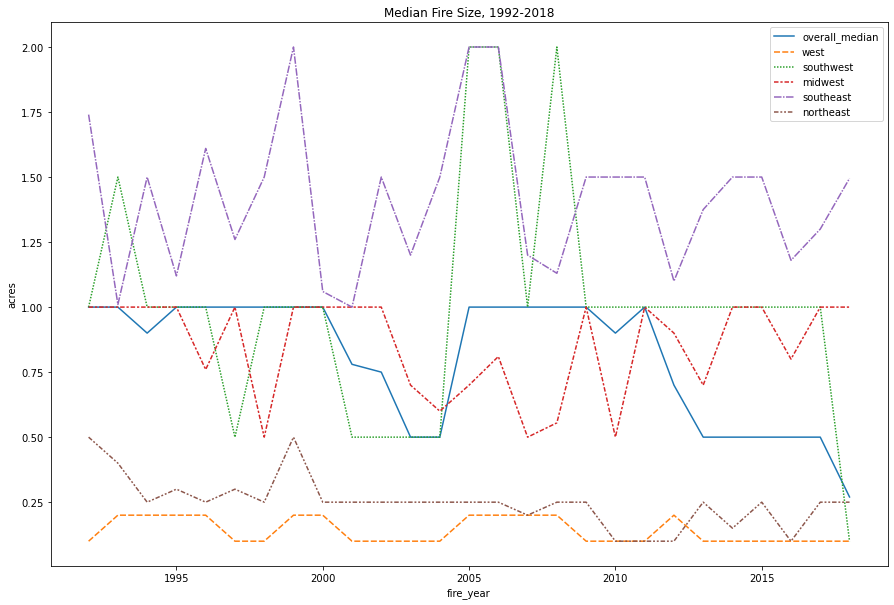

In [77]:
# plot median data
plt.figure(figsize=(15,10))
sns.lineplot(data=median_fire_size).set(title='Median Fire Size, 1992-2018', ylabel='acres');

In [78]:
fires.head()

fire_year discovery_date                               general_cause  \
0       2005     2005-02-02  Power generation/transmission/distribution   
1       2004     2004-05-12                                     Natural   
2       2004     2004-05-31                     Debris and open burning   
3       2004     2004-06-28                                     Natural   
4       2004     2004-06-28                                     Natural   

  containment_date  fire_size   latitude   longitude state size_category  \
0       2005-02-02       0.10  40.036944 -121.005833    CA         small   
1       2004-05-12       0.25  38.933056 -120.404444    CA        medium   
2       2004-05-31       0.10  38.984167 -120.735556    CA         small   
3       2004-07-03       0.10  38.559167 -119.913333    CA         small   
4       2004-07-03       0.10  38.559167 -119.933056    CA         small   

    state_size  pct_state_burned fire_size_class fire_name days_uncontrolled  \
0  101676000.0      9.835163e-08               A  FOUNTAIN            0 days   
1  101676000.0      2.458791e-07               A    PIGEON            0 days   
2  101676000.0      9.835163e-08               A     SLACK            0 days   
3  101676000.0      9.835163e-08               A      DEER            5 days   
4  101676000.0      9.835163e-08               A  STEVENOT            5 days   

  region   region_size  
0   west  1.008831e+09  
1   west  1.008831e+09  
2   west  1.008831e+09  
3   west  1.008831e+09  
4   west  1.008831e+09

<AxesSubplot:>

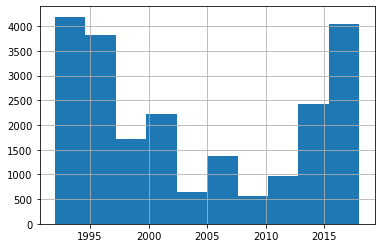

In [79]:
fires[fires.state == 'MO'].fire_year.hist()

CA


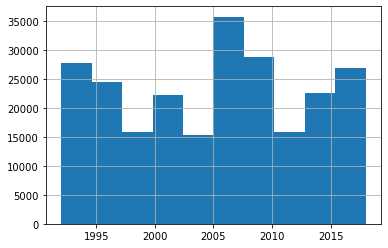

GA


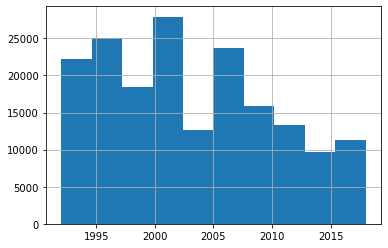

TX


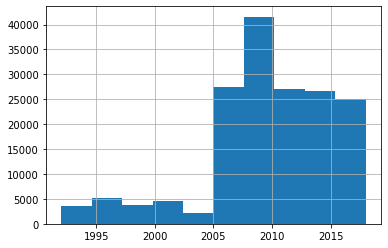

NC


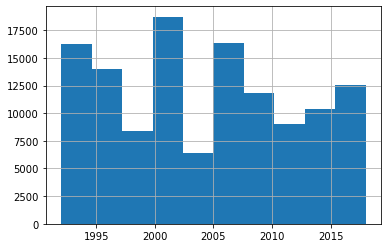

FL


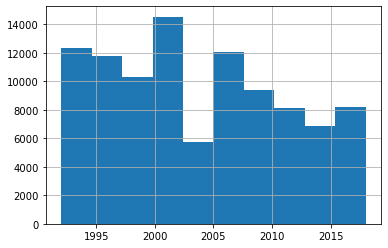

AZ


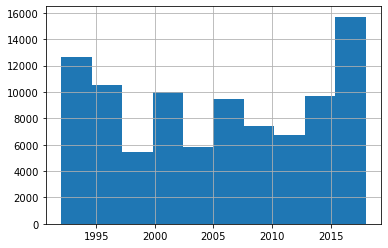

NY


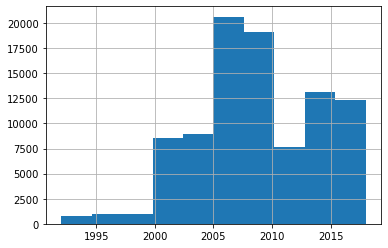

SC


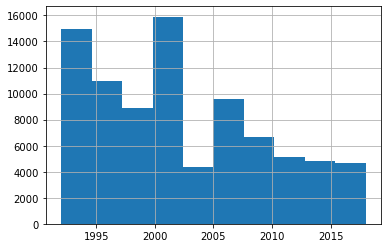

MS


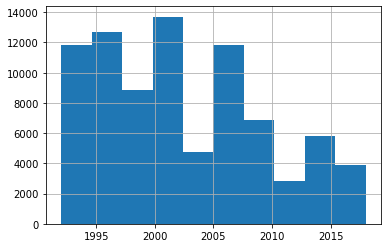

AL


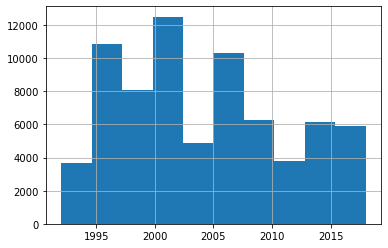

OR


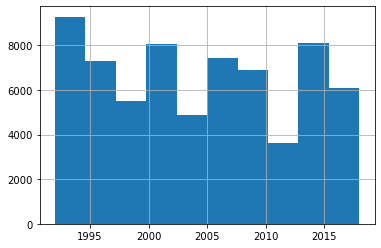

CO


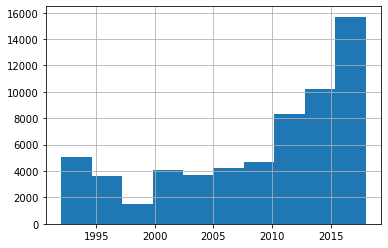

MN


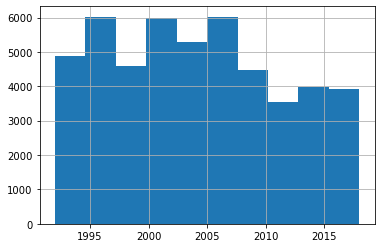

OK


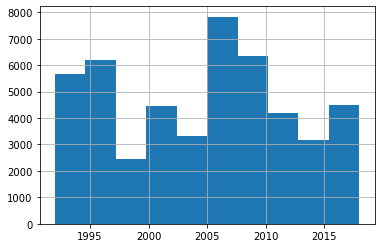

MT


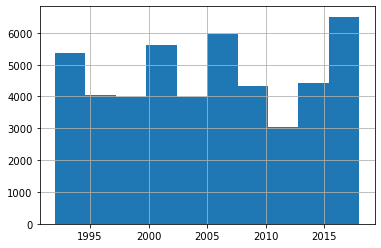

NM


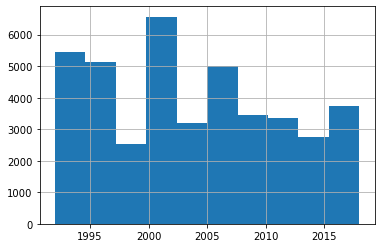

ID


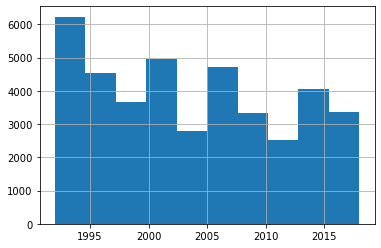

WA


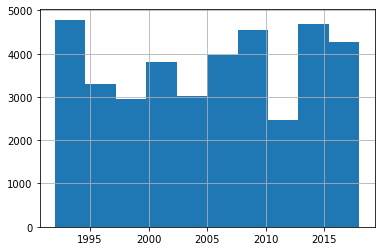

AR


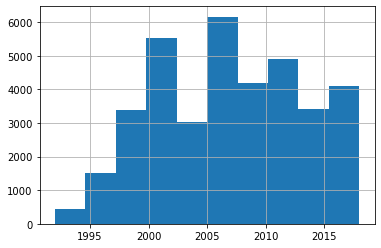

WI


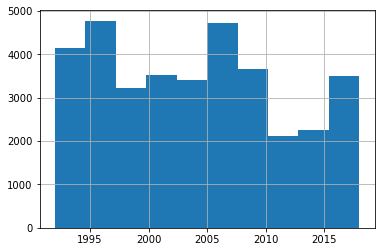

SD


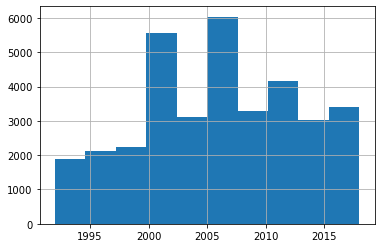

UT


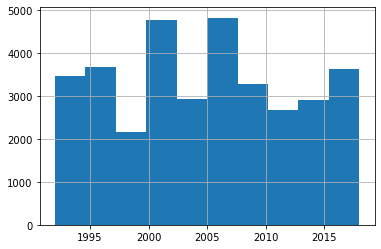

TN


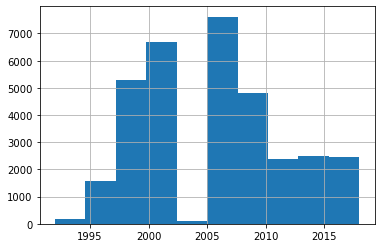

LA


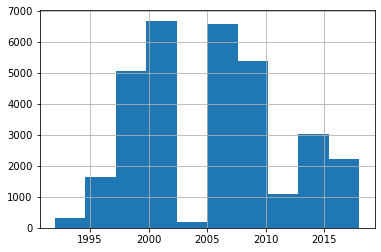

NJ


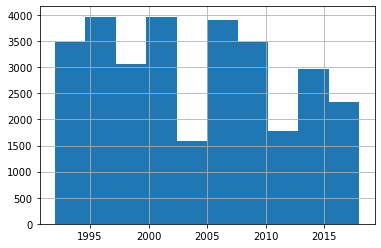

KY


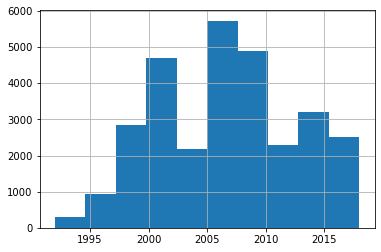

VA


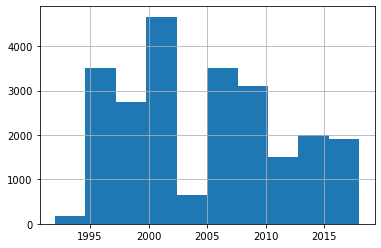

WV


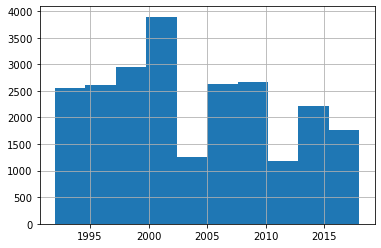

PR


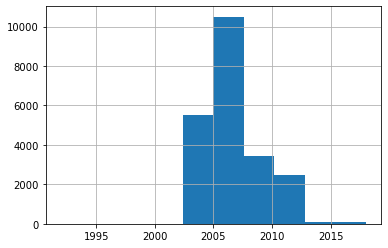

MO


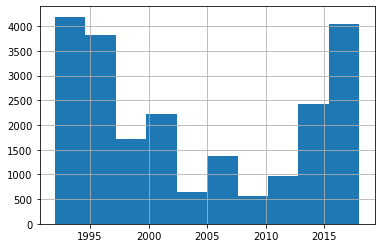

NV


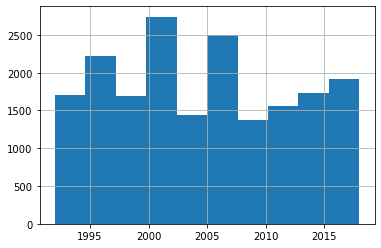

ND


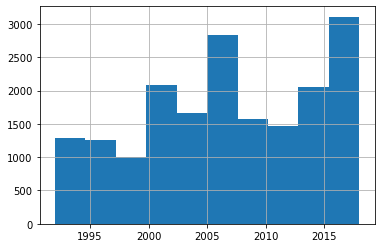

WY


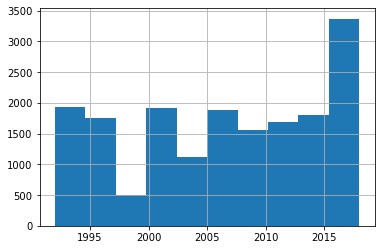

KS


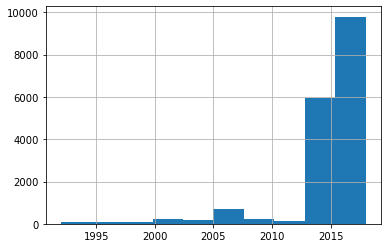

ME


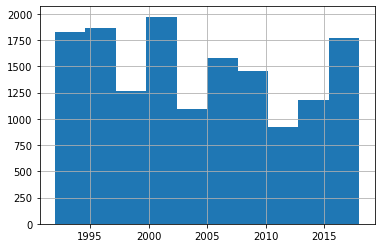

MI


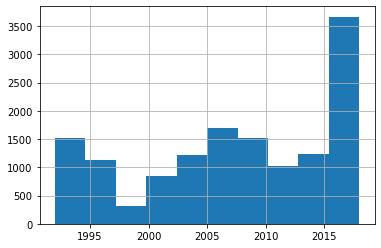

AK


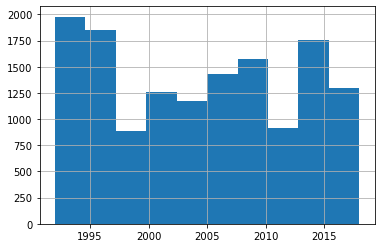

PA


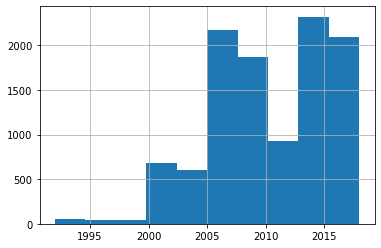

NE


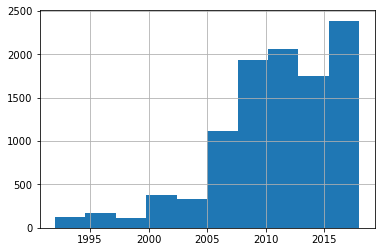

HI


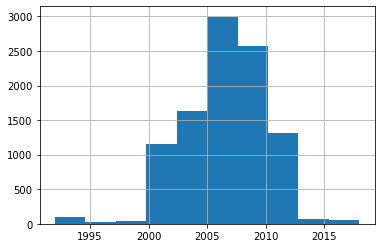

MA


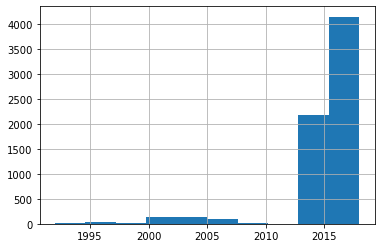

CT


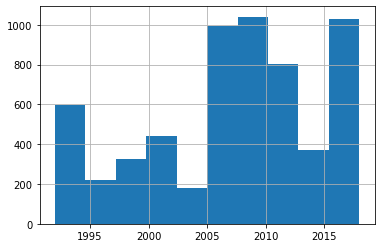

IA


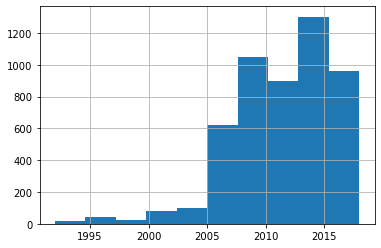

OH


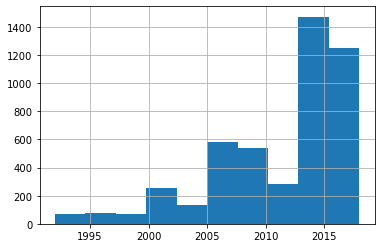

MD


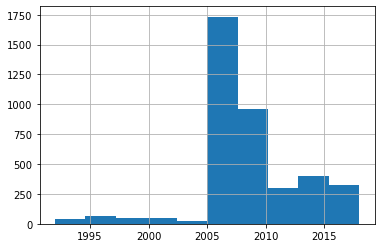

NH


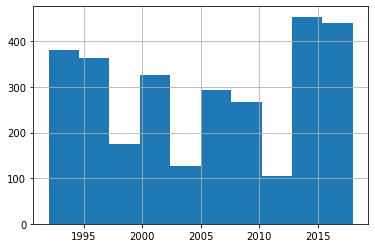

IL


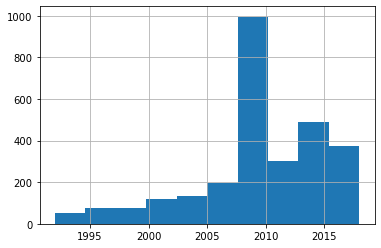

IN


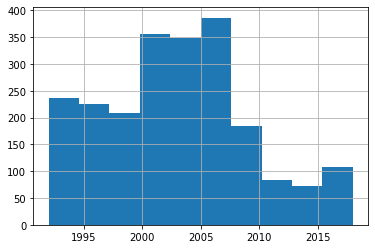

VT


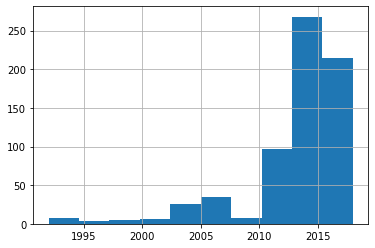

RI


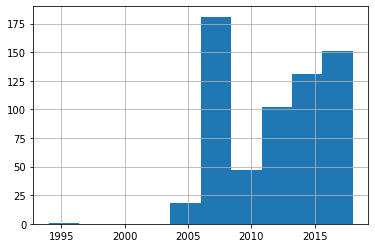

DE


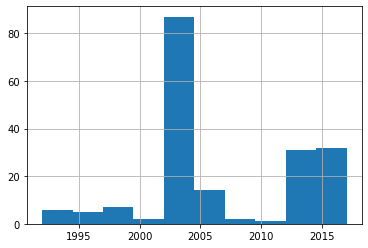

DC


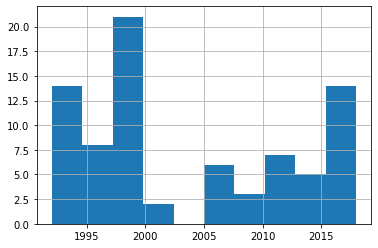

In [80]:
for state in list(fires.state.value_counts().index):
    print(state)
    fires[fires.state == state].fire_year.hist()
    plt.show();

<AxesSubplot:>

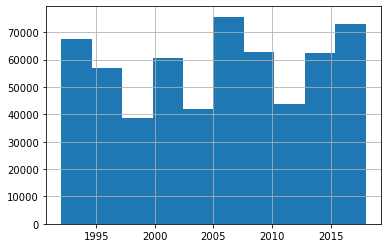

In [81]:
fires[fires.region == 'west'].fire_year.hist()

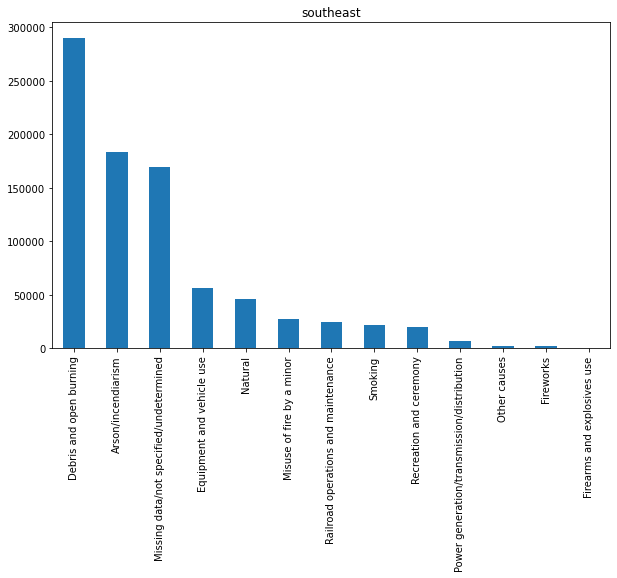

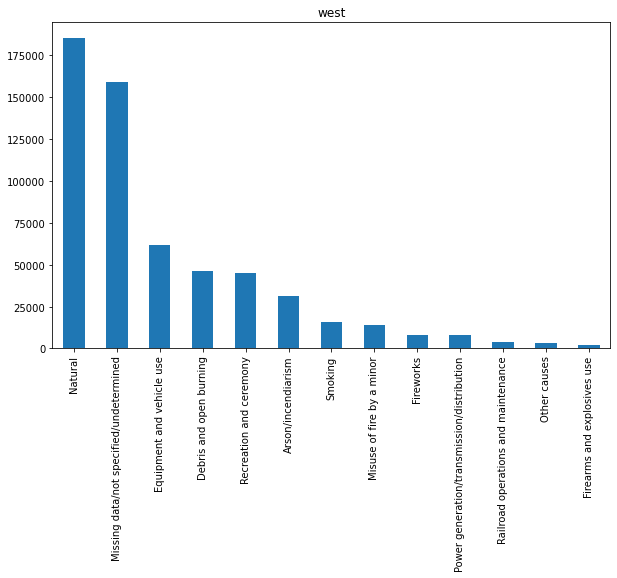

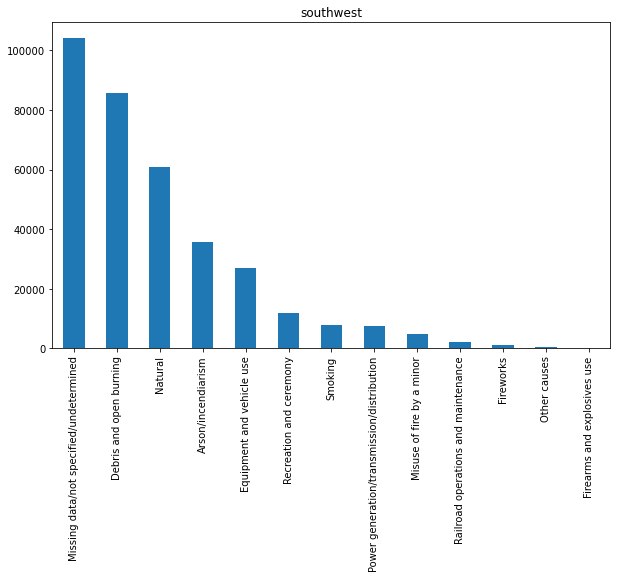

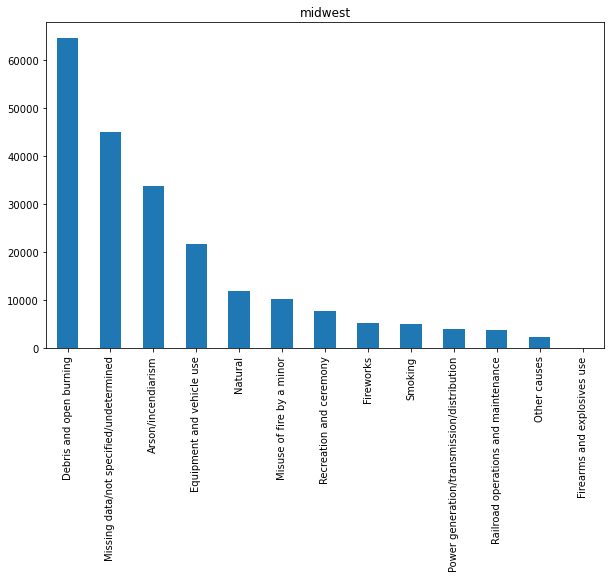

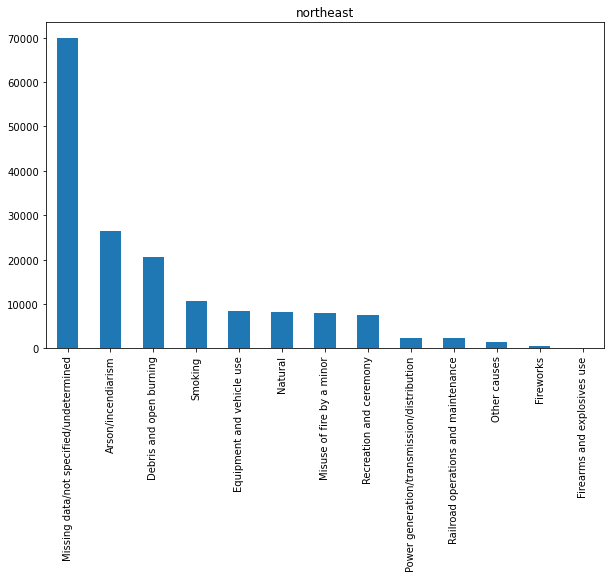

In [82]:
for region in fires.region.value_counts().index:
    plt.figure(figsize=(10,6))
    fires[fires.region == region].general_cause.value_counts().plot.bar().set(title=region)
    plt.show();

### Most common wildfire causes by region:
- Southeast: Debris/open burning
- West: Natural
- Southwest: (Missing) Debris/open burning
- Midwest: Debris/open burning
- Northeast: (Missing) Arson

In [83]:
regions = fires.region.value_counts().index
for region in regions:
    print(f'Median {region.capitalize()} Fire Size: {fires[fires.region == region].fire_size.median()} acres')
    print()

Median Southeast Fire Size: 1.5 acres

Median West Fire Size: 0.1 acres

Median Southwest Fire Size: 1.0 acres

Median Midwest Fire Size: 1.0 acres

Median Northeast Fire Size: 0.25 acres



In [84]:
# print avg yearly fires by region
fires.fire_year.nunique()

27

In [85]:
round(fires[fires.region == 'west'].fire_size.count()/fires[fires.region == 'west'].fire_year.nunique())

21616

In [86]:
for reg in regions:
    print(f'Average Number of Fires per Year in {reg.capitalize()} Region: {round(fires[fires.region == reg].fire_size.count()/fires[fires.region == reg].fire_year.nunique())}')
    print()

Average Number of Fires per Year in Southeast Region: 31516

Average Number of Fires per Year in West Region: 21616

Average Number of Fires per Year in Southwest Region: 12956

Average Number of Fires per Year in Midwest Region: 7997

Average Number of Fires per Year in Northeast Region: 6166



<AxesSubplot:>

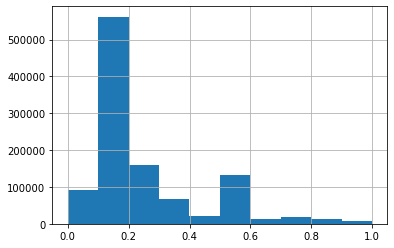

In [87]:
fires[fires.fire_size < 1].fire_size.hist()

In [88]:
fires[fires.fire_size < 2]

fire_year discovery_date                               general_cause  \
0             2005     2005-02-02  Power generation/transmission/distribution   
1             2004     2004-05-12                                     Natural   
2             2004     2004-05-31                     Debris and open burning   
3             2004     2004-06-28                                     Natural   
4             2004     2004-06-28                                     Natural   
...            ...            ...                                         ...   
2166694       2018     2018-11-17     Missing data/not specified/undetermined   
2166695       2018     2018-12-12     Missing data/not specified/undetermined   
2166696       2018     2018-04-16                     Debris and open burning   
2166697       2018     2018-04-23     Missing data/not specified/undetermined   
2166698       2018     2018-11-09                     Debris and open burning   

        containment_date  fire_size   latitude   longitude state  \
0             2005-02-02       0.10  40.036944 -121.005833    CA   
1             2004-05-12       0.25  38.933056 -120.404444    CA   
2             2004-05-31       0.10  38.984167 -120.735556    CA   
3             2004-07-03       0.10  38.559167 -119.913333    CA   
4             2004-07-03       0.10  38.559167 -119.933056    CA   
...                  ...        ...        ...         ...   ...   
2166694       2018-11-17       0.10  41.885375  -72.261468    CT   
2166695       2018-12-12       0.10  41.985374  -72.446195    CT   
2166696       2018-04-16       0.10  41.459430  -72.662758    CT   
2166697       2018-04-23       0.10  41.435494  -72.359669    CT   
2166698       2018-11-09       0.20  41.481765  -72.681206    CT   

        size_category   state_size  pct_state_burned fire_size_class  \
0               small  101676000.0      9.835163e-08               A   
1              medium  101676000.0      2.458791e-07               A   
2               small  101676000.0      9.835163e-08               A   
3               small  101676000.0      9.835163e-08               A   
4               small  101676000.0      9.835163e-08               A   
...               ...          ...               ...             ...   
2166694         small    3548000.0      2.818489e-06               A   
2166695         small    3548000.0      2.818489e-06               A   
2166696         small    3548000.0      2.818489e-06               A   
2166697         small    3548000.0      2.818489e-06               A   
2166698        medium    3548000.0      5.636979e-06               A   

                           fire_name days_uncontrolled     region  \
0                           FOUNTAIN            0 days       west   
1                             PIGEON            0 days       west   
2                              SLACK            0 days       west   
3                               DEER            5 days       west   
4                           STEVENOT            5 days       west   
...                              ...               ...        ...   
2166694        TURNPIKE RD/BALAZS RD            0 days  northeast   
2166695             21 PLYMOUTH ROAD            0 days  northeast   
2166696          257 STAGECOACH ROAD            0 days  northeast   
2166697  KINGS HWY AND GOOSE HILL RD            0 days  northeast   
2166698                36 GREEN LANE            0 days  northeast   

          region_size  
0        1.008831e+09  
1        1.008831e+09  
2        1.008831e+09  
3        1.008831e+09  
4        1.008831e+09  
...               ...  
2166694  1.100590e+08  
2166695  1.100590e+08  
2166696  1.100590e+08  
2166697  1.100590e+08  
2166698  1.100590e+08  

[1415651 rows x 16 columns]

In [89]:
fires.shape

(2166753, 16)

In [90]:
fires.days_uncontrolled.value_counts().sort_index()

0 days        1093867
1 days         122270
2 days          29909
3 days          14951
4 days           8454
               ...   
29947 days          2
32871 days          2
32872 days          1
36156 days          1
36159 days          1
Name: days_uncontrolled, Length: 367, dtype: int64

In [92]:
fires.fire_size.mean()

75.99039753388456

In [93]:
fires.fire_size.median()

0.97

In [100]:
fires.fire_size.max()

662700.0

<AxesSubplot:>

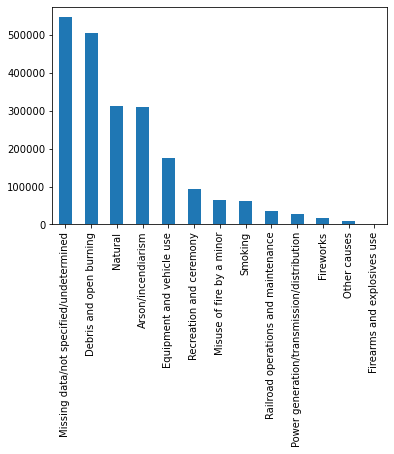

In [95]:
fires.general_cause.value_counts().plot.bar()

In [98]:
fires.days_uncontrolled.mean()

Timedelta('1 days 08:03:07.614428596')

In [99]:
fires.days_uncontrolled.median()

Timedelta('0 days 00:00:00')

In [108]:
fires[fires.containment_date <= '2018-12-31'].days_uncontrolled.idxmax()

1145274

In [109]:
fires[fires.index == 1145274]

fire_year discovery_date            general_cause containment_date  \
1145274       1998     1998-09-12  Recreation and ceremony       2009-09-12   

         fire_size  latitude  longitude state size_category  state_size  \
1145274       0.01  44.32935 -122.92779    OR         small  62140000.0   

         pct_state_burned fire_size_class     fire_name days_uncontrolled  \
1145274      1.609269e-08               A  TIMBER RD #2         4018 days   

        region   region_size  
1145274   west  1.008831e+09

In [111]:
og_fire_df[og_fire_df.index == 1145274]

FOD_ID     FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
1145274  1396947  ODF-18771             NONFED      ST-ORORS   

        NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID NWCG_REPORTING_UNIT_NAME  \
1145274                ST/C&L               USOR772S    Sweet Home Unit - ODF   

        SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME LOCAL_FIRE_REPORT_ID  \
1145274             ORODF-772            Sweet Home Unit                   63   

        LOCAL_INCIDENT_ID FIRE_CODE     FIRE_NAME  \
1145274             18771       NaN  TIMBER RD #2   

        ICS_209_PLUS_INCIDENT_JOIN_ID ICS_209_PLUS_COMPLEX_JOIN_ID MTBS_ID  \
1145274                           NaN                          NaN     NaN   

        MTBS_FIRE_NAME COMPLEX_NAME  FIRE_YEAR  DISCOVERY_DATE  DISCOVERY_DOY  \
1145274            NaN          NaN       1998  9/12/1998 0:00            255   

         DISCOVERY_TIME NWCG_CAUSE_CLASSIFICATION       NWCG_GENERAL_CAUSE  \
1145274             NaN                     Human  Recreation and ceremony   

        NWCG_CAUSE_AGE_CATEGORY       CONT_DATE  CONT_DOY  CONT_TIME  \
1145274                     NaN  9/12/2009 0:00     255.0        NaN   

         FIRE_SIZE FIRE_SIZE_CLASS  LATITUDE  LONGITUDE OWNER_DESCR STATE  \
1145274       0.01               A  44.32935 -122.92779         BLM    OR   

        COUNTY  FIPS_CODE    FIPS_NAME  
1145274     22    41043.0  Linn County

In [119]:
tx_fires = fires[fires.state == 'TX']
known_tx_fires = tx_fires[tx_fires.general_cause != 'Missing data/not specified/undetermined']
human_tx_fires = known_tx_fires[known_tx_fires.general_cause != 'Natural']
human_tx_fires[human_tx_fires.fire_size == human_tx_fires.fire_size.max()]

fire_year discovery_date              general_cause containment_date  \
1523736       2011     2011-04-06  Equipment and vehicle use       2011-04-21   

         fire_size   latitude  longitude state size_category   state_size  \
1523736   122500.0  33.117933   -100.325    TX      extra_lg  171057000.0   

         pct_state_burned fire_size_class     fire_name days_uncontrolled  \
1523736          0.071614               G  SWENSON FIRE           15 days   

            region  region_size  
1523736  southwest  366582000.0

In [120]:
ob_tx_fires = tx_fires[tx_fires.general_cause == 'Debris and open burning']
ob_tx_fires[ob_tx_fires.fire_size == ob_tx_fires.fire_size.max()]

fire_year discovery_date            general_cause containment_date  \
1755824       2014     2014-04-27  Debris and open burning       2014-05-04   

         fire_size   latitude   longitude state size_category   state_size  \
1755824    14987.0  30.233383 -101.542217    TX      extra_lg  171057000.0   

         pct_state_burned fire_size_class    fire_name days_uncontrolled  \
1755824          0.008761               G  MALONE FIRE            7 days   

            region  region_size  
1755824  southwest  366582000.0